# 第2讲：极简搜索的实现

In [1]:
title_list = [
  "特斯拉发新款电池！续航里程提高16% 价格降14",
  "马斯克星际飞船爆炸试验中止！\"高压锅\"再次全身",
  "华为澳大利亚大动作！终止4.9亿投资 进一步压缩",
  "特朗普要求甲骨文保留对TikTok控制权 胡锡进",
  "特斯拉发超强电动车Model S Plaid 百",
  "TikTok承诺在美增加2.5万个岗位，业内怀疑",
  "马斯克：期待上海工厂实现年产百万辆目标",
  "失去澳大利亚卫星站 中国航天受影响多大？",
  "怎么回事？香港四大天王成这家芯片公司研究院高",
  "华为：To B业务芯片储备充分，手机芯片还在找办",
  "华为郭平：公司经营压力很大，求生存是我们的主",
  "马斯克：有信心3年后造出2.5万美元全自动驾驶汽",
  "蚂蚁科创板上市提交注册，预计前三季营收同比增",
  "欧洲运营商人士：苹果或10月13日发布iPhon",
  "罚瑞幸6100万元只是开始？财政部证监会处罚还没",
  "马斯克电池\"野心\"2-3年才实现，特斯拉股价盘后",
  "环球时报社评：对美国巧取豪夺TikTok说不",
  "6100万！瑞幸\"第一只靴子\"落地，更多罚单还在",
  "Yandex 55亿美元收购俄罗斯最大在线银行T",
  "微信支付正计划加码存款市场 相关功能正处测试",
  "今年诺贝尔奖颁奖仪式因新冠疫情改为线上举行",
  "为何未认定阿里为共同控股股东？蚂蚁集团提出四",
  "欧洲运营商人士：苹果或10月13日发布iPhon",
  "郭平：如果高通申请到授权许可，华为很乐意使用",
  "俄罗斯正在自产5G基站，但频段并不适合本国运营",
  "美股周二全线反弹，科技巨头上涨，亚马逊涨5.7%",
  "马斯克泼冷水：\"电池日\"新品2022年才能大规模",
  "华为啃下这块硬骨头，打破全球移动应用两极格局",
  "以旷工5日为由开除员工，淘票票赔偿8万元",
  "暴风退市连遭一字跌停 昔日400亿市值如今只剩3",
  "柔宇发新一代折叠机FlexPai 2：外折设计，",
  "暴涨至5.4万！Wechat上周末在美国下载量激",
  "硬件升级！理想汽车第二款量产车将搭载英伟达Or",
  "华为企业BG总裁彭中阳：华为只会更加开放",
  "为避免5G禁令，华为法律文件承诺在加拿大“不从",
  "阅文CEO程武发内部信直指组织问题 推三大举措自",
  "字节跳动和甲骨文声明矛盾，TikTok交易存变数",
  "特斯拉二季度交付电动汽车中 近1/3来自上海超级",
  "索尼已暂停向华为供应相机CMOS：正申请解禁",
  "盒马第一家X会员店10月1日亮相上海 面积达1.",
  "罚金共计6100万元！瑞幸因不正当竞争被处罚",
  "瑞幸咖啡：尊重并坚决执行处罚决定，已全面整改",
  "真叫iPhone 12 mini？多条爆料称苹果",
  "字节跳动和甲骨文声明矛盾，TikTok交易存变数",
  "腾讯也做聚合打车，与滴滴深度合作，将陆续开放",
  "75亿美元买《辐射》开发商只为独家？微软想得更",
  "疫情期小米怎么在印度卖货？开小货车到乡下集市",
  "威马汽车宣布完成总额100亿元人民币D轮融资",
  "Nikola暴跌 创始人意外辞职 放弃1.6亿美",
  "特朗普要求甲骨文保留对TikTok控制权 胡锡进",
  "员工少了千人，华为澳大利亚称继续减少当地投资",
  "爱奇艺体育引入世界顶级体育娱乐赛事WWE 内容体",
  "四部委：加快在光刻胶、高纯靶材等领域实现突破",
  "智慧动态降噪华为FreeBuds Pro，多场景",
  "特斯拉\"电池日\"前瞻：超长寿命电池将消灭燃油车",
  "台积电2nm芯片工艺重大突破！2023年风险试产",
  "起价699美元，英伟达RTX 3080显卡被黄牛",
  "特斯拉有意在印度建厂：正在与当地政府对话",
  "华为企业BG总裁彭中阳：华为只会更加开放",
  "华为Mate40系列或于10月中旬亮相，11月初",
  "改名躲禁令？腾讯：WeCom和WeChat本就是",
  "英特尔已获得向华为供货许可 继续推进华为笔记",
  "北京拟建法定数字货币试验区",
  "马斯克电池\"野心\"2-3年才实现，特斯拉股价盘后",
  "转转集团：手机C2B业务日收货量已突破11000",
  "台媒：iPhone 12 5G 手机10月发布，",
  "特斯拉电池日现场“空无一人” 马斯克大赞上海",
  "75亿美元全现金！微软计划收购美国游戏公司Zen",
  "毛豆新车将汽车消费门槛降到3000元 2019年",
  "任正非访问北大：学者们要敢于向上捅破天 走到",
  "外媒：高通寻求将部分订单转移出中芯国际 已接",
  "华为轮值董事长郭平：求生存是华为的主线",
  "中芯国际：第二代FinFET N+1已进入客户导",
  "阿里云推云电脑\"无影\"：价格仅传统PC一半，还能",
  "累计终端连接数超 1 亿 ，全国已开通 5G 基",
  "转发攻击虎牙文章 斗鱼向虎牙致歉 ：构成了不正",
  "马斯克：特斯拉上海超级工厂最终有望年产100万",
  "华为向泰国投资4.75亿泰铢，建设东盟首个5G创",
  "这功能必成标配！苹果手表和华米 Amazfit",
  "逾百名加前外交官呼吁释放孟晚舟换取2名加公民",
  "智慧畅行携手蚂蚁金服 大数据+AI赋能公交企业",
  "2020火箭军智箭·火眼人工智能挑战赛开赛",
  "快手达人营销平台\"快接单\"更名\"磁力聚星\" 打通",
  "美法官暂阻WeChat下架命令后 美商务部：将发",
  "快手达人营销平台\"快接单\"更名\"磁力聚星\" 打通",
  "马斯克星际飞船爆炸试验中止！\"高压锅\"再次全身",
  "欧盟拟投80亿欧元发展下代超级计算技术",
  "俄罗斯开始自产5G基站，然而不符合本国基准",
  "腾讯体育将转播本赛季英超，未公布合作金额",
  "小米首款高端全自动智能锁预售100抵200，到手",
  "转变?印信息部长:无意封禁中资App 不排除中企",
  "Arm的物联网之“殇",
  "台积电2nm工艺研发进展超预期 将采用环绕栅极晶",
  "台媒：iPhone 12 5G 手机10月发布，",
  "瑞幸回应\"中国台湾籍员工发布不当言论\"：已停职",
  "联想：常程离职前已支付竞业协议补偿金超500万",
  "爱回收完成超1亿美元E+轮融资 品牌升级为\"万物",
  "360数科累计拦截潜在新型风险人数超100万 保",
  "高通寻求将部分订单转移出中芯国际，已接触台积",
  "爱奇艺在台代理商：10月15日起全面停止客户服务",
  "环球时报社评：对美国巧取豪夺TikTok说不",
  "特斯拉发新款电池！续航里程提高16% 价格降14",
  "华为啃下这块硬骨头，打破全球移动应用两极格局",
  "马斯克泼冷水：\"电池日\"新品2022年才能大规模",
  "字节跳动和甲骨文声明矛盾，TikTok交易存变数",
  "马斯克星际飞船爆炸试验中止！\"高压锅\"再次全身而",
  "华为澳大利亚大动作！终止4.9亿投资 进一步压缩",
  "柔宇发新一代折叠机FlexPai 2：外折设计，",
  "真叫iPhone 12 mini？多条爆料称苹果",
  "为避免5G禁令，华为法律文件承诺在加拿大“不从事",
  "特朗普要求甲骨文保留对TikTok控制权 胡锡进",
  "疫情期小米怎么在印度卖货？开小货车到乡下集市",
  "起价699美元，英伟达RTX 3080显卡被黄牛",
  "Nikola暴跌 创始人意外辞职 放弃1.6亿美",
  "员工少了千人，华为澳大利亚称继续减少当地投资",
  "威马汽车宣布完成总额100亿元人民币D轮融资",
  "特斯拉发超强电动车Model S Plaid 百",
  "改名躲禁令？腾讯：WeCom和WeChat本就是",
  "暴涨至5.4万！Wechat上周末在美国下载量激",
  "华为Mate40系列或于10月中旬亮相，11月初",
  "英特尔已获得向华为供货许可 继续推进华为笔记本项",
  "特斯拉\"电池日\"前瞻：超长寿命电池将消灭燃油车？",
  "瑞幸咖啡：尊重并坚决执行处罚决定，已全面整改",
  "TikTok承诺在美增加2.5万个岗位，业内怀疑",
  "罚金共计6100万元！瑞幸因不正当竞争被处罚",
  "75亿美元全现金！微软计划收购美国游戏公司Zen",
  "索尼已暂停向华为供应相机CMOS：正申请解禁",
  "75亿美元买《辐射》开发商只为独家？微软想得更远",
  "马斯克：期待上海工厂实现年产百万辆目标",
  "6100万！瑞幸\"第一只靴子\"落地，更多罚单还在",
  "失去澳大利亚卫星站 中国航天受影响多大？",
  "怎么回事？香港四大天王成这家芯片公司研究院高管",
  "华为：To B业务芯片储备充分，手机芯片还在找办",
  "华为郭平：公司经营压力很大，求生存是我们的主线",
  "俄罗斯正在自产5G基站，但频段并不适合本国运营商",
  "暴风退市连遭一字跌停 昔日400亿市值如今只剩3",
  "马斯克：有信心3年后造出2.5万美元全自动驾驶汽",
  "任正非访问北大：学者们要敢于向上捅破天 走到国际",
  "美股全线收跌，道指跌逾500点，苹果大反弹涨3%",
  "蚂蚁科创板上市提交注册，预计前三季营收同比增40",
  "欧洲运营商人士：苹果或10月13日发布iPhon",
  "为何未认定阿里为共同控股股东？蚂蚁集团提出四点理",
  "罚瑞幸6100万元只是开始？财政部证监会处罚还没",
  "硬件升级！理想汽车第二款量产车将搭载英伟达Ori",
  "特斯拉二季度交付电动汽车中 近1/3来自上海超级",
  "美法官暂阻WeChat下架命令后 美商务部：将发",
  "转变?印信息部长:无意封禁中资App 不排除中企",
  "马斯克电池\"野心\"2-3年才实现，特斯拉股价盘后",
  "微信支付正计划加码存款市场 相关功能正处测试阶段",
  "瑞幸回应\"中国台湾籍员工发布不当言论\"：已停职处",
  "滴滴出行与比亚迪合作打造定制电动汽车？滴滴：暂不",
  "Yandex 55亿美元收购俄罗斯最大在线银行T",
  "欧盟拟投80亿欧元发展下代超级计算技术",
  "蚂蚁IPO或融资近2400亿，但留给A股可能仅6",
  "今年诺贝尔奖颁奖仪式因新冠疫情改为线上举行",
  "TikTok保留在美业务、微信避免在美被禁 外交",
  "腾讯也做聚合打车，与滴滴深度合作，将陆续开放",
  "京东集团发布公告：证实将分拆京东健康赴港上市",
  "逾百名加前外交官呼吁释放孟晚舟换取2名加公民？中",
  "欧洲运营商人士：苹果或10月13日发布iPhon",
  "爱奇艺在台代理商：10月15日起全面停止客户服务",
  "郭平：如果高通申请到授权许可，华为很乐意使用",
  "美股周二全线反弹，科技巨头上涨，亚马逊涨5.7%",
  "北京建设定数字货币试验区 数字人民币APP测试\"",
  "阅文CEO程武发内部信直指组织问题 推三大举措自",
  "8000美元太贵？特斯拉完全自动驾驶服务或推按月",
  "申通获阿里行权增持10.35%股份 陈德军兄妹仍",
  "字节跳动和甲骨文声明矛盾，TikTok交易存变数",
  "盒马第一家X会员店10月1日亮相上海 面积达1.",
  "首批18款App获颁安全认证 并不意味着拿到\"免",
  "以旷工5日为由开除员工，淘票票赔偿8万元",
  "联想：常程离职前已支付竞业协议补偿金超500万元",
  "辟谣！字节跳动：向美交税50亿美元与这次合作无关",
  "董明珠直播带货341亿，销售渠道旧格局正瓦解",
  "\"微信清粉\"软件存风险！有用户中毒或被盗取个人信",
  "北京拟建法定数字货币试验区",
  "疫情期小米怎么在印度卖货？开小货车到乡下集市",
  "转发攻击虎牙文章 斗鱼向虎牙致歉 ：构成了不正当",
  "华为企业BG总裁彭中阳：华为只会更加开放",
  "爱奇艺体育引入世界顶级体育娱乐赛事WWE 内容体",
  "9月第二批国产游戏版号下发 腾讯网易在列 ",
  "小米首款高端全自动智能锁预售100抵200，到手",
  "海洋二号C星成功发射，火箭再次实现落区精准控制",
  "罚金共计6100万元！瑞幸因不正当竞争被处罚",
  "字节跳动：我们也是从新闻中听说\"在美设50亿美元",
  "我国6G研究：峰值速率1Tbps，延时0.1ms",
  "特朗普要求甲骨文保留对TikTok控制权 胡锡进",
  "法官判决暂阻美商务部WeChat禁令：华裔需要它",
  "快手达人营销平台\"快接单\"更名\"磁力聚星\" 打通",
  "华为受限老对手受益最大？分蛋糕的人越来越多了！",
  "转转集团：手机C2B业务日收货量已突破11000",
  "京东数科与央行数研所合作：推进数字人民币钱包生态",
  "中芯国际：第二代FinFET N+1已进入客户导",
  "阿里云推云电脑\"无影\"：价格仅传统PC一半，还能",
  "过半欧盟国家尚未启动5G商业服务,总体推进滞后怪",
  "陈薇：重组新冠疫苗能有效覆盖病毒变异 可年产3亿",
  "台积电2nm工艺研发进展超预期 将采用环绕栅极晶",
  "特朗普怒骂乔布斯遗孀：\"浪费\"她丈夫的钱",
  "员工少了千人，华为澳大利亚称继续减少当地投资",
  "高通寻求将部分订单转移出中芯国际，已接触台积电等",
  "美国司法部让步：允许美国华人继续用微信",
  "iPhone 12今天没来，苹果早就告诉你要迟到",
  "华为Mate40系列或于10月中旬亮相，11月初",
  "环球时报社评：对美国巧取豪夺TikTok说不",
  "改名躲禁令？腾讯：WeCom和WeChat本就是",
  "中科院院长：把美国卡脖子清单变成科研任务清单 ",
  "字节跳动：我们也是从新闻中听说\"在美设50亿美元",
  "一款“神奇贴纸” 收割了10万+的“智商税”",
  "阿里云推云电脑\"无影\"：价格仅传统PC一半，还能",
  "中科院与华为会谈：聚焦国家重大战略需求 探索前沿",
  "华为芯片断供 中纪委机关报：或是中国芯片产业涅槃",
  "TikTok 计划12个月内纽约上市，甲骨文将持",
  "大数据杀熟10月1日起明令禁止！客户可主张3倍赔",
  "半导体产业协会：如制裁中芯国际，美国或年损失50",
  "特斯拉发新款电池！续航里程提高16% 价格降14",
  "华为手机真涨价了？我们在深圳华强北找到了答案 ",
  "阿里新制造平台\"犀牛智造\"正式亮相  此前曾保密",
  "华为啃下这块硬骨头，打破全球移动应用两极格局",
  "甲骨文最有可能抢走TikTok？看看它给政府送了",
  "马斯克泼冷水：\"电池日\"新品2022年才能大规模",
  "法官判决暂阻美商务部WeChat禁令：华裔需要它",
  "微信儿童版来了？我有点纠结，腾讯不妨听听家长想法",
  "字节跳动和甲骨文声明矛盾，TikTok交易存变数",
  "美媒：美政府正在对腾讯的游戏投资展开\"安全审查\"",
  "特朗普说不喜欢TikTok甲骨文的协议 因财政部",
  "董明珠直播带货341亿，销售渠道旧格局正瓦解",
  "iOS迎重大更新，偷偷搜集你信息的APP瑟瑟发抖",
  "马斯克星际飞船爆炸试验中止！\"高压锅\"再次全身而",
  "阿里发布首款机器人\"小蛮驴\" 每天最多能送500",
  "华为澳大利亚大动作！终止4.9亿投资 进一步压缩",
  "苹果iOS 14正式版正式发布 带来全新使用体验",
  "华为被断供72小时：5G手机涨价 非美系供应链密",
  "盖茨反对不卖芯片给中国：将来美国高薪工作没了",
  "阿里犀牛智造CEO：不敢轻言赋能制造业 关门做3",
  "Arm联合创始人创建\"救救Arm\"网站，反对英伟",
  "美方禁止与WeChat和TikTok有关交易 中",
  "华为芯片存货足以支撑到明年年初，正在等待时机",
  "柔宇发新一代折叠机FlexPai 2：外折设计，",
  "被美印拒之门外后，腾讯字节阿里都去了这个国家",
  "真叫iPhone 12 mini？多条爆料称苹果",
  "辟谣！字节跳动：向美交税50亿美元与这次合作无关",
  "特朗普：甲骨文非常接近与TikTok达成协议 美",
  "腾讯：与美国进行多轮沟通，很遗憾wechat被禁",
  "中国已有11款新冠疫苗进入临床试验 其中4款进入",
  "联想：常程离职前已支付竞业协议补偿金超500万元",
  "为避免5G禁令，华为法律文件承诺在加拿大“不从事",
  "男子在自动驾驶特斯拉车内睡觉 见到警灯后自动加速",
  "还没量产就要科创板上市 恒大汽车是下一个贾跃亭F",
  "特朗普要求甲骨文保留对TikTok控制权 胡锡进",
  "疫情期小米怎么在印度卖货？开小货车到乡下集市",
  "起价699美元，英伟达RTX 3080显卡被黄牛",
  "比中国晚10年！苹果将于9月23日在印度推出在线",
  "天猫搅局房地产：让天下没有难卖的房子 ",
  "为何全球仅有猎鹰9号可复用？中国火箭创业者们讨论",
  "美法官：特朗普的微信禁令太模糊，准备暂时叫停",
  "58同城宣布完成私有化合并，从纽约证交所退市",
  "特斯拉从\"狼\"到\"鲶鱼\"，倒逼中国车企技术升级",
  "武大李红良被免两职，系研究喝茶抗癌小学生之父",
  "沃尔玛：暂时同意购买TikTok Global ",
  "最便宜的5G手机跌破千元，10月5G新套餐或将出",
  "Nikola暴跌 创始人意外辞职 放弃1.6亿美",
  "瑞幸回应\"中国台湾籍员工发布不当言论\"：已停职处",
  "IBM发布量子计算路线图:2023年打造有100",
  "AMD获美国许可继续供货华为 还会有更多企业获批",
  "员工少了千人，华为澳大利亚称继续减少当地投资",
  "华为受限老对手受益最大？分蛋糕的人越来越多了！",
  "威马汽车宣布完成总额100亿元人民币D轮融资",
  "特斯拉发超强电动车Model S Plaid 百",
  "暴涨至5.4万！Wechat上周末在美国下载量激",
  "英特尔已获得向华为供货许可 继续推进华为笔记本项",
  "特斯拉\"电池日\"前瞻：超长寿命电池将消灭燃油车？",
  "\"断供\"第一天，华为员工称：工作仍正常进行！",
  "瑞幸咖啡：尊重并坚决执行处罚决定，已全面整改",
  "多家芯片企业向美申请向华为供货，批下来要1年？",
  "特朗普：与TikTok的交易将很快达成 ",
  "苹果A14仿生芯片有多香？目前安卓类手机芯片看了",
  "联想：已就常程违约申请劳动仲裁 竞业协议为本人签",
  "拆东墙补西墙还贷 大学校园缘何成了网贷\"收割场\"",
  "TikTok承诺在美增加2.5万个岗位，业内怀疑",
  "蚂蚁集团将把IPO融资目标提高到350亿美元",
  "字节跳动：最终协议的签署 还需获中美相关部门批准",
  "阿里犀牛智造CEO：不敢轻言赋能制造业 关门做3",
  "马云进军房地产，这是要革了中介的命？",
  "境内外人员利用苹果\"支付规则\"下套 快手被骗15",
  "罚金共计6100万元！瑞幸因不正当竞争被处罚",
  "特斯拉电池日最新剧透：或推一款电芯直径翻倍的大电",
  "比尔·盖茨：10月底前没有一种新冠疫苗能在美国获",
  "75亿美元全现金！微软计划收购美国游戏公司Zen",
  "索尼已暂停向华为供应相机CMOS：正申请解禁",
  "美国商务部：9月20日起，禁止在美下载TikTo",
  "别着急更新！iOS 14正式版导致大量手游崩溃",
  "75亿美元买《辐射》开发商只为独家？微软想得更远",
  "董明珠说有时候骂人是故意的 曾骂哭格力研究院院长",
  "支付宝新功能上线：剪贴板功能已可随时关闭或启用 ",
  "TikTok欧洲月活用户超1亿 将在欧洲继续扩大",
  "\"爱因斯坦望远镜\"提上日程：有望揭示更多宇宙秘密",
  "罚了谷歌97亿美元后 欧盟夸起了谷歌：购物搜索还",
  "逾百名加前外交官呼吁释放孟晚舟换取2名加公民？中",
  "央视：TikTok命运峰回路转，释放了什么信号？",
  "为了让更多人买得起，苹果把产品类型越分越细",
  "马斯克星际飞船爆炸试验中止！\"高压锅\"再次全身而",
  "地球上最像外星之地——索科特拉岛",
  "特斯拉发新款电池！续航里程提高16% 价格降14",
  "岛国设计师和他的数字朋克头盔、耳机和胸罩",
  "它们长相\"违规\" 却各有生存之道",
  "47张摄影作品带你重新认知世界",
  "供货量超百万台，小米9鲜为人知的生产细节",
  "外媒天文图片：木星上的黑云到底是什么",
  "宇宙中最恐怖的10大天象",
  "一周惊奇科学：科学家绘制权游大陆构造图",
  "多刺帝王蟹海底漫步，竹节虫放弃性生活",
  "一周外媒动物图集：水牛与椋鸟深情对望",
  "沙漠穹蛛让幼蛛吞噬内脏液体直至死亡",
  "一周外媒天文图片：两星系处于碰撞瞬间",
  "福岛核事故8年后污染水存了110万吨",
  "一周外媒动物图集：海豚合欢 黑熊喝可乐",
  "一周外媒动物图集：几头野牛乱穿美国马路",
  "海龟和螃蟹海滩生死较量 猴子也有时髦发型",
  "人类对太阳系各大行星的\"浪漫\"探测史",
  "可爱猫咪乱入足球比赛，北极熊啃食鲸鱼腐尸",
  "看那些手术台上窘态百出的动物们",
  "从高空俯瞰地球的绚丽景观",
  "猩猩和管理员深情拥抱 海底巨蜥貌似恐龙",
  "古怪的毛毛虫如何实现华丽变身？",
  "未来的火星栖息地很可能长这样",
  "为求偶鸟儿大打出手 老鹰从狐狸口中夺食",
  "太平洋海底深处 惊现\"小猪乌贼\"",
  "恐龙化石中现蜥蜴骨架 缓步动物肚里藏宝藏",
  "水如何塑造世界？这些鸟瞰图令人惊叹",
  "蓝企鹅大摇大摆闯餐厅，黑鹂歌唱呼出\"烟圈\"",
  "盘点透明生物：内脏都被\"看透\"的神奇存在",
  "羡慕吗？这些动物的\"眼睫毛\"太漂亮",
  "以希腊神话人物命名的“炫酷”卫星",
  "俄联盟号火箭成功发射",
  "水下摄影：海豹随时会卖萌 鲨鱼围攻鹦嘴鱼",
  "最佳科学照片：春分时节地球黑白相间",
  "特斯拉发超强电动车Model S Plaid 百",
  "iPhone11上手体验",
  "SpaceX西海岸首次成功着陆",
  "野生动物摄影作品：天鹅进食如新人喝交杯酒",
  "外媒动物图集：奶牛打架争夺“女王”宝座",
  "6100万！瑞幸\"第一只靴子\"落地，更多罚单还在",
  "自拍的长颈鹿被闺蜜抢镜",
  "马斯克：期待上海工厂实现年产百万辆目标",
  "令人惊叹的气象大片 堪称现实版\"末日世界\"",
  "北极冰盖酷似瑞士干酪",
  "微信支付正计划加码存款市场 相关功能正处测试阶段",
  "幽灵蘑菇天一黑就发光 鲸鱼和海豚海中共舞",
  "那些进行过电动改造的经典车型",
  "为何未认定阿里为共同控股股东？蚂蚁集团提出四点理",
  "欧洲运营商人士：苹果或10月13日发布iPhon",
  "ofo总部退押金队伍从五层排到一层大楼外",
  "阅文CEO程武发内部信直指组织问题 推三大举措自",
  "2019互联网女皇报告精选：让你快速读懂",
  "盒马第一家X会员店10月1日亮相上海 面积达1.",
  "这些章鱼会卖萌、会模仿，心狠手辣但智商高",
  "飞机轨迹绚丽如灯光秀",
  "以旷工5日为由开除员工，淘票票赔偿8万元",
  "2019上海车展：无人驾驶、5G智能汽车抢眼",
  "新iPad高清图",
  "美团单车绿色出行日发布行业公约：持续创新保障绿色",
  "快手达人营销平台\"快接单\"更名\"磁力聚星\" 打通",
  "特斯拉二季度交付电动汽车中 近1/3来自上海超级",
  "极光：跑腿行业逆势高速增长，月活跃用户达450万",
  "专业轻便的佳能EOS R5 让鸟类摄影更精彩",
  "华为澳大利亚大动作！终止4.9亿投资 进一步压缩",
  "城市智慧化发展路在何方？",
  "新式国潮香水品牌“野兽青年”是如何打动一波有“好",
  "这功能必成标配！苹果手表和华米 Amazfit",
  "PITAKA创新六合一巨无霸桌面无线充Air O",
  "转转集团：手机C2B业务日收货量已突破11000",
  "暴风退市首日遭一字跌停 昔日400亿市值如今只剩",
  "特朗普要求甲骨文保留对TikTok控制权 胡锡进",
  "马斯克：有信心3年后造出2.5万美元全自动驾驶汽",
  "TikTok承诺在美增加2.5万个岗位，业内怀疑",
  "美股周二全线反弹，科技巨头上涨，亚马逊涨5.7%",
  "马斯克电池\"野心\"2-3年才实现，特斯拉股价盘后",
  "罚瑞幸6100万元只是开始？财政部证监会处罚还没",
  "汇聚相信的力量｜相信科技广州旗舰店开业庆典圆满成",
  "亿邦智库：“看病”背后的药械采购模式之变",
  "“浙江炭极科技”董事长周萍做客《信用中国》",
  "“德州隆达空调设备”创始人尹志朋做客《信用中国》",
  "累计终端连接数超 1 亿 ，全国已开通 5G 基",
  "马斯克：特斯拉上海超级工厂最终有望年产100万辆",
  "俄罗斯开始自产5G基站，然而不符合本国基准",
  "集成灶10大品牌，蓝炬星出奇招，同时拥有6个蓝朋",
  "新锐国货美容仪品牌inface茵菲斯亮相金物奖新",
  "OptiTrack动作捕捉技术融入Salto机器",
  "怎么回事？香港四大天王成这家芯片公司研究院高管",
  "助力孩子提高学习成绩，全新科大讯飞智能办公本值得",
  "藻中珍萃——岩藻多糖在功能食品和饮料中的应用",
  "威斯坦全球最大SLA光固化3D打印机2.4米一体",
  "复旦儿科专业团队入驻小豆苗平台，指导特殊患儿疫苗",
  "再也不用担心备考节奏被打乱！ ETS携手VIPK",
  "“720全景拍”中国科技之光，全景商业进程的里程",
  "值得买科技SaaS平台赋能中小微企业，后疫情时代",
  "特斯拉电池日现场“空无一人” 马斯克大赞上海工厂",
  "华为郭平：一旦获得许可，愿意用高通芯片生产手机",
  "未来科学大奖颁奖仪式：袁隆平通过视频致辞",
  "苹果Apple Watch 5",
  "男子在自动驾驶特斯拉车内睡觉 见到警灯后自动加速",
  "马斯克星际飞船爆炸试验中止！\"高压锅\"再次全身而",
  "为何全球仅有猎鹰9号可复用？中国火箭创业者们讨论",
  "特斯拉发新款电池！续航里程提高16% 价格降14",
  "阿里云推云电脑\"无影\"：价格仅传统PC一半，还能",
  "iOS迎重大更新，偷偷搜集你信息的APP瑟瑟发抖",
  "联想：已就常程违约申请劳动仲裁 竞业协议为本人签",
  "联想：常程离职前已支付竞业协议补偿金超500万元",
  "雷军：小米今年科研投入百亿，定价永远是厚道的",
  "新iPad Air来了！手持 iPad Pro ",
  "时速250公里 马斯克称拉斯维加斯环形隧道几乎完",
  "马云进军房地产，这是要革了中介的命？",
  "阿里犀牛智造CEO：不敢轻言赋能制造业 关门做3",
  "一款“神奇贴纸” 收割了10万+的“智商税”",
  "罚金共计6100万元！瑞幸因不正当竞争被处罚",
  "阿里发布首款机器人\"小蛮驴\" 每天最多能送500",
  "柔宇发新一代折叠机FlexPai 2：外折设计，",
  "特斯拉App\"串车\"多危险！高速上可能突然被限速",
  "别着急更新！iOS 14正式版导致大量手游崩溃",
  "真叫iPhone 12 mini？多条爆料称苹果",
  "滴滴出行与比亚迪合作打造定制电动汽车？滴滴：暂不",
  "特斯拉电池日最新剧透：或推一款电芯直径翻倍的大电",
  "瑞幸咖啡：尊重并坚决执行处罚决定，已全面整改",
  "京东集团发布公告：证实将分拆京东健康赴港上市",
  "苏宁少东家张康阳入驻微博 网友评论亮了 ",
  "马斯克泼冷水：\"电池日\"新品2022年才能大规模",
  "外卖骑手发vlog：多等8分钟 换汤不换药",
  "还没量产就要科创板上市 恒大汽车是下一个贾跃亭F",
  "菜鸟裹裹战略升级：明年将有20万寄件点，4亿用户",
  "外媒：三星旗舰手机电量显示存Bug 降到1%前就",
  "突然，亚马逊日本被勒令整改！还要退款1个多亿",
  "拆东墙补西墙还贷 大学校园缘何成了网贷\"收割场\"",
  "董明珠直播带货341亿，销售渠道旧格局正瓦解",
  "特斯拉发超强电动车Model S Plaid 百",
  "58同城宣布完成私有化合并，从纽约证交所退市",
  "京东数科回应刘强东助理张雱身价百亿：完全不实",
  "董明珠说有时候骂人是故意的 曾骂哭格力研究院院长",
  "闲鱼：处理色情低俗类商品1.1万件 冻结用户0.",
  "微博保护\"逝者账号\"：不能登录/更改状态 不能新",
  "6100万！瑞幸\"第一只靴子\"落地，更多罚单还在",
  " 阿里发布首款机器人“小蛮驴” 进军机器人赛道",
  "境内外人员利用苹果\"支付规则\"下套 快手被骗15",
  "董明珠桂林直播销售额近12亿 格力将在桂林建产业",
  "自拍的长颈鹿被闺蜜抢镜",
  "马斯克：期待上海工厂实现年产百万辆目标",
  "马云谈慈善：捐钱很容易 但当所有人行动才能有变化",
  "苹果iOS 14正式版正式发布 带来全新使用体验",
  "保护性注册？京东申请\"东哥\"、\"强东\"商标，涉多",
  "蚂蚁集团科创板上市申请获批，上市又向前迈了一步",
  "微信支付正计划加码存款市场 相关功能正处测试阶段",
  "五颜六色恒星组成\"烟火\"",
  "特斯拉\"电池日\"前瞻：超长寿命电池将消灭燃油车？",
  "为了让更多人买得起，苹果把产品类型越分越细",
  "为何未认定阿里为共同控股股东？蚂蚁集团提出四点理",
  "特斯拉新专利用金属空气电池抑制热失控：以防自燃",
  "分拆或出售欧洲业务！欧盟寻求惩罚科技巨头新权力",
  "猎豹移动机器人智能会展解决方落地2020中关村论",
  "松下回应\"员工正当言论被干涉\"：进一步核查事实",
  "Epic否认苹果iOS玩家已对《堡垒之夜》失去兴",
  "爱奇艺在台代理商：10月15日起全面停止客户服务",
  "欧洲运营商人士：苹果或10月13日发布iPhon",
  "新能源汽车\"电池焦虑\"有望缓解 多车企推解决方案",
  "阅文CEO程武发内部信直指组织问题 推三大举措自",
  "张朝阳：不担心短视频红海 最好的作品来自用户",
  "日本\"隼鸟2号\"将对新的小行星进行10年的探测任",
  "马斯克：特斯拉电池日发布的产品2022年才能实现",
  "暴风集团：9月21日起公司股票交易进入退市整理期",
  "阿里：犀牛智造目前服务中小商家 将向中小工厂开放",
  "首批18款App获颁安全认证 并不意味着拿到\"免",
  "盒马第一家X会员店10月1日亮相上海 面积达1.",
  "李红良辞去武大基础医学院院长 自称\"清清白白做人",
  "暗中布局！谷歌发布首款基于脑机接口技术的应用产品",
  "豪掷4.3亿，\"快手一哥\"辛巴携手合伙人入股起步",
  "鑫宝通BWFRP“重塑格局 开创未来”品牌战略发",
  "我们和瘾君子之间 可能只隔着几瓶止痛药",
  "\"6元抽5万\"\"办卡抽5万\"，游戏直播抽奖、竞猜",
  "字节跳动：近期融资不排除还会引入其他投资者",
  "以旷工5日为由开除员工，淘票票赔偿8万元",
  "阿里云进入2.0时代 飞天云装上数字原生操作系统",
  "佳明发布铁人三项智能腕表 GPS模式下续航16小",
  "马斯克电池\"野心\"2-3年才实现，特斯拉股价盘后",
  "马斯克：特斯拉上海超级工厂最终有望年产100万辆",
  "俄罗斯开始自产5G基站，然而不符合本国基准",
  "陌声积极参加网络安全宣传系列活动 落实网络安全工",
  "集成灶10大品牌，蓝炬星出奇招，同时拥有6个蓝朋",
  "新锐国货美容仪品牌inface茵菲斯亮相金物奖新",
  "OptiTrack动作捕捉技术融入Salto机器",
  "怎么回事？香港四大天王成这家芯片公司研究院高管",
  "助力孩子提高学习成绩，全新科大讯飞智能办公本值得",
  "失去澳大利亚卫星站 中国航天受影响多大？",
  "藻中珍萃——岩藻多糖在功能食品和饮料中的应用",
  "威斯坦全球最大SLA光固化3D打印机2.4米一体",
  "复旦儿科专业团队入驻小豆苗平台，指导特殊患儿疫苗",
  "华为：To B业务芯片储备充分，手机芯片还在找办",
  "再也不用担心备考节奏被打乱！ ETS携手VIPK",
  "“720全景拍”中国科技之光，全景商业进程的里程",
  "值得买科技SaaS平台赋能中小微企业，后疫情时代",
  "特斯拉电池日现场“空无一人” 马斯克大赞上海工厂",
  "华为郭平：一旦获得许可，愿意用高通芯片生产手机",
  "\"2020网易未来科学人物大奖\"评选：投出你的一",
  "马斯克：首批火星殖民者很可能死在那里，回不了家",
  "快播创始人王欣：我们的用户并不欠我任何东西",
  "货车司机、快递员、送餐员等约654.7万人加入工",
  "有人因微信被封跳楼？腾讯：死者与我们没交流过",
  "男子在自动驾驶特斯拉车内睡觉 见到警灯后自动加速",
  "饿了么：将推出“多等5分钟/10分钟”新功能",
  "特斯拉：拼多多补贴本身无可厚非，但不能破坏规则",
  "iPhone 12今天没来，苹果早就告诉你要迟到",
  "马斯克星际飞船爆炸试验中止！\"高压锅\"再次全身而",
  "马斯克曾承诺要捐一半财产，但他手里真没钱做慈善",
  "为何全球仅有猎鹰9号可复用？中国火箭创业者们讨论",
  "押金退不了，ofo小黄车还在自动续费！网友炸锅了",
  "10位科学家获阿里达摩院千万奖金 平均年龄不到3",
  "一文读懂EMUI11：三大维度全面升级 又一次大",
  "饿了么请求网友多给骑手5分钟，网友：道德绑架",
  "马斯克火星殖民时间表：2024年送人上去 205",
  "天猫下单2天不发货消费者可获赔付 25日起实施",
  "潘建伟团队进展：\"量子优越性\"比谷歌快100万倍",
  "马斯克：特斯拉有望在3到4年内批量生产400Wh",
  "马云将捐6.1亿股蚂蚁股份做公益 相当于上市后2",
  "SpaceX星际飞船要在海上发射？马斯克：怕扰民",
  "特斯拉发新款电池！续航里程提高16% 价格降14",
  "张朝阳谈女生学不好数理化：长得好看老被人看 没心",
  "阿里云推云电脑\"无影\"：价格仅传统PC一半，还能",
  "2023年1月！SpaceX带日本富豪绕月之旅时",
  "66亿元！阿里拟购买圆通12%股份，总持股达22",
  "特斯拉再涨4%，市值已接近丰田的2倍，大众的5倍",
  "李彦宏：5年内无人驾驶将全面商用 不需要限行和限",
  "鸿蒙OS何时能用在手机上？余承东称明年会有",
  "蚂蚁集团：上市后员工持股平台占股40% 马云个人",
  "平均每部1116.3元创历史最高！小米手机终于贵",
  "微信提醒：今年七夕节，微信能发520元红包",
  "郭明錤预测：苹果9月15日新品发布会没有iPho",
  "微博：信小呆被禁言3个月，\"转让锦鲤\"涨粉清零",
  "iPhone 12本周已进入量产 未配置120H",
  "苏宁易购员工称被强制购买产品\"刷单\" 回应:内部",
  "iOS迎重大更新，偷偷搜集你信息的APP瑟瑟发抖",
  "与滴滴合并后，\"快的\"品牌复活，程维：亲切也激动",
  "谷歌工程师每日工时不到6小时：码农是养老型职业",
  "微信解封难惹争议 有人工客服为何用户总是找不到？",
  "Facebook警告：iOS 14将导致广告商收",
  "百合发布七夕报告：超过七成的女性只接受买房结婚",
  "李斌称蔚来从来不打折：平均售价比特斯拉贵10万",
  "每天净赚1.2亿 人均月薪5.8万 蚂蚁是靠什么",
  "联想：已就常程违约申请劳动仲裁 竞业协议为本人签",
  "阿里副总：向150万家小店开放操作系统 将现日售",
  "联想：常程离职前已支付竞业协议补偿金超500万元",
  "阿里新制造平台\"犀牛智造\"正式亮相  此前曾保密",
  "比尔·盖茨泼马斯克冷水：特斯拉卡车可能永不会成现",
  " 美团回应\"骑手问题\"：没借口 将留出8分钟弹性",
  "苹果反诉《堡垒之夜》开发商 要求停止自建支付系统",
  "滴滴\"七夕\"全球日订单破5000万 程维柳青谢司",
  "雷军：小米今年科研投入百亿，定价永远是厚道的",
  "iPhone12恐缺席9月发布会 苹果回应：敬请",
  "浙大90后少女博导获阿里百万奖金：我比较喜欢去做",
  "蚂蚁上市将成就19位亿万富翁！马云财富将跻身全球",
  "马云现身长沙引众多市民围观拍照 摊主：遗憾没合影",
  "新iPad Air来了！手持 iPad Pro ",
  "时速250公里 马斯克称拉斯维加斯环形隧道几乎完",
  "大数据杀熟10月1日起明令禁止！客户可主张3倍赔",
  "马云进军房地产，这是要革了中介的命？",
  "2020未来科学大奖揭晓 这四位科学家分享200",
  "新款iPad Air国行价格：顶配6999元，1",
  "阿里犀牛智造CEO：不敢轻言赋能制造业 关门做3",
  "一款“神奇贴纸” 收割了10万+的“智商税”",
  "马斯克：智能手表手机是过时技术 脑机接口才是未来",
  "罚金共计6100万元！瑞幸因不正当竞争被处罚",
  "鳄鱼爸爸背着上百个孩子",
  "阿里发布首款机器人\"小蛮驴\" 每天最多能送500",
  "母公司输血存在吗？京东数科招股书道出重要秘密",
  "特斯拉推出电池回收服务 马斯克称5万元实现新电池",
  "12亿！民营火箭公司蓝箭再融资，碧桂园等联合领投",
  "数千份\"套娃\"合同曝光！美科技巨头和军方关系不一",
  "象海豹打哈欠，被同伴嫌弃",
  "市值1.5万亿？蚂蚁集团算金融机构还是科技公司",
  "白岩松：外卖平台别把骑手当机器 平台要做真正的改",
  "中国快递到底有多快：从发货到送达 平均只需48小",
  "你会买iPhone12吗？转转调研：近6成受访者",
  "未来搜索还能这样玩！百度发布养成类虚拟助手\"度晓",
  "雷军回应招纳多位新高管：人才是小米制胜的关键",
  "转售套现近70亿 小米：林斌承诺5年内不会出售公",
  "柔宇发新一代折叠机FlexPai 2：外折设计，",
  "瑞幸咖啡：尊重并坚决执行处罚决定，已全面整改",
  "马斯克泼冷水：\"电池日\"新品2022年才能大规模",
  "特斯拉发超强电动车Model S Plaid 百",
  "6100万！瑞幸\"第一只靴子\"落地，更多罚单还在",
  "自拍的长颈鹿被闺蜜抢镜",
  "马斯克：期待上海工厂实现年产百万辆目标",
  "微信支付正计划加码存款市场 相关功能正处测试阶段",
  "五颜六色恒星组成\"烟火\"",
  "特斯拉\"电池日\"前瞻：超长寿命电池将消灭燃油车？",
  "为何未认定阿里为共同控股股东？蚂蚁集团提出四点理",
  "松下回应\"员工正当言论被干涉\"：进一步核查事实",
  "欧洲运营商人士：苹果或10月13日发布iPhon",
  "阅文CEO程武发内部信直指组织问题 推三大举措自",
  "日本\"隼鸟2号\"将对新的小行星进行10年的探测任",
  "盒马第一家X会员店10月1日亮相上海 面积达1.",
  "以旷工5日为由开除员工，淘票票赔偿8万元",
  "特斯拉电池日现场“空无一人” 马斯克大赞上海工厂",
  "华为郭平：一旦获得许可，愿意用高通芯片生产手机"
]

In [2]:
len(title_list)

600

In [3]:
'123'.find('12')

0

In [4]:
'123'.find('24')

-1

In [5]:
keyword = "手机"
count = 0
for title in set(title_list):
    if keyword in title:
        count += 1
        print(count,title.replace(keyword, "*{}*".format(keyword)))

1 平均每部1116.3元创历史最高！小米*手机*终于贵
2 华为被断供72小时：5G*手机*涨价 非美系供应链密
3 苹果A14仿生芯片有多香？目前安卓类*手机*芯片看了
4 台媒：iPhone 12 5G *手机*10月发布，
5 转转集团：*手机*C2B业务日收货量已突破11000
6 外媒：三星旗舰*手机*电量显示存Bug 降到1%前就
7 鸿蒙OS何时能用在*手机*上？余承东称明年会有
8 最便宜的5G*手机*跌破千元，10月5G新套餐或将出
9 华为*手机*真涨价了？我们在深圳华强北找到了答案 
10 马斯克：智能手表*手机*是过时技术 脑机接口才是未来
11 华为：To B业务芯片储备充分，*手机*芯片还在找办
12 华为郭平：一旦获得许可，愿意用高通芯片生产*手机*


# 第3讲：排序初体验与正文的爬取

In [7]:
#不区分大小写
keyword = "tiktok"
count = 0
for title in set(title_list):
    keyword_l = keyword.lower()
    if keyword_l in title.lower():
        count += 1
        print(count,title.replace(keyword, "*{}*".format(keyword)))

1 环球时报社评：对美国巧取豪夺TikTok说不
2 字节跳动和甲骨文声明矛盾，TikTok交易存变数
3 美方禁止与WeChat和TikTok有关交易 中
4 TikTok保留在美业务、微信避免在美被禁 外交
5 甲骨文最有可能抢走TikTok？看看它给政府送了
6 央视：TikTok命运峰回路转，释放了什么信号？
7 特朗普要求甲骨文保留对TikTok控制权 胡锡进
8 特朗普说不喜欢TikTok甲骨文的协议 因财政部
9 特朗普：与TikTok的交易将很快达成 
10 特朗普：甲骨文非常接近与TikTok达成协议 美
11 TikTok欧洲月活用户超1亿 将在欧洲继续扩大
12 沃尔玛：暂时同意购买TikTok Global 
13 TikTok承诺在美增加2.5万个岗位，业内怀疑
14 TikTok 计划12个月内纽约上市，甲骨文将持


In [14]:
#通过词频排序：缓存、排序、输出
#重构思维：封装、重用、可读性
keyword = "华为"
count = 0
sorted_result = []
title_list = list(set(title_list)) #集合无序

for title in title_list:
    if keyword in title:
        sorted_result.append([count, title.lower().count(keyword)])#第几条含关键词的标题，关键词共出现几次
    count += 1

count = 0
sorted_result.sort(key = lambda x: x[1], reverse = True)#输入：x，输出：x[1]   逆向排序：从大到小
for item in sorted_result:
    count += 1
    print(count, '[{}]{}'.format(item[1], title_list[item[0]]))

1 [2]英特尔已获得向华为供货许可 继续推进华为笔记
2 [2]英特尔已获得向华为供货许可 继续推进华为笔记本项
3 [2]华为轮值董事长郭平：求生存是华为的主线
4 [2]华为企业BG总裁彭中阳：华为只会更加开放
5 [1]郭平：如果高通申请到授权许可，华为很乐意使用
6 [1]华为受限老对手受益最大？分蛋糕的人越来越多了！
7 [1]智慧动态降噪华为FreeBuds Pro，多场景
8 [1]华为Mate40系列或于10月中旬亮相，11月初
9 [1]华为被断供72小时：5G手机涨价 非美系供应链密
10 [1]华为啃下这块硬骨头，打破全球移动应用两极格局
11 [1]索尼已暂停向华为供应相机CMOS：正申请解禁
12 [1]华为向泰国投资4.75亿泰铢，建设东盟首个5G创
13 [1]华为郭平：公司经营压力很大，求生存是我们的主
14 [1]华为郭平：公司经营压力很大，求生存是我们的主线
15 [1]为避免5G禁令，华为法律文件承诺在加拿大“不从事
16 [1]华为芯片存货足以支撑到明年年初，正在等待时机
17 [1]中科院与华为会谈：聚焦国家重大战略需求 探索前沿
18 [1]华为手机真涨价了？我们在深圳华强北找到了答案 
19 [1]华为芯片断供 中纪委机关报：或是中国芯片产业涅槃
20 [1]员工少了千人，华为澳大利亚称继续减少当地投资
21 [1]"断供"第一天，华为员工称：工作仍正常进行！
22 [1]多家芯片企业向美申请向华为供货，批下来要1年？
23 [1]华为：To B业务芯片储备充分，手机芯片还在找办
24 [1]华为郭平：一旦获得许可，愿意用高通芯片生产手机
25 [1]为避免5G禁令，华为法律文件承诺在加拿大“不从
26 [1]华为澳大利亚大动作！终止4.9亿投资 进一步压缩
27 [1]AMD获美国许可继续供货华为 还会有更多企业获批


In [2]:
def highlight(text, keyword):
    return text.replace(keyword, "*{}*".format(keyword))

print(highlight("华为好", "华为"))

*华为*好


In [19]:
keyword = "华为"
count = 0
sorted_result = []
title_list = list(set(title_list)) 

for title in title_list:
    if keyword in title:
        sorted_result.append([count, title.lower().count(keyword)])
    count += 1

count = 0
sorted_result.sort(key = lambda x: x[1], reverse = True)
for item in sorted_result:
    count += 1
    print(count, '[{}]{}'.format(item[1], highlight(title_list[item[0]], keyword))) #替换为高亮函数

1 [2]英特尔已获得向*华为*供货许可 继续推进*华为*笔记
2 [2]英特尔已获得向*华为*供货许可 继续推进*华为*笔记本项
3 [2]*华为*轮值董事长郭平：求生存是*华为*的主线
4 [2]*华为*企业BG总裁彭中阳：*华为*只会更加开放
5 [1]郭平：如果高通申请到授权许可，*华为*很乐意使用
6 [1]*华为*受限老对手受益最大？分蛋糕的人越来越多了！
7 [1]智慧动态降噪*华为*FreeBuds Pro，多场景
8 [1]*华为*Mate40系列或于10月中旬亮相，11月初
9 [1]*华为*被断供72小时：5G手机涨价 非美系供应链密
10 [1]*华为*啃下这块硬骨头，打破全球移动应用两极格局
11 [1]索尼已暂停向*华为*供应相机CMOS：正申请解禁
12 [1]*华为*向泰国投资4.75亿泰铢，建设东盟首个5G创
13 [1]*华为*郭平：公司经营压力很大，求生存是我们的主
14 [1]*华为*郭平：公司经营压力很大，求生存是我们的主线
15 [1]为避免5G禁令，*华为*法律文件承诺在加拿大“不从事
16 [1]*华为*芯片存货足以支撑到明年年初，正在等待时机
17 [1]中科院与*华为*会谈：聚焦国家重大战略需求 探索前沿
18 [1]*华为*手机真涨价了？我们在深圳华强北找到了答案 
19 [1]*华为*芯片断供 中纪委机关报：或是中国芯片产业涅槃
20 [1]员工少了千人，*华为*澳大利亚称继续减少当地投资
21 [1]"断供"第一天，*华为*员工称：工作仍正常进行！
22 [1]多家芯片企业向美申请向*华为*供货，批下来要1年？
23 [1]*华为*：To B业务芯片储备充分，手机芯片还在找办
24 [1]*华为*郭平：一旦获得许可，愿意用高通芯片生产手机
25 [1]为避免5G禁令，*华为*法律文件承诺在加拿大“不从
26 [1]*华为*澳大利亚大动作！终止4.9亿投资 进一步压缩
27 [1]AMD获美国许可继续供货*华为* 还会有更多企业获批


In [21]:
def score(text, keyword):
    return text.lower().count(keyword.lower())

In [36]:
def highlight(text, keyword):
    return text.lower().replace(keyword.lower(), "*{}*".format(keyword.lower()))

In [38]:
keyword = "tiktok"
count = 0
sorted_result = []
title_list = list(set(title_list))

for title in title_list:
    if keyword.lower() in title.lower():
        sorted_result.append([count, score(title, keyword)])
    count += 1

count = 0
sorted_result.sort(key = lambda x: x[1], reverse = True)
for item in sorted_result:
    count += 1
    print(count, '[{}]{}'.format(item[1], highlight(title_list[item[0]], keyword)))

1 [1]环球时报社评：对美国巧取豪夺*tiktok*说不
2 [1]字节跳动和甲骨文声明矛盾，*tiktok*交易存变数
3 [1]美方禁止与wechat和*tiktok*有关交易 中
4 [1]*tiktok*保留在美业务、微信避免在美被禁 外交
5 [1]甲骨文最有可能抢走*tiktok*？看看它给政府送了
6 [1]央视：*tiktok*命运峰回路转，释放了什么信号？
7 [1]特朗普要求甲骨文保留对*tiktok*控制权 胡锡进
8 [1]特朗普说不喜欢*tiktok*甲骨文的协议 因财政部
9 [1]特朗普：与*tiktok*的交易将很快达成 
10 [1]特朗普：甲骨文非常接近与*tiktok*达成协议 美
11 [1]*tiktok*欧洲月活用户超1亿 将在欧洲继续扩大
12 [1]沃尔玛：暂时同意购买*tiktok* global 
13 [1]*tiktok*承诺在美增加2.5万个岗位，业内怀疑
14 [1]*tiktok* 计划12个月内纽约上市，甲骨文将持


In [1]:
import requests
from lxml import etree

url = 'https://www.baidu.com'
r = requests.get(url)
print(r)
print(r.status_code)
print(r.url)
print(r.headers)
print(r.cookies)
print(r.text)
print(r.content)

<Response [200]>
200
https://www.baidu.com/
{'Cache-Control': 'private, no-cache, no-store, proxy-revalidate, no-transform', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html', 'Date': 'Thu, 15 Oct 2020 01:08:01 GMT', 'Last-Modified': 'Mon, 23 Jan 2017 13:23:51 GMT', 'Pragma': 'no-cache', 'Server': 'bfe/1.0.8.18', 'Set-Cookie': 'BDORZ=27315; max-age=86400; domain=.baidu.com; path=/', 'Transfer-Encoding': 'chunked'}
<RequestsCookieJar[<Cookie BDORZ=27315 for .baidu.com/>]>
<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>ç¾åº¦ä¸ä¸ï¼ä½ å°±ç¥é</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=l

In [15]:
#httpbin.org 这个网站能测试 HTTP 请求和响应的各种信息

#get请求
r = requests.get('http://httpbin.org/get') #基本的get请求
print(r.text)

r = requests.get('http://httpbin.org/get?name=sumi&age=22') #带参数的get请求
print(r.text)

data = {
    'name': 'sumi',
    'age': 22
}
r = requests.get('http://httpbin.org/get', params = data) #把参数写在字典中，并传递到请求的参数中
print(r.text)

r = requests.get('http://httpbin.org/get') 
print(r.json()) #JSON(JavaScript Object Notation) 是一种轻量级的数据交换格式，易于人阅读和编写
print(type(r.json()))

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0", 
    "X-Amzn-Trace-Id": "Root=1-5f851db1-7278cc043f20ce131fc6389b"
  }, 
  "origin": "59.64.129.223", 
  "url": "http://httpbin.org/get"
}

{
  "args": {
    "age": "22", 
    "name": "sumi"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0", 
    "X-Amzn-Trace-Id": "Root=1-5f851db2-0da3baeb4be63c413a490e54"
  }, 
  "origin": "59.64.129.223", 
  "url": "http://httpbin.org/get?name=sumi&age=22"
}

{
  "args": {
    "age": "22", 
    "name": "sumi"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0", 
    "X-Amzn-Trace-Id": "Root=1-5f851db2-7be21ab17a938e3c4d112d47"
  }, 
  "origin": "59.64.129.223", 
  "url": "http://ht

In [22]:
#post请求
data = {'name': 'sumi', 'age': 22} #输出时按键值的字母大小顺序排列
r = requests.post('http://httpbin.org/post', data = data)
print(r.text)

#会话维持
session = requests.Session()
session.get('http://httpbin.org/cookies/set/number/12345')
r = session.get('http://httpbin.org/cookies')
print(r.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "age": "22", 
    "name": "sumi"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "16", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0", 
    "X-Amzn-Trace-Id": "Root=1-5f855385-79c953135b073ce2350db6bd"
  }, 
  "json": null, 
  "origin": "59.64.129.223", 
  "url": "http://httpbin.org/post"
}

{
  "cookies": {
    "number": "12345"
  }
}



In [2]:
url = 'https://zh.wikiquote.org/zh-cn/阿爾伯特·愛因斯坦'
r = requests.get(url)
html = r.text

ConnectionError: HTTPSConnectionPool(host='zh.wikiquote.org', port=443): Max retries exceeded with url: /zh-cn/%E9%98%BF%E7%88%BE%E4%BC%AF%E7%89%B9%C2%B7%E6%84%9B%E5%9B%A0%E6%96%AF%E5%9D%A6 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000259D147C240>: Failed to establish a new connection: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。'))

In [2]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'
r = requests.get(url)
sel = etree.HTML(r.text)  
for item in sel.xpath('//td/a/text()'):  
    print(item)

华为常务董事：中国5G下行速率不及韩国一半
长城宽带回应"跑路"传闻：光缆故障致全国断网，
外媒:华为正洽谈剥离部分荣耀手机业务 最高作价
称扶持力度空前，京东：今年双十一主场在我这里
俄飞船3小时到国际空间站，比莫斯科飞布鲁塞尔 
iPhone12外媒评论汇总：有5G iPhon
华为张文林：HMS诞生一年以来，已有180万开发
iPhone 12能否带动换机潮？机构看好明年两
腾讯总裁刘炽平减持50万股，年内累计套现12亿港
没大惊喜，但iPhone12这次诚意满满，我心动
微信支付金融理财板块"置顶：透露出什么信号？
华为建北京博士后工作站 与清北中科院探讨联合 
CEO陈磊：拼多多农副产品今年成交额将超2500
战配基金承销违规被推迟IPO？蚂蚁：未承销自己 
来电科技打造王者荣耀专属赛道，电能无限荣耀挑
"回归"手机圈！罗永浩任转转推广大使 开"旧机发
黄牛：iPhone 12蓝色已被加价一千块，保证
想划分月球？美国与七国签署阿尔忒弥斯月球探索
新一季度财报净利同比下降 新东方股价跌超5%
苹果加入5G赛道股价却收跌近3%？释放了什么信号
9月全球移动应用发行商下载量排行：谷歌第一 字
NASA花2300万美元造太空马桶 能将宇航员尿
印度推出牛粪芯片：大幅减少手机辐射 还能抵御 
新iPhone电源线改USB-C接口，好处多但用
全员可嘲的"上海名媛群" 只是自导自演的人设经 
iPhone12发布后尴尬：苹果股价大跌 拖累一
iPhone 12 Pro与Max只是大小不一样
上海"名媛"圈被曝光 评论:拼凑出的人设 迟早会
为啥iPhone 12售价不涨反降？这些秘密你最
7nm芯片备货充足！华为高管:欧洲5G客户合作稳
腾讯系虎牙斗鱼终于合并，但快手抖音B站已杀来
B站的千亿市值征程：自制内容求破圈 吸引剩下的
出口管制法新进展！日媒称中国版“实体清单”引
北邮乔秀全：5G的消费级杀手应用可能诞生于XR设
iPhone12发布后尴尬：苹果股价大跌 拖累一
5G独立组网 联发科与联通电信完成3.5GHz频
长城宽带回应"跑路"传闻：光缆故障致全国断网，
日媒拆解华为5G基站：中企零部件约占一半 美零 
又为苹果"打工"？美国两大运营商补贴送iPhon
3个月亏损近50亿美元 迪士尼将在美裁员2.8万
iPhone 12系列摄影能力有多强？夜间拍照更


In [3]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'
r = requests.get(url)
sel = etree.HTML(r.text)  
for item in sel.xpath('//td/a'):  
    print(item)

<Element a at 0xf6ebe8>
<Element a at 0xf4cfa8>
<Element a at 0xf4cda0>
<Element a at 0xf7a7d8>
<Element a at 0xf7a828>
<Element a at 0xf7a788>
<Element a at 0xf7a6c0>
<Element a at 0xf6a238>
<Element a at 0xfd1238>
<Element a at 0xfd1260>
<Element a at 0xfd1440>
<Element a at 0xfd1468>
<Element a at 0xfd1418>
<Element a at 0xfd1698>
<Element a at 0xfd1670>
<Element a at 0xfd1c38>
<Element a at 0xfd1cb0>
<Element a at 0xfd1c88>
<Element a at 0xfd1d00>
<Element a at 0xfd1cd8>
<Element a at 0xfd1d28>
<Element a at 0xfd1d78>
<Element a at 0xfd1da0>
<Element a at 0xfd1dc8>
<Element a at 0xfd1d50>
<Element a at 0xfd1e18>
<Element a at 0xfd1c60>
<Element a at 0xfd1bc0>
<Element a at 0xfd1af8>
<Element a at 0xfd1788>
<Element a at 0xfd1a80>
<Element a at 0xfd1a58>
<Element a at 0xfd1c10>
<Element a at 0xfd1e68>
<Element a at 0xfd1be8>
<Element a at 0xfd19b8>
<Element a at 0xfd19e0>
<Element a at 0xfd1a08>
<Element a at 0xfd1328>
<Element a at 0xfd1170>
<Element a at 0xfeb120>
<Element a at 0x

In [4]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'
r = requests.get(url)
sel = etree.HTML(r.text)  
for item in sel.xpath('//td/a'):  
    title = item.text
    print(title)

华为常务董事：中国5G下行速率不及韩国一半
长城宽带回应"跑路"传闻：光缆故障致全国断网，
外媒:华为正洽谈剥离部分荣耀手机业务 最高作价
称扶持力度空前，京东：今年双十一主场在我这里
俄飞船3小时到国际空间站，比莫斯科飞布鲁塞尔 
iPhone12外媒评论汇总：有5G iPhon
华为张文林：HMS诞生一年以来，已有180万开发
iPhone 12能否带动换机潮？机构看好明年两
腾讯总裁刘炽平减持50万股，年内累计套现12亿港
没大惊喜，但iPhone12这次诚意满满，我心动
微信支付金融理财板块"置顶：透露出什么信号？
华为建北京博士后工作站 与清北中科院探讨联合 
CEO陈磊：拼多多农副产品今年成交额将超2500
战配基金承销违规被推迟IPO？蚂蚁：未承销自己 
来电科技打造王者荣耀专属赛道，电能无限荣耀挑
"回归"手机圈！罗永浩任转转推广大使 开"旧机发
黄牛：iPhone 12蓝色已被加价一千块，保证
想划分月球？美国与七国签署阿尔忒弥斯月球探索
新一季度财报净利同比下降 新东方股价跌超5%
苹果加入5G赛道股价却收跌近3%？释放了什么信号
9月全球移动应用发行商下载量排行：谷歌第一 字
NASA花2300万美元造太空马桶 能将宇航员尿
印度推出牛粪芯片：大幅减少手机辐射 还能抵御 
新iPhone电源线改USB-C接口，好处多但用
全员可嘲的"上海名媛群" 只是自导自演的人设经 
iPhone12发布后尴尬：苹果股价大跌 拖累一
iPhone 12 Pro与Max只是大小不一样
上海"名媛"圈被曝光 评论:拼凑出的人设 迟早会
为啥iPhone 12售价不涨反降？这些秘密你最
7nm芯片备货充足！华为高管:欧洲5G客户合作稳
腾讯系虎牙斗鱼终于合并，但快手抖音B站已杀来
B站的千亿市值征程：自制内容求破圈 吸引剩下的
出口管制法新进展！日媒称中国版“实体清单”引
北邮乔秀全：5G的消费级杀手应用可能诞生于XR设
iPhone12发布后尴尬：苹果股价大跌 拖累一
5G独立组网 联发科与联通电信完成3.5GHz频
长城宽带回应"跑路"传闻：光缆故障致全国断网，
日媒拆解华为5G基站：中企零部件约占一半 美零 
又为苹果"打工"？美国两大运营商补贴送iPhon
3个月亏损近50亿美元 迪士尼将在美裁员2.8万
iPhone 12系列摄影能力有多强？夜间拍照更


In [5]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'
r = requests.get(url)
sel = etree.HTML(r.text)  
for item in sel.xpath('//td/a'):  
    title = item.text
    link = item.attrib['href']
    print(link, title)

https://tech.163.com/20/1014/21/FOU8L29A00097U7S.html 华为常务董事：中国5G下行速率不及韩国一半
https://tech.163.com/20/1014/21/FOU9C9LU00097U7S.html 长城宽带回应"跑路"传闻：光缆故障致全国断网，
https://tech.163.com/20/1014/13/FOTDHRN6000999LD.html 外媒:华为正洽谈剥离部分荣耀手机业务 最高作价
https://tech.163.com/20/1014/18/FOTTBRTL00097U7R.html 称扶持力度空前，京东：今年双十一主场在我这里
https://tech.163.com/20/1014/21/FOU87E8L00097U81.html 俄飞船3小时到国际空间站，比莫斯科飞布鲁塞尔 
https://tech.163.com/20/1014/14/FOTH0L4M00097U7S.html iPhone12外媒评论汇总：有5G iPhon
https://tech.163.com/20/1014/21/FOU8H4HH00097U7S.html 华为张文林：HMS诞生一年以来，已有180万开发
https://tech.163.com/20/1014/17/FOTQJI3N00097U7S.html iPhone 12能否带动换机潮？机构看好明年两
https://tech.163.com/20/1014/19/FOU29JS000097U7R.html 腾讯总裁刘炽平减持50万股，年内累计套现12亿港
https://tech.163.com/20/1014/04/FOSDCN33000999D8.html 没大惊喜，但iPhone12这次诚意满满，我心动
https://tech.163.com/20/1014/17/FOTSIKC300097U7R.html 微信支付金融理财板块"置顶：透露出什么信号？
https://tech.163.com/20/1014/17/FOTQ9J1S00097U7S.html 华为建北京博士后工作站 与清北中科院探讨联合 
https://tech.163.com/20/1014/19/FOU3S6NV00097U7R.html CEO陈磊：拼多多

In [6]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'
r = requests.get(url)
sel = etree.HTML(r.text)  
for item in sel.xpath('//td/a')[:1]:  #第一次循环就退出
    title = item.text
    link = item.attrib['href']
    print(link, title)

https://tech.163.com/20/1014/21/FOU8L29A00097U7S.html 华为常务董事：中国5G下行速率不及韩国一半


In [7]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'
r = requests.get(url)
sel = etree.HTML(r.text)  
for item in sel.xpath('//td/a'):  
    title = item.text
    link = item.attrib['href']
    print(link, title)
    break  #第一次循环就退出

https://tech.163.com/20/1014/21/FOU8L29A00097U7S.html 华为常务董事：中国5G下行速率不及韩国一半


In [8]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'
r = requests.get(url)
sel = etree.HTML(r.text)  
for item in sel.xpath('//td/a'):  
    title = item.text
    link = item.attrib['href']
    print(link, title)
    
    r = requests.get(link)
    sel = etree.HTML(r.text)  
    text_block = sel.xpath('//div[@id="endText"]')
    print(text_block) 
    break 

https://tech.163.com/20/1014/21/FOU8L29A00097U7S.html 华为常务董事：中国5G下行速率不及韩国一半
[<Element div at 0xf10fa8>]


In [9]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'
r = requests.get(url)
sel = etree.HTML(r.text)  
for item in sel.xpath('//td/a'):  
    title = item.text
    link = item.attrib['href']
    print(link, title)
    
    r = requests.get(link)
    sel = etree.HTML(r.text)  
    text_block = sel.xpath('//div[@id="endText"]')
    print(text_block[0].text) #输出空白，因为当前div和/div之间是很多<p>，而没有文字→只属于这个div的文字是没有的
    break 

https://tech.163.com/20/1014/21/FOU8L29A00097U7S.html 华为常务董事：中国5G下行速率不及韩国一半

                    
                    


In [10]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'
r = requests.get(url)
sel = etree.HTML(r.text)  
for item in sel.xpath('//td/a'):  
    title = item.text
    link = item.attrib['href']
    print(link, title)
    
    r = requests.get(link)
    sel = etree.HTML(r.text)  
    text_block = sel.xpath('//div[@id="endText"]')
    print(text_block[0].itertext()) #输出迭代对象
    break 

https://tech.163.com/20/1014/21/FOU8L29A00097U7S.html 华为常务董事：中国5G下行速率不及韩国一半


In [11]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'
r = requests.get(url)
sel = etree.HTML(r.text)  
for item in sel.xpath('//td/a'):  
    title = item.text
    link = item.attrib['href']
    print(link, title)
    
    r = requests.get(link)
    sel = etree.HTML(r.text)  
    text_block = sel.xpath('//div[@id="endText"]')
    print(''.join(text_block[0].itertext())) 
    break 

https://tech.163.com/20/1014/21/FOU8L29A00097U7S.html 华为常务董事：中国5G下行速率不及韩国一半

                    
                    
                        （原标题：华为常务董事：中国5G下行速率不及韩国一半，用户体验存在“假、哑、差”问题）
                    
                    
                    

                    
夏旭田10月14日，2020年中国国际信息通信展览会在北京拉开帷幕。在当天下午的开幕式上，华为技术有限公司常务董事、运营商BG总裁丁耘指出，中国已经建成了一个世界上规模最大的5G网络，但在用户体验、覆盖、商业闭环上与国外仍有差距。丁耘介绍，韩国5G的下行速率是600多兆，中国的平均数大概只有270多兆；韩国9月底的5G用户渗透已经达到25%，而中国今天的水平大概是8%。丁耘表示，中国5G的用户体验存在着“假、哑、差”三个问题，一些用户手机上有5G的LOGO，但并未接入5G网络，打不出5G电话，或者信号频繁切换。毫无疑问，中国已经建成了一个世界上规模最大的5G网络，不管从用户数看，还是从基站数量看，中国都已经是世界第一了。但是跟一些5G发展比较好的国家相比，中国5G在体验、覆盖、商业闭环上仍然有差距。从商业闭环来看，韩国5G商用以后，ARPU(每用户平均收入)增长了37%，今年上半年，韩国三个运营商的利润取得了两位数的增长。中国在商业回报上仍存在不小的挑战。“客观地说，我也是5G的用户，我们今天刚刚完成了5G的第一阶段建设，确确实实比4G的体验有一个很大的提升，但是我们的网络仍然存在很多问题，简单地用三个字来概括：假、哑、差。”什么是假？丁耘表示，在很多情况下，用户手机上有5G的LOGO，但是实际上并没有5G的覆盖，体验还是4G，但显示的却是5G。什么是哑？丁耘指出，有些地方有5G信号覆盖，但是没有4G锚点站，打不了电话。什么是差？他介绍，一些地方有5G覆盖，但是4G的锚点恰好是在多小区的边缘上，4G、5G的频繁切换带来了很差的用户体验。丁耘指出，尽管中国的5G用户数已经达到了1.5亿，但是目前5G用户数的网络、手机和套餐的配套率还是

In [12]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'
r = requests.get(url)
sel = etree.HTML(r.text)  
for item in sel.xpath('//td/a'):  
    title = item.text
    link = item.attrib['href']
    print(link, title)
    
    r = requests.get(link)
    sel = etree.HTML(r.text)  
    text_block = sel.xpath('//div[@id="endText"]')
    
    for item in text_block[0].xpath('./p/text()'): #xpath也可以迭代 当前节点向下用./
        print(item)
    break 

https://tech.163.com/20/1014/21/FOU8L29A00097U7S.html 华为常务董事：中国5G下行速率不及韩国一半

                        （原标题：华为常务董事：中国5G下行速率不及韩国一半，用户体验存在“假、哑、差”问题）
                    
夏旭田
10月14日，2020年中国国际信息通信展览会在北京拉开帷幕。在当天下午的开幕式上，华为技术有限公司常务董事、运营商BG总裁丁耘指出，中国已经建成了一个世界上规模最大的5G网络，但在用户体验、覆盖、商业闭环上与国外仍有差距。
丁耘介绍，韩国5G的下行速率是600多兆，中国的平均数大概只有270多兆；韩国9月底的5G用户渗透已经达到25%，而中国今天的水平大概是8%。
丁耘表示，中国5G的用户体验存在着“假、哑、差”三个问题，一些用户手机上有5G的LOGO，但并未接入5G网络，打不出5G电话，或者信号频繁切换。
毫无疑问，中国已经建成了一个世界上规模最大的5G网络，不管从用户数看，还是从基站数量看，中国都已经是世界第一了。但是跟一些5G发展比较好的国家相比，中国5G在体验、覆盖、商业闭环上仍然有差距。
从商业闭环来看，韩国5G商用以后，ARPU(每用户平均收入)增长了37%，今年上半年，韩国三个运营商的利润取得了两位数的增长。中国在商业回报上仍存在不小的挑战。
“客观地说，我也是5G的用户，我们今天刚刚完成了5G的第一阶段建设，确确实实比4G的体验有一个很大的提升，但是我们的网络仍然存在很多问题，简单地用三个字来概括：假、哑、差。”
什么是假？丁耘表示，
什么是哑？丁耘指出，
什么是差？他介绍，
丁耘指出，尽管中国的5G用户数已经达到了1.5亿，但是目前5G用户数的网络、手机和套餐的配套率还是很低的，有很多用户买了5G套餐，但是他的手机还是4G。也有很多的用户有了5G手机，但是网络上还没有5G的覆盖。华为正利用大数据，打通用户数据、运营数据和终端数据，使得机、网、套三者能够更好地匹配。
丁耘指出，运维成本也是5G一个不可回避的问题。目前，5G的峰值速率已经是4G的25倍，但是5G的设备会让基站功耗大幅增长，这对整个供电系统提出了巨大的挑战。
“我们对中国的网络功耗情况做了一个调查，大概有32%的站点的电源功率是不足的，还有一些地方，电

In [13]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
r = requests.get(url, headers = headers)

r = requests.get(url)
sel = etree.HTML(r.text)  
link_set = set() 

for item in sel.xpath('//td/a'):  
    title = item.text
    link = item.attrib['href']
    print(link, title)
    
    if link not in link_set:
        r = requests.get(link, headers = headers)
        sel = etree.HTML(r.text)  
        text_block = sel.xpath('//div[@id="endText"]')

        content = ''.join(text_block[0].xpath('./p/text()')) 
        
        title = sel.xpath('//h1/text()')[0] #标题更加完整
        print(title)
        
        link_set.add(link)
    break 

https://tech.163.com/20/1014/21/FOU8L29A00097U7S.html 华为常务董事：中国5G下行速率不及韩国一半
华为常务董事：中国5G下行速率不及韩国一半


In [14]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
r = requests.get(url, headers = headers)

r = requests.get(url)
sel = etree.HTML(r.text)  
link_set = set() 
news_list = []

for item in sel.xpath('//td/a'):  
    title = item.text
    link = item.attrib['href']
    #print(link, title)
    
    if link not in link_set:
        r = requests.get(link, headers = headers)
        sel = etree.HTML(r.text)  
        text_block = sel.xpath('//div[@id="endText"]')

        content = ''.join(text_block[0].xpath('./p/text()')) 
        
        title = sel.xpath('//h1/text()')[0] 
        news_list.append([link, title, content])
        
        link_set.add(link)
    break 

In [15]:
news_list

[['https://tech.163.com/20/1014/21/FOU8L29A00097U7S.html',
  '华为常务董事：中国5G下行速率不及韩国一半',
  '\n                        （原标题：华为常务董事：中国5G下行速率不及韩国一半，用户体验存在“假、哑、差”问题）\n                    夏旭田10月14日，2020年中国国际信息通信展览会在北京拉开帷幕。在当天下午的开幕式上，华为技术有限公司常务董事、运营商BG总裁丁耘指出，中国已经建成了一个世界上规模最大的5G网络，但在用户体验、覆盖、商业闭环上与国外仍有差距。丁耘介绍，韩国5G的下行速率是600多兆，中国的平均数大概只有270多兆；韩国9月底的5G用户渗透已经达到25%，而中国今天的水平大概是8%。丁耘表示，中国5G的用户体验存在着“假、哑、差”三个问题，一些用户手机上有5G的LOGO，但并未接入5G网络，打不出5G电话，或者信号频繁切换。毫无疑问，中国已经建成了一个世界上规模最大的5G网络，不管从用户数看，还是从基站数量看，中国都已经是世界第一了。但是跟一些5G发展比较好的国家相比，中国5G在体验、覆盖、商业闭环上仍然有差距。从商业闭环来看，韩国5G商用以后，ARPU(每用户平均收入)增长了37%，今年上半年，韩国三个运营商的利润取得了两位数的增长。中国在商业回报上仍存在不小的挑战。“客观地说，我也是5G的用户，我们今天刚刚完成了5G的第一阶段建设，确确实实比4G的体验有一个很大的提升，但是我们的网络仍然存在很多问题，简单地用三个字来概括：假、哑、差。”什么是假？丁耘表示，什么是哑？丁耘指出，什么是差？他介绍，丁耘指出，尽管中国的5G用户数已经达到了1.5亿，但是目前5G用户数的网络、手机和套餐的配套率还是很低的，有很多用户买了5G套餐，但是他的手机还是4G。也有很多的用户有了5G手机，但是网络上还没有5G的覆盖。华为正利用大数据，打通用户数据、运营数据和终端数据，使得机、网、套三者能够更好地匹配。丁耘指出，运维成本也是5G一个不可回避的问题。目前，5G的峰值速率已经是4G的25倍，但是5G的设备会让基站功耗大幅增长，这对整个供电系统提出了巨大的挑战。“我们对中国的网络功耗情况做了一个调查，大概有32%的站点的电源功率是不足的，还有一些地方

In [16]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
r = requests.get(url, headers = headers)

r = requests.get(url)
sel = etree.HTML(r.text)  
link_set = set() 
news_list = []
count = 0

for item in sel.xpath('//td/a'):  
    title = item.text
    link = item.attrib['href']
    #print(link, title)
    
    if link not in link_set:
        r = requests.get(link, headers = headers)
        sel = etree.HTML(r.text)  
        text_block = sel.xpath('//div[@id="endText"]')

        content = ''.join(text_block[0].xpath('./p/text()')) 
        
        title = sel.xpath('//h1/text()')[0] 
        news_list.append([link, title, content])
        
        link_set.add(link)
        
    count += 1
    if count % 15 == 0:
        print(count, 'processed.')

15 processed.
30 processed.
45 processed.
60 processed.
75 processed.
90 processed.
105 processed.
120 processed.
135 processed.
150 processed.
165 processed.
180 processed.
195 processed.
210 processed.
225 processed.
240 processed.
255 processed.
270 processed.
285 processed.


IndexError: list index out of range

In [17]:
news_list[20]

['https://tech.163.com/20/1014/11/FOT7BT9K000999LD.html',
 '9月全球移动应用发行商下载量排行：谷歌第一 字节第五',
 '\n                        （原标题：9 月全球移动应用发行商下载量排行：谷歌第一，字节跳动第五，微软第六）\n                    10月14日消息\xa0今日，移动应用数据分析平台 Sensor Tower 发布了最新研究报告，带来了2020年9月全球移动应用发行商下载量排行榜单。报告指出，谷歌以2.94亿次下载，位列2020年9月全球移动应用发行商下载榜榜首，较2019年9月增长20%。需要注意的是，下载量仅统计 App Store 和 Google Play，不包括中国及其他地区第三方安卓市场。IT之家了解到，Facebook 则以超过2.04亿次下载排名第2。排名前五的另外3个发行商依次是 Voodoo、AppLovin 和字节跳动。']

# 第4讲：排序、高亮的进化和搜索类的封装

In [18]:
url = 'http://news.163.com/special/0001386F/rank_tech.html'

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
r = requests.get(url, headers = headers)

r = requests.get(url)
sel = etree.HTML(r.text)  
link_set = set() 
news_list = []
count = 0

for item in sel.xpath('//td/a'):  
    title = item.text
    link = item.attrib['href']
    #print(link, title)
    
    if link not in link_set:
        r = requests.get(link, headers = headers)
        sel = etree.HTML(r.text)  
        text_block = sel.xpath('//div[@id="endText"]')

        if text_block: #当text_block存在时
            content = ''.join(text_block[0].xpath('./p/text()'))       
            title = sel.xpath('//h1/text()')[0] 
            news_list.append([link, title, content])
        
        link_set.add(link)
        
    count += 1
    if count % 15 == 0:
        print(count, 'processed.')
#count：所有网页数（包括重复的、不存在的）
#link_set：不重复的网页
#news_list：不重复的、且内容存在的新闻标题

15 processed.
30 processed.
45 processed.
60 processed.
75 processed.
90 processed.
105 processed.
120 processed.
135 processed.
150 processed.
165 processed.
180 processed.
195 processed.
210 processed.
225 processed.
240 processed.
255 processed.
270 processed.
285 processed.
300 processed.
315 processed.
330 processed.
345 processed.
360 processed.
375 processed.
390 processed.
405 processed.
420 processed.
435 processed.
450 processed.
465 processed.
480 processed.
495 processed.
510 processed.
525 processed.
540 processed.
555 processed.
570 processed.
585 processed.


In [19]:
len(news_list)

312

In [20]:
import pickle #序列化与反序列化
with open('news_list.dat', 'w') as f: #打开文件
    pickle.dump(news_list, f) #将news_list保存在f中    f.write('sweigha') 当写一个字符串的时候可以用'w'，但写一个列表（非二进制编码）时不可以

TypeError: write() argument must be str, not bytes

In [ ]:
with open('news_list.dat', 'wb') as f: 
    pickle.dump(news_list, f) #'wb'表示将列表压成二进制的形式，写进文件中

In [21]:
with open('news_list.dat', 'rb') as f: #读取文件
    news_list = pickle.load(f) 

EOFError: Ran out of input

In [22]:
news_list[20]

['https://tech.163.com/20/1014/11/FOT7BT9K000999LD.html',
 '9月全球移动应用发行商下载量排行：谷歌第一 字节第五',
 '\n                        （原标题：9 月全球移动应用发行商下载量排行：谷歌第一，字节跳动第五，微软第六）\n                    10月14日消息\xa0今日，移动应用数据分析平台 Sensor Tower 发布了最新研究报告，带来了2020年9月全球移动应用发行商下载量排行榜单。报告指出，谷歌以2.94亿次下载，位列2020年9月全球移动应用发行商下载榜榜首，较2019年9月增长20%。需要注意的是，下载量仅统计 App Store 和 Google Play，不包括中国及其他地区第三方安卓市场。IT之家了解到，Facebook 则以超过2.04亿次下载排名第2。排名前五的另外3个发行商依次是 Voodoo、AppLovin 和字节跳动。']

In [23]:
def highlight(text, keyword):
    return text.lower().replace(keyword.lower(), "*{}*".format(keyword.lower()))

def score(item, keyword):
    return(item[1].lower().count(keyword.lower()) * 5
         + item[2].lower().count(keyword.lower()) * 3)

'''
def score(item, keyword):
    return item[1].lower().count(keyword.lower()) * 5 \  #return没有括号时要加\来换行
          + item[2].lower().count(keyword.lower()) * 3
'''

'\ndef score(item, keyword):\n    return item[1].lower().count(keyword.lower()) * 5 \\  #return没有括号时要加\\来换行\n          + item[2].lower().count(keyword.lower()) * 3\n'

In [24]:
keyword = "华为"
count = 0
sorted_result = []
keyword_l = keyword.lower()
for item in news_list:
    if keyword_l in (item[1] + item[2]).lower():
    #if keyword_l in item[1].lower() \
      #or keyword_l in item[2].lower():
        sorted_result.append([count, score(item, keyword)])
    count += 1

count = 0
sorted_result.sort(key = lambda x: x[1], reverse = True)#输入：x，输出：x[1]   逆向排序：从大到小
for item in sorted_result:
    count += 1
    print(count, '[{}]{}'.format(item[1],
        highlight(news_list[item[0]][1], keyword)))

1 [80]*华为*mate40来了 硬刚iphone12！买哪个？网友吵起来了
2 [74]*华为*建北京博士后工作站 与清北中科院探讨联合培养
3 [74]*华为*徐直军:今年已向车bu投5亿美元 短期内不考虑盈利
4 [47]*华为*否认出售荣耀？传联想、tcl、紫光有意收购！
5 [39]没大惊喜，但iphone12这次诚意满满，我心动了
6 [39]没大惊喜，但iphone12这次诚意满满，我心动了
7 [38]7nm芯片备货充足！*华为*高管:欧洲5g客户合作稳定 不受美国打压影响
8 [38]*华为*高管：欧洲5g客户合作稳定 不受美国打压影响
9 [35]传台积电获批，可以继续向*华为*供货，但不含手机soc
10 [33]iphone 12今天没来，苹果早就告诉你要迟到，不过a14芯片提前来了
11 [30]手机失窃致资金被盗！当事人：损失都追回
12 [26]*华为*张文林：hms诞生一年以来，已有180万开发者
13 [26]日媒拆解*华为* 5g 基站：美国零部件占 3 成
14 [23]获*华为*许可证可供应28nm以上成熟工艺？外资：对台积电营收贡献不大
15 [23]日本电子元件企业tdk向美国申请对*华为*供货
16 [20]日媒拆解*华为*5g基站：中企零部件约占一半 美零部件占3成
17 [20]*华为*抢购芯片+手机热卖，三星q3营收或达570亿美元
18 [17]大优势超越美国很难 任正非：*华为*可做综合世界第一
19 [17]台积电回应可部分供货*华为*：不评论毫无根据的市场传闻
20 [17]任正非最新电邮！未来*华为*逐步由专家当家 不是谁官大谁拍板
21 [15]拼多多插入京东、苏宁腹地
22 [14]*华为*常务董事：中国5g下行速率不及韩国一半
23 [14]外媒:*华为*正洽谈剥离部分荣耀手机业务 最高作价250亿元
24 [14]西班牙首相：*华为*将助力西班牙5g发展
25 [14]外媒:*华为*正洽谈剥离部分荣耀手机业务 最高作价250亿元
26 [14]日媒：电子元件企业tdk向美国申请对*华为*供货
27 [14]英议会称"*华为*与中国政府勾结" 华春莹：开口前先想想这个
28 [12]鸿蒙os升级机型曝光:麒麟9000设备将率先更新升级
29 [11]2020胡润中国10强消费电子企业：*华为*第

In [25]:
text = 'Twitter Facebook'
keyword = 'twitter'

idx = text.lower().find(keyword.lower())
print(idx)

0


In [26]:
ori_word = text[idx: idx + len(keyword)]
result = text.replace(ori_word, "*{}*".format(ori_word)) #假设原始串中多次出现的关键词的形式不变
print(result)

*Twitter* Facebook


In [27]:
def highlight(text, keyword):
    idx = text.lower().find(keyword.lower())
    ori_word = text[idx: idx + len(keyword)]
    result = text.replace(ori_word, "*{}*".format(ori_word))
    return result

def score(item, keyword):
    return(item[1].lower().count(keyword.lower()) * 5
         + item[2].lower().count(keyword.lower()) * 3)

In [28]:
keyword = "华为"
count = 0
sorted_result = []
keyword_l = keyword.lower()
for item in news_list:
    if keyword_l in (item[1] + item[2]).lower():
    #if keyword_l in item[1].lower() \
      #or keyword_l in item[2].lower():
        sorted_result.append([count, score(item, keyword)])
    count += 1

count = 0
sorted_result.sort(key = lambda x: x[1], reverse = True)
for item in sorted_result:
    count += 1
    print(count, '[{}]{}'.format(item[1],
        highlight(news_list[item[0]][1], keyword)))
#错误原因：找关键词是在标题+正文中找的，但输出时只有标题，关键词可能不出现在标题中只出现在正文中

1 [80]*华为*Mate40来了 硬刚iPhone12！买哪个？网友吵起来了
2 [74]*华为*建北京博士后工作站 与清北中科院探讨联合培养
3 [74]*华为*徐直军:今年已向车BU投5亿美元 短期内不考虑盈利
4 [47]*华为*否认出售荣耀？传联想、TCL、紫光有意收购！
5 [39]**没**大**惊**喜**，**但**i**P**h**o**n**e**1**2**这**次**诚**意**满**满**，**我**心**动**了**
6 [39]**没**大**惊**喜**，**但**i**P**h**o**n**e**1**2**这**次**诚**意**满**满**，**我**心**动**了**
7 [38]7nm芯片备货充足！*华为*高管:欧洲5G客户合作稳定 不受美国打压影响
8 [38]*华为*高管：欧洲5G客户合作稳定 不受美国打压影响
9 [35]传台积电获批，可以继续向*华为*供货，但不含手机SoC
10 [33]**i**P**h**o**n**e** **1**2**今**天**没**来**，**苹**果**早**就**告**诉**你**要**迟**到**，**不**过**A**1**4**芯**片**提**前**来**了**
11 [30]**手**机**失**窃**致**资**金**被**盗**！**当**事**人**：**损**失**都**追**回**
12 [26]*华为*张文林：HMS诞生一年以来，已有180万开发者
13 [26]日媒拆解*华为* 5G 基站：美国零部件占 3 成
14 [23]获*华为*许可证可供应28nm以上成熟工艺？外资：对台积电营收贡献不大
15 [23]日本电子元件企业TDK向美国申请对*华为*供货
16 [20]日媒拆解*华为*5G基站：中企零部件约占一半 美零部件占3成
17 [20]*华为*抢购芯片+手机热卖，三星Q3营收或达570亿美元
18 [17]大优势超越美国很难 任正非：*华为*可做综合世界第一
19 [17]台积电回应可部分供货*华为*：不评论毫无根据的市场传闻
20 [17]任正非最新电邮！未来*华为*逐步由专家当家 不是谁官大谁拍板
21 [15]**拼**多**多**插**入**京**东**、**苏**宁**腹**地**
22 [14]*华为*常务董事：中国5G下行速率不

In [29]:
text = '手机失窃致资金被盗！当事人：损失都追回'
keyword = '华为'
idx = text.lower().find(keyword.lower())
ori_word = text[idx: idx + len(keyword)]
print(text.replace(ori_word, "*{}*".format(ori_word)))

print(ori_word) #空字符

**手**机**失**窃**致**资**金**被**盗**！**当**事**人**：**损**失**都**追**回**



In [30]:
def highlight(text, keyword):
    idx = text.lower().find(keyword.lower())
    result = text
    if idx >= 0:
        ori_word = text[idx: idx + len(keyword)]
        result = text.replace(ori_word, "*{}*".format(ori_word))
    return result

def score(item, keyword):
    return(item[1].lower().count(keyword.lower()) * 5
         + item[2].lower().count(keyword.lower()) * 3)

In [31]:
keyword = "华为"
count = 0
sorted_result = []
keyword_l = keyword.lower()
for item in news_list:
    if keyword_l in (item[1] + item[2]).lower():
    #if keyword_l in item[1].lower() \
      #or keyword_l in item[2].lower():
        sorted_result.append([count, score(item, keyword)])
    count += 1

count = 0
sorted_result.sort(key = lambda x: x[1], reverse = True)
for item in sorted_result:
    count += 1
    print(count, '[{}]{}'.format(item[1],
        highlight(news_list[item[0]][1], keyword)))

1 [80]*华为*Mate40来了 硬刚iPhone12！买哪个？网友吵起来了
2 [74]*华为*建北京博士后工作站 与清北中科院探讨联合培养
3 [74]*华为*徐直军:今年已向车BU投5亿美元 短期内不考虑盈利
4 [47]*华为*否认出售荣耀？传联想、TCL、紫光有意收购！
5 [39]没大惊喜，但iPhone12这次诚意满满，我心动了
6 [39]没大惊喜，但iPhone12这次诚意满满，我心动了
7 [38]7nm芯片备货充足！*华为*高管:欧洲5G客户合作稳定 不受美国打压影响
8 [38]*华为*高管：欧洲5G客户合作稳定 不受美国打压影响
9 [35]传台积电获批，可以继续向*华为*供货，但不含手机SoC
10 [33]iPhone 12今天没来，苹果早就告诉你要迟到，不过A14芯片提前来了
11 [30]手机失窃致资金被盗！当事人：损失都追回
12 [26]*华为*张文林：HMS诞生一年以来，已有180万开发者
13 [26]日媒拆解*华为* 5G 基站：美国零部件占 3 成
14 [23]获*华为*许可证可供应28nm以上成熟工艺？外资：对台积电营收贡献不大
15 [23]日本电子元件企业TDK向美国申请对*华为*供货
16 [20]日媒拆解*华为*5G基站：中企零部件约占一半 美零部件占3成
17 [20]*华为*抢购芯片+手机热卖，三星Q3营收或达570亿美元
18 [17]大优势超越美国很难 任正非：*华为*可做综合世界第一
19 [17]台积电回应可部分供货*华为*：不评论毫无根据的市场传闻
20 [17]任正非最新电邮！未来*华为*逐步由专家当家 不是谁官大谁拍板
21 [15]拼多多插入京东、苏宁腹地
22 [14]*华为*常务董事：中国5G下行速率不及韩国一半
23 [14]外媒:*华为*正洽谈剥离部分荣耀手机业务 最高作价250亿元
24 [14]西班牙首相：*华为*将助力西班牙5G发展
25 [14]外媒:*华为*正洽谈剥离部分荣耀手机业务 最高作价250亿元
26 [14]日媒：电子元件企业TDK向美国申请对*华为*供货
27 [14]英议会称"*华为*与中国政府勾结" 华春莹：开口前先想想这个
28 [12]鸿蒙OS升级机型曝光:麒麟9000设备将率先更新升级
29 [11]2020胡润中国10强消费电子企业：*华为*第

In [32]:
#输出带颜色的文字
from IPython.core.display import display, HTML
display(HTML('<h1>Hello, World!</h1>'))
display(HTML('<span style = "color: red";>Hello, world! text</span>'))

In [33]:
from IPython.core.display import display, HTML

def highlight(text, keyword):
    idx = text.lower().find(keyword.lower())
    result = text
    if idx >= 0:
        ori_word = text[idx: idx + len(keyword)]
        result = text.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word))
    return result

def score(item, keyword):
    return(item[1].lower().count(keyword.lower()) * 5
         + item[2].lower().count(keyword.lower()) * 3)

In [34]:
keyword = "华为"
count = 0
sorted_result = []
keyword_l = keyword.lower()
for item in news_list:
    if keyword_l in (item[1] + item[2]).lower():
    #if keyword_l in item[1].lower() \
      #or keyword_l in item[2].lower():
        sorted_result.append([count, score(item, keyword)])
    count += 1

count = 0
sorted_result.sort(key = lambda x: x[1], reverse = True)
for item in sorted_result:
    count += 1
    #print(count, '[{}]{}'.format(item[1],
        #highlight(news_list[item[0]][1], keyword)))
    display(HTML('{} [{}] {}'.format(count, item[1], 
                                    highlight(news_list[item[0]][1], keyword))))

In [2]:
import requests
from lxml import etree
import pickle
import os
from IPython.core.display import display, HTML

class MySearcherC4V0: #版本控制
    def __init__(self):
        self.docs = [] #新闻列表，替换news_list
        self.load_data()
    
    def load_data(self):
        data_filename = 'news_list.dat'
        if os.path.exists(data_filename): #判断文件是否存在
            with open(data_filename, 'rb') as f:
                self.docs = pickle.load(f)
        else:
            url = 'http://news.163.com/special/0001386F/rank_tech.html'
            headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
            r = requests.get(url, headers = headers)

            r = requests.get(url)
            sel = etree.HTML(r.text)  
            link_set = set() 
            count = 0

            for item in sel.xpath('//td/a'):  
                title = item.text
                link = item.attrib['href']

                if link not in link_set:
                    r = requests.get(link, headers = headers)
                    sel = etree.HTML(r.text)  
                    text_block = sel.xpath('//div[@id="endText"]')

                    if text_block: 
                        content = ''.join(text_block[0].xpath('./p/text()'))       
                        title = sel.xpath('//h1/text()')[0] 
                        self.docs.append([link, title, content])

                    link_set.add(link)

                count += 1
                if count % 15 == 0:
                    print(count, 'processed.')
                
                with open(data_filename, 'wb') as f:
                    pickle.dump(self.docs, f)

    
    def search(self, keyword): #查询和排序
        count = 0
        sorted_result = []
        keyword_l = keyword.lower()
        for item in self.docs:
            if keyword_l in (item[1] + item[2]).lower():
                sorted_result.append([count, self.score(item, keyword)])
            count += 1
        sorted_result.sort(key = lambda x: x[1], reverse = True)
        return sorted_result
    
    def highlight(self, text, keyword):
        idx = text.lower().find(keyword.lower())
        result = text
        if idx >= 0:
            ori_word = text[idx: idx + len(keyword)]
            result = text.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word))
        return result
    
    def score(self, item, keyword):
        return(item[1].lower().count(keyword.lower()) * 5
             + item[2].lower().count(keyword.lower()) * 3)
    
    def render_search_result(self, keyword): #显示
        count = 0
        for item in self.search(keyword):
            count += 1
            display(HTML('{} [{}] {}'.format(count, item[1], 
                                            self.highlight(self.docs[item[0]][1], keyword))))

In [5]:
searcher = MySearcherC4V0()
searcher.load_data()

In [6]:
len(searcher.docs)

304

In [7]:
searcher.render_search_result('华为')

# 第5讲：缓存机制的设计与优化

In [8]:
[1, 2] + [2, 3] #列表相加
[1, 2] * 3 #列表乘法

[1, 2, 1, 2, 1, 2]

In [3]:
class MySearcherC5V0(MySearcherC4V0): #继承(重用父类的变量、函数)
    '''
    文档规模按系数scale倍增
    '''
    def __init__(self, scale = 1):
        self.docs = []
        '''
        self.load_data()
        self.load_data()
        self.load_data() #多次加载，成倍增加数据
        '''
        
        '''
        self.load_data()
        self.docs *= 3 #列表复制3次
        '''
        
        self.load_data()
        if scale > 1:
            self.docs *= scale
        
    def load_data(self):
        data_filename = 'news_list.dat'
        if os.path.exists(data_filename): 
            with open(data_filename, 'rb') as f:
                self.docs += pickle.load(f) #增加而不是覆盖
        else:
            url = 'http://news.163.com/special/0001386F/rank_tech.html'
            headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
            r = requests.get(url, headers = headers)

            r = requests.get(url)
            sel = etree.HTML(r.text)  
            link_set = set() 
            count = 0

            for item in sel.xpath('//td/a'):  
                title = item.text
                link = item.attrib['href']

                if link not in link_set:
                    r = requests.get(link, headers = headers)
                    sel = etree.HTML(r.text)  
                    text_block = sel.xpath('//div[@id="endText"]')

                    if text_block: 
                        content = ''.join(text_block[0].xpath('./p/text()'))       
                        title = sel.xpath('//h1/text()')[0] 
                        self.docs.append([link, title, content])

                    link_set.add(link)

                count += 1
                if count % 15 == 0:
                    print(count, 'processed.')
                
                with open(data_filename, 'wb') as f:
                    pickle.dump(self.docs, f)

In [4]:
searcher = MySearcherC5V0(scale = 2)

In [5]:
len(searcher.docs)

608

In [12]:
%lsmagic
#line：行级指令（一行代码有效）
#cell：块指令（一块代码有效）

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [13]:
%%time 
print('123') #块级指令用两个百分号
print('123')
print('123')
print('123')

123
123
123
123
Wall time: 0 ns


In [14]:
%time print('123') #行级指令用一个百分号

123
Wall time: 0 ns


In [15]:
%%time
searcher_1x = MySearcherC5V0(1)
searcher_10x = MySearcherC5V0(10)
searcher_100x = MySearcherC5V0(100)
searcher_1000x = MySearcherC5V0(1000) #初始化4个实例

Wall time: 31.9 ms


In [16]:
%%timeit 
searcher = MySearcherC5V0() #运行100遍，并取均值和方差

4.11 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%time r = searcher_1x.search('华为')
%time r = searcher_10x.search('华为')
%time r = searcher_100x.search('华为')
%time r = searcher_1000x.search('华为')

Wall time: 5.98 ms
Wall time: 64.8 ms
Wall time: 864 ms
Wall time: 6.35 s


In [18]:
import timeit
timeit.timeit(stmt = "r = searcher_1x.search('华为')") #之前定义的searcher_1x是全局变量；而timeit营造一个小的单独的运行环境，与全局无关

NameError: name 'searcher_1x' is not defined

In [ ]:
#import timeit
#timeit.timeit(stmt = "r = searcher_1x.search('华为')", globals = globals()) #默认运行100万次

In [19]:
import timeit
timeit.timeit(stmt = "r = searcher_1x.search('华为')", globals = globals(), number = 1) #运行一次

0.007192000000003418

In [20]:
#新闻数成倍增长
print("1x:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_1x.search('华为')", globals = globals(), number = 1))
print("10x:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_10x.search('华为')", globals = globals(), number = 1))
print("100x:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_100x.search('华为')", globals = globals(), number = 1))
print("1000x:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_1000x.search('华为')", globals = globals(), number = 1))

1x:	 0.009
10x:	 0.064
100x:	 0.679
1000x:	 5.656


In [21]:
#搜索次数成倍增长
print("10x1:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_10x.search('华为')", globals = globals(), number = 1))
print("10x10:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_10x.search('华为')", globals = globals(), number = 10))
print("10x100:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_10x.search('华为')", globals = globals(), number = 100))

10x1:	 0.073
10x10:	 0.611
10x100:	 6.217


In [6]:
#缓存cache：用记忆代替计算，用空间换时间→降低重复搜索的时间
class MySearcherC5V1(MySearcherC5V0):
    """
    增加缓存机制
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        
    def search(self, keyword): 
        keyword_l = keyword.lower() #忽略大小写问题
        if keyword_l not in self.cache:
            count = 0
            sorted_result = []
            for item in self.docs:
                if keyword_l in (item[1] + item[2]).lower():
                    sorted_result.append([count, self.score(item, keyword)])
                count += 1
            sorted_result.sort(key = lambda x: x[1], reverse = True)
            self.cache[keyword_l] = sorted_result
        else:
            sorted_result = self.cache[keyword_l]
        return sorted_result

In [23]:
%%time
searcher_1x  = MySearcherC5V1(1)
searcher_10x = MySearcherC5V1(10) #按住Alt可以列选

Wall time: 19.9 ms


In [24]:
print("10x1:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_10x.search('华为')", globals = globals(), number = 1))
print("10x10:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_10x.search('华为')", globals = globals(), number = 10))
print("10x100:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_10x.search('华为')", globals = globals(), number = 100))

10x1:	 0.071
10x10:	 0.000
10x100:	 0.000


In [7]:
#用线下（系统初始化）的时间换线上（用户体验）的时间→降低第一次搜索的时间
class MySearcherC5V2(MySearcherC5V1):
    """
    用线下处理代替线上处理
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set(['华为']) #将列表强制转换为集合
        self.build_cache()
        
    def build_cache(self): #把单词字典中的词在线下先搜索一遍
        for word in self.vocab:
            r = self.search(word)

In [26]:
%%time
searcher_100x = MySearcherC5V2(100)

Wall time: 707 ms


In [27]:
print("100x1:\t",   "%0.3f" % timeit.timeit(stmt = "r = searcher_100x.search('华为')", globals = globals(), number = 1))
print("100x10:\t",  "%0.3f" % timeit.timeit(stmt = "r = searcher_100x.search('华为')", globals = globals(), number = 10))
print("100x100:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_100x.search('华为')", globals = globals(), number = 100))

100x1:	 0.000
100x10:	 0.000
100x100:	 0.000


In [28]:
print("100x1:\t",   "%0.3f" % timeit.timeit(stmt = "r = searcher_100x.search('苹果')", globals = globals(), number = 1))
print("100x10:\t",  "%0.3f" % timeit.timeit(stmt = "r = searcher_100x.search('苹果')", globals = globals(), number = 10))
print("100x100:\t", "%0.3f" % timeit.timeit(stmt = "r = searcher_100x.search('苹果')", globals = globals(), number = 100))

100x1:	 0.713
100x10:	 0.000
100x100:	 0.000


In [29]:
%%time
searcher_100x.search('阿坝')

Wall time: 534 ms


[]

In [30]:
#若词库中有10万个次,则需要11个小时
100000 * 0.4 / 3600

11.11111111111111

In [31]:
#只用文档集里的词来线下搜索
#一种方法：一个个检查词库中的词，看是否在文档中存在
#另一种方法：看看文档中有哪些词是在词库里出现的

In [32]:
searcher_100x.docs[1]

['https://tech.163.com/20/1015/08/FOVFQHL000097U7H.html',
 '两天降价两次？马斯克称Model S将降至69420美元 ',
 '\n                        （原标题：两天降价两次？马斯克称Model S将降至69420美元）\n                    澎湃新闻记者 崔珠珠 综合报道Model S或将再次降价？当地时间10月14日，特斯拉CEO马斯克（Elon Musk）在推特上发文称，今晚将把Model S轿车的价格降至69420美元。马斯克推特截图截至发稿，特斯拉美国官网显示Model S起售定价仍为71990美元。据美国媒体Business Insider报道，目前仍不清楚马斯克的推特是否为玩笑，特斯拉方面尚未回应置评请求。值得注意的是，Business Insider称，马斯克非常喜欢用69和420这两个数字开玩笑。7月，特斯拉曾推出做空短裤，以宣示他对特斯拉“空头”们的胜利，该短裤售价就为69.420美元。Business Insider报道表示，马斯克对420数字的喜欢也为他带来了麻烦。2018年8月，马斯克发推特称，其想以每股420美元的价格将特斯拉私有化。这一推文引起了特斯拉股价的大跌，股票交易甚至也因此一度中断。随后，美国证券交易委员会（SEC）对此进行了调查，马斯克也收到了一些投资人称其欺诈的诉讼。2018年9月末，马斯克与美国证券交易委员会达成和解，但他因此被迫辞去特斯拉董事长的职位，并同意在发布有关特斯拉商业内容的推特之前要经过法律顾问审查。如果马斯克宣布内容属实，那么Model S的定价在两天内就将下降5570美元，也将是Model S今年内第三次降价。毕竟，特斯拉昨天才刚将Model S的价格降低3000美元至71990美元。此次Model S降价，中国也同步进行。北京时间10月13日，特斯拉中国官网显示，特斯拉进口Model S长续航版和高性能版均降价人民币2.3万元，目前最终购买价格分别为73.39万元和83.39万元。5月，美国官网显示Model S降价5000美元，中国官网显示Model S降价29000元。据美国电动汽车媒体Electek报道称，马斯克宣布Model S降价或受其竞争对手Lucid Motors公布旗下产品价格的影响

In [8]:
#从文档到词→分词→jieba
import jieba

In [36]:
' '.join(jieba.cut("两天降价两次？马斯克称Model S将降至69420美元"))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\80925\AppData\Local\Temp\jieba.cache
Loading model cost 1.606 seconds.
Prefix dict has been built successfully.


'两天 降价 两次 ？ 马斯克 称 Model   S 将 降至 69420 美元'

In [37]:
' '.join(jieba.cut("两天降价两次？马斯克称Model S将降至69420美元", cut_all = True))

'两天 天降 降价 两次 ？ 马斯克 称 Model     S 将 降至 69420 美元'

In [9]:
class MySearcherC5V3(MySearcherC5V2):
    """
    用分词（用文档过滤词库）的方式初始化缓存
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.build_cache()
        
    def build_cache(self): 
        for doc in self.docs:
            for word in jieba.cut(doc[1] + " " + doc[2], cut_all = True):
                self.search(word)

In [39]:
%%time
searcher_1x = MySearcherC5V3(1)

Wall time: 1min 59s


In [40]:
%%time
r = searcher_1x.search('手机') 

Wall time: 7.98 ms


In [41]:
%%time
r = searcher_1x.search('阿坝') 

Wall time: 6.98 ms


# 第6讲：瓶颈分析与倒排索引的出现

In [10]:
class MySearcherC6V0:
    """
    第五次课升级的搜索类版本：
    1、增加初始化参数scale，用于倍增文档集
    2、增加缓存机制，避免重复匹配相同关键词
    3、增加线下缓存预填充机制，用猜测得到的用户查询词预填充
    4、用文档分词得到的词表进行缓存预填充
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.build_cache()
        
    def build_cache(self): 
        for doc in self.docs:
            for word in jieba.cut(doc[1] + " " + doc[2]):
                r = self.search(word)
                self.vocab.add(word) #要加吗
    
    def load_data(self):
        data_filename = 'news_list.dat'
        if os.path.exists(data_filename): 
            with open(data_filename, 'rb') as f:
                self.docs += pickle.load(f) #增加而不是覆盖
        else:
            url = 'http://news.163.com/special/0001386F/rank_tech.html'
            headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
            r = requests.get(url, headers = headers)
            sel = etree.HTML(r.text)  
            link_set = set() 
            count = 0

            for item in sel.xpath('//td/a'):  
                title = item.text
                link = item.attrib['href']

                if link not in link_set:
                    r = requests.get(link, headers = headers)
                    sel = etree.HTML(r.text)  
                    text_block = sel.xpath('//div[@id="endText"]')

                    if text_block: 
                        content = ''.join(text_block[0].xpath('./p/text()'))       
                        title = sel.xpath('//h1/text()')[0] 
                        self.docs.append([link, title, content])

                    link_set.add(link)

                count += 1
                if count % 15 == 0:
                    print(count, 'processed.')
                
                with open(data_filename, 'wb') as f:
                    pickle.dump(self.docs, f)
    
    def search(self, keyword): 
        keyword_l = keyword.lower() 
        if keyword_l not in self.cache:
            count = 0
            sorted_result = []
            for item in self.docs:
                if keyword_l in (item[1] + item[2]).lower():
                    sorted_result.append([count, self.score(item, keyword)])
                count += 1
            sorted_result.sort(key = lambda x: x[1], reverse = True)
            self.cache[keyword_l] = sorted_result
        else:
            sorted_result = self.cache[keyword_l]
        return sorted_result
    
    def highlight(self, text, keyword):
        idx = text.lower().find(keyword.lower())
        result = text
        if idx >= 0:
            ori_word = text[idx: idx + len(keyword)]
            result = text.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word))
        return result
    
    def score(self, item, keyword):
        return(item[1].lower().count(keyword.lower()) * 5
             + item[2].lower().count(keyword.lower()) * 3)
    
    def render_search_result(self, keyword): 
        count = 0
        for item in self.search(keyword):
            count += 1
            display(HTML('{} [{}] {}'.format(count, item[1], 
                                            self.highlight(self.docs[item[0]][1], keyword))))

In [11]:
#  %prun 单行性能分析
#  %lprun 逐行性能分析
%prun searcher_1x = MySearcherC6V0()
#总时间逆序排列
#lower()和search()耗时间多

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\80925\AppData\Local\Temp\jieba.cache
Loading model cost 2.108 seconds.
Prefix dict has been built successfully.


         12563238 function calls in 208.527 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6703447  159.933    0.000  159.933    0.000 {method 'lower' of 'str' objects}
   228607   34.007    0.000  195.981    0.001 <ipython-input-10-63bccb30423b>:60(search)
        1    2.052    2.052    2.052    2.052 {built-in method marshal.load}
    33984    2.027    0.000    4.313    0.000 __init__.py:180(get_DAG)
   848521    1.265    0.000    1.799    0.000 __init__.py:177(<genexpr>)
   326010    0.926    0.000    0.926    0.000 {method 'count' of 'str' objects}
    33984    0.844    0.000    3.308    0.000 __init__.py:172(calc)
   216250    0.832    0.000   10.890    0.000 __init__.py:249(__cut_DAG)
   163005    0.762    0.000    7.907    0.000 <ipython-input-10-63bccb30423b>:83(score)
    19474    0.734    0.000    1.396    0.000 __init__.py:37(viterbi)
   451656    0.708    0.000    2.571    0.000 {built-in method builtins.max}

In [12]:
class MySearcherC6V1(MySearcherC6V0):
    """
    避免重复查询相同词
    """
    def build_cache(self): 
        word_set = set()
        for doc in self.docs:
            for word in jieba.cut(doc[1] + " " + doc[2]):
                if word not in word_set:
                    r = self.search(word)
                    self.vocab.add(word) 
                    word_set.add(word)

In [13]:
%%time
searcher_1x = MySearcherC6V1()

KeyboardInterrupt: 

In [14]:
class MySearcherC6V2(MySearcherC6V1):
    def search(self, keyword): 
        keyword_l = keyword #.lower()  #将lower()注释掉
        if keyword_l not in self.cache:
            count = 0
            sorted_result = []
            for item in self.docs:
                if keyword_l in (item[1] + item[2]): #.lower(): #将lower()注释掉
                    sorted_result.append([count, self.score(item, keyword)])
                count += 1
            sorted_result.sort(key = lambda x: x[1], reverse = True)
            self.cache[keyword_l] = sorted_result
        else:
            sorted_result = self.cache[keyword_l]
        return sorted_result

In [48]:
%%time
searcher_1x = MySearcherC6V2()

Wall time: 23.9 s


In [17]:
class MySearcherC6V3(MySearcherC6V2):
    """
    尽量减少lower()的运行次数
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.lower_preprocess()
        self.build_cache()
        self.simple_test()
    
    def lower_preprocess(self):
        #for doc in self.docs:
        #    doc.append() #不要这样写！遍历过程有可能混乱
        for doc_id in range(len(self.docs)):
            self.docs[doc_id].append(
                (self.docs[doc_id][1] 
                 + ' ' 
                 + self.docs[doc_id][2]).lower()
            )
    
    def search(self, keyword): 
        keyword_l = keyword.lower()  #只对一个词作lower()耗时不长
        if keyword_l not in self.cache:
            count = 0
            sorted_result = []
            for item in self.docs:
                if keyword_l in (item[3]): # 这里改动了
                    sorted_result.append([count, self.score(item, keyword)])
                count += 1
            sorted_result.sort(key = lambda x: x[1], reverse = True)
            self.cache[keyword_l] = sorted_result
        else:
            sorted_result = self.cache[keyword_l]
        return sorted_result
    
    def simple_test(self): #测试
        assert(len(self.search('tiktok')) > 1) #断言

In [18]:
%%time
searcherv3_1x = MySearcherC6V3()

Wall time: 25.6 s


In [58]:
searcherv3_1x.cache['tiktok']

[[179, 146],
 [182, 104],
 [131, 44],
 [176, 12],
 [206, 12],
 [99, 9],
 [7, 3],
 [93, 3]]

In [ ]:
searcherv3_1x.simple_test()

In [ ]:
#四个文档分别有词：
#ABC
#ABCD
#BCD
#AD
#开始分词并搜索时，先从分出的A开始，完整遍历第一篇文档，再遍历第二篇文档……寻找A
#对A的搜索结果：0 1 3
#A: 0 1 3
#B: 0 1 2
#C: 0 1 2
#D: 1 2 3
#用关键词刷文档：对每一个词都遍历所有的文档→线性增长的时间开销（词数*所有文档的大小）

#用文档刷关键词：只遍历一次文档，看每个文档中有哪几个关键词→脱离search的过程，直接去构建缓存→倒排索引
#A: 0
#B: 0
#C: 0
#D:

#A: 0 1
#B: 0 1
#C: 0 1
#D: 1

#A: 0 1
#B: 0 1 2
#C: 0 1 2
#D: 1 2

#A: 0 1 3
#B: 0 1 2
#C: 0 1 2
#D: 1 2 3

#注：每个词对应的一行文档列表称为posting

In [19]:
class MySearcherC6V4(MySearcherC6V3): #bug版本
    """
    用文档刷词构建缓存
    """
    def build_cache(self): 
        word_set = set()
        doc_id = 0
        for doc in self.docs:
            for word in jieba.cut(doc[3]): #改动了
                if word not in word_set:
                    result_item = [doc_id, self.score(doc, word)]
                    if word not in self.cache:
                        self.cache[word] = [result_item]
                    else:
                        self.cache[word].append(result_item)
                    self.vocab.add(word) 
                    word_set.add(word)
            doc_id += 1
        for word in self.cache:
            self.cache[word].sort(key = lambda x: x[1], reverse = True)

In [52]:
%%time
searcher_1x = MySearcherC6V4()

Wall time: 3.3 s


In [54]:
searcher_1x.render_search_result('tiktok') #结果为什么这么少

In [55]:
searcher_1x.cache['tiktok'] #结果太少，翻回上一个版本测试一下
#测试：在优化过程中一些原来能用但现在不能用的地方加测试
#测试不是为了验证当前代码的正确性，而是为了验证在修改过程中代码的正确性

[[7, 3]]

In [20]:
class MySearcherC6V5(MySearcherC6V4): #bug版本
    """
    用文档刷词构建缓存
    """
    def build_cache(self): 
        #word_set = set()
        doc_id = 0
        for doc in self.docs:
            for word in jieba.cut(doc[3]): 
                #if word not in word_set: #用词刷文档时，每个词只刷一次；而用文档刷词时，词要在不同文档中反复被刷
                result_item = [doc_id, self.score(doc, word)]
                if word not in self.cache:
                    self.cache[word] = [result_item]
                else:
                    self.cache[word].append(result_item)
                self.vocab.add(word) 
                    #word_set.add(word)
            doc_id += 1
        for word in self.cache:
            self.cache[word].sort(key = lambda x: x[1], reverse = True)

In [60]:
%%time
searcherv5_1x = MySearcherC6V5()

Wall time: 11.3 s


In [61]:
searcherv5_1x.render_search_result('tiktok') #为什么会有这么多重复？

In [62]:
searcherv5_1x.cache['tiktok'] #单个词的缓存中不应该有重复的文档
                              #不应在全部文档中去重，而应在单篇文档中去重，单篇文档中重复出现的词不要重复加到缓存中

[[179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [179, 146],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],
 [182, 104],

In [21]:
class MySearcherC6V6(MySearcherC6V5):
    """
    用文档刷词构建缓存
    """
    def build_cache(self): 
        doc_id = 0
        for doc in self.docs:
            doc_word_set = set() #对于每一篇文档建一个词集，而不是对所有文档建一个词集
            for word in jieba.cut(doc[3]): 
                if word not in doc_word_set:
                    result_item = [doc_id, self.score(doc, word)]
                    if word not in self.cache:
                        self.cache[word] = [result_item]
                    else:
                        self.cache[word].append(result_item)
                    self.vocab.add(word) 
                    doc_word_set.add(word)
            doc_id += 1
        for word in self.cache:
            self.cache[word].sort(key = lambda x: x[1], reverse = True)

In [23]:
%%time
searcherv6_1x = MySearcherC6V6()

Wall time: 12.4 s


In [65]:
searcherv6_1x.render_search_result('tiktok')

In [24]:
%%time
searcherv6_1x.search('tiktok') #出现在文档中并分词出来的词已经在缓存中了→0ns

Wall time: 0 ns


[[179, 146],
 [182, 104],
 [131, 44],
 [176, 12],
 [206, 12],
 [99, 9],
 [7, 3],
 [93, 3]]

In [25]:
%%time
searcherv6_1x.search('tikto') #新出现的词首次搜索→731μs→加入缓存

Wall time: 731 µs


[[179, 146],
 [182, 104],
 [131, 44],
 [176, 12],
 [206, 12],
 [99, 9],
 [7, 3],
 [93, 3]]

In [26]:
%%time
searcherv6_1x.search('tikto') #再搜索一次→0ns

Wall time: 0 ns


[[179, 146],
 [182, 104],
 [131, 44],
 [176, 12],
 [206, 12],
 [99, 9],
 [7, 3],
 [93, 3]]

In [32]:
%%time
searcherv6_1x.search('b站') #搜索b站有结果

Wall time: 4.03 ms


[[67, 188], [119, 41], [62, 38]]

In [33]:
searcherv6_1x.render_search_result('b站')

In [34]:
' '.join(jieba.cut('B站CEO陈睿：5G时代视频将是绝对的主流')) #发现jieba将B站分开了

'B 站 CEO 陈睿 ： 5G 时代 视频 将 是 绝对 的 主流'

In [27]:
class MySearcherC6V7(MySearcherC6V6):
    """
    去掉search里的文档扫描过程
    """
    def search(self, keyword): 
        keyword_l = keyword.lower()  
        if keyword_l not in self.cache:
            """
            count = 0
            sorted_result = []
            for item in self.docs:
                if keyword_l in (item[3]): 
                    sorted_result.append([count, self.score(item, keyword)])
                count += 1
            sorted_result.sort(key = lambda x: x[1], reverse = True)
            self.cache[keyword_l] = sorted_result
            """
            sorted_result = [] #搜索关键词不在缓存中时，假设没有结果，不再遍历文档尝试搜索结果
        else:
            sorted_result = self.cache[keyword_l]
        return sorted_result
    #将宝全压在build_cache上，相当于search没有发挥它的作用

In [28]:
%%time
searcherv7_1x = MySearcherC6V7()

Wall time: 11.7 s


In [29]:
%%time
searcherv7_1x.search('tikto')

Wall time: 0 ns


[]

In [30]:
%%time
searcherv7_1x.search('虎牙')

Wall time: 0 ns


[[62, 95], [181, 62]]

In [31]:
%%time
searcherv7_1x.search('b站') #文档中明明有一条是“虎牙和b站……”，为什么虎牙有结果，b站就没结果？→去上一个版本搜索b站测试一下
                            #结果发现是因为jieba将B站分词时分开了

Wall time: 0 ns


[]

In [ ]:
#载入词典
#jieba.load_userdict(file_name)

In [90]:
#测试重复
a = [1, 2, 3, 4, 4]
len(a) == len(set(a)) 

False

In [91]:
assert(len(a) == len(set(a))) 

AssertionError: 

In [99]:
a = [[1, 2], [2, 3], [3, 4]]
for i in a:  #不建议这样写：因为直接对遍历出的元素进行修改有可能影响以后的遍历过程
    i.append(9)
print(a)

[[1, 2, 9], [2, 3, 9], [3, 4, 9]]


In [100]:
a = [[1, 2], [2, 3], [3, 4]]
for i in a:
    del i #结果不可预期
print(a)

[[1, 2], [2, 3], [3, 4]]


In [101]:
a = [[1, 2], [2, 3], [3, 4]]
for id in range(len(a)):
    del a[id]
print(a)

IndexError: list assignment index out of range

# 第7讲：短句和长句的搜索

In [1]:
import requests  
from lxml import etree 
import pickle
import os
from IPython.core.display import display, HTML
import timeit
import jieba

class MySearcherC7V0:
    """
    第六次课升级的搜索类版本：
    1、避免重复查询相同词
    2、尽量减少lower()的运行次数
    3、用文档刷词构建缓存
    4、去掉search里的文档扫描过程
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.lower_preprocess()
        self.build_cache()
        self.simple_test()
    
    def build_cache(self): 
        doc_id = 0
        for doc in self.docs:
            doc_word_set = set() 
            for word in jieba.cut(doc[3]): 
                if word not in doc_word_set:
                    result_item = [doc_id, self.score(doc, word)]
                    if word not in self.cache:
                        self.cache[word] = [result_item]
                    else:
                        self.cache[word].append(result_item)
                    self.vocab.add(word) 
                    doc_word_set.add(word)
            doc_id += 1
        for word in self.cache:
            self.cache[word].sort(key = lambda x: x[1], reverse = True)
    
    def lower_preprocess(self):
        for doc_id in range(len(self.docs)):
            self.docs[doc_id].append(
                (self.docs[doc_id][1] 
                 + ' ' 
                 + self.docs[doc_id][2]).lower()
            )
            
    def search(self, keyword): 
        keyword_l = keyword.lower()  
        if keyword_l not in self.cache:
            sorted_result = [] 
        else:
            sorted_result = self.cache[keyword_l]
        return sorted_result
    
    def simple_test(self): 
        assert(len(self.search('tiktok')) > 1) 
    
    def load_data(self):
        data_filename = 'news_list.dat'
        if os.path.exists(data_filename): 
            with open(data_filename, 'rb') as f:
                self.docs += pickle.load(f) 
        else:
            url = 'http://news.163.com/special/0001386F/rank_tech.html'
            headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
            r = requests.get(url, headers = headers)
            sel = etree.HTML(r.text)  
            link_set = set() 
            count = 0

            for item in sel.xpath('//td/a'):  
                title = item.text
                link = item.attrib['href']

                if link not in link_set:
                    r = requests.get(link, headers = headers)
                    sel = etree.HTML(r.text)  
                    text_block = sel.xpath('//div[@id="endText"]')

                    if text_block: 
                        content = ''.join(text_block[0].xpath('./p/text()'))       
                        title = sel.xpath('//h1/text()')[0] 
                        self.docs.append([link, title, content])

                    link_set.add(link)

                count += 1
                if count % 15 == 0:
                    print(count, 'processed.')
                
                with open(data_filename, 'wb') as f:
                    pickle.dump(self.docs, f)
    
    def highlight(self, text, keyword):
        idx = text.lower().find(keyword.lower())
        result = text
        if idx >= 0:
            ori_word = text[idx: idx + len(keyword)]
            result = text.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word))
        return result
    
    def score(self, item, keyword):
        return(item[1].lower().count(keyword.lower()) * 5
             + item[2].lower().count(keyword.lower()) * 3)
    
    def render_search_result(self, keyword): 
        count = 0
        for item in self.search(keyword):
            count += 1
            display(HTML('{} [{}] {}'.format(count, item[1], 
                                            self.highlight(self.docs[item[0]][1], keyword))))

In [ ]:
#分词模式
#精确模式：将句子最精确地切开，适合文本分析
#全模式：把句子中所有可以成词的词语都扫描出来，速度快，但不能解决歧义
#搜索引擎模式：在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词→不包含长词，词不重复

In [2]:
%%time
searcherv0_1x = MySearcherC7V0()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\80925\AppData\Local\Temp\jieba.cache
Loading model cost 1.069 seconds.
Prefix dict has been built successfully.


Wall time: 5.77 s


In [10]:
searcherv0_1x.docs[6:10]

[['https://tech.163.com/20/1015/10/FOVK5PNO00097U7H.html',
  '法拉第未来获3亿元融资，贾跃亭的FF91要准备量产了',
  '\n                        （原标题：法拉第未来获美国两大金融机构3亿元融资，贾跃亭的FF91要准备量产了）\n                    每经编辑 彭水萍美西时间10月14日，位于美国加州的全球共享智能出行生态系统公司Faraday Future（FF）宣布已完成其基于2019年高级过桥融资贷款计划的扩充和展期，该贷款将用于支持其旗舰电动车FF 91项目的最终投产以及爆款车型FF 81的下一步研发工作。经修订的过桥融资贷款包括高达4500万美金（超3亿元人民币）的新高级有担保贷款，并将于2021年10月到期。基于经扩充并展期的融资协议，BIRCH LAKE FUND MANAGEMENT LP（以下简称“Birch Lake”）这家位于芝加哥的商人银行将作为新高级有担保贷款的“主要购买方”再次助力FF。Birch Lake和联合投资人ATW Partners（位于纽约的私募机构）的负责人在定制化投资结构解决方案方面有着十分丰富的经验。FF全球CEO毕福康（Carsten Breitfeld）表示， “Birch Lake是FF最坚实的拥护者、顾问和金融伙伴”， “很高兴Birch Lake将与ATW Partners携手共同支持我们，让我们得以进一步推进融资计划的完成，继续FF 91的量产工作。”Birch Lake首席执行官Jack Butler称，“Birch Lake对继续并扩大与FF的合作伙伴关系以及对ATW Partners的加入激动不已”，“FF的技术、产品战略、对产品组合投产坚定不移的信念，包括FF 91全力推进交付的规划都让人印象深刻。”根据FF投产计划，FF 91将于股权融资成功交割后约9个月启动量产。最近公布的FF 81电动车以及未来车型和下一代核心技术的开发准备工作也会尽快完成。此外，Faraday Future官方微博14日发布了一段短视频并表示，“汇聚着科技奢华的FF 91继续前行！全新的测试车加入现有车队，共同推动FF 91量产工作前行！”',
  '法拉第未来获3亿元融资，贾跃亭的ff91要准备量产了 \n    

In [4]:
' '.join(jieba.cut('腾讯系虎牙斗鱼终于合并，但快手抖音B站已杀来'))

'腾讯 系 虎牙 斗鱼 终于 合并 ， 但 快 手抖音 B 站 已 杀 来'

In [77]:
%%writefile dict.txt 
B站
抖音
快手

Overwriting dict.txt


In [ ]:
#writefile重复写会覆盖上次的

In [88]:
!type dict.txt

B绔�
鎶栭煶
蹇�鎵�


In [27]:
with open('dict.txt', 'r') as f:
    print(f.read())

UnicodeDecodeError: 'gbk' codec can't decode byte 0x99 in position 3: illegal multibyte sequence

In [28]:
with open('dict.txt', 'r', encoding = 'UTF8') as f:
    print(f.read())

B站
抖音
快手



In [50]:
jieba.load_userdict('dict.txt') #载入词典

In [11]:
' '.join(jieba.cut('盖茨：我在微软时太天真 没想到成功会惹来反垄断审查'))

'盖茨 ： 我 在 微软 时 太天真   没想到 成功 会 惹 来 反垄断 审查'

In [12]:
' '.join(jieba.cut_for_search('盖茨：我在微软时太天真 没想到成功会惹来反垄断审查'))
#思考：在构建索引时多粒度分词是好是坏？在查询时多粒度分词是好是坏？

'盖茨 ： 我 在 微软 时 天真 太天真   没想 想到 没想到 成功 会 惹 来 垄断 反垄断 审查'

In [15]:
' '.join(jieba.cut('盖茨：我在微软时太天真 没想到成功会惹来反垄断审查', cut_all = True))

'盖茨 ： 我 在 微软 时 太天真 天真     没想 没想到 想到 成功 会 惹来 反垄断 垄断 审查'

In [20]:
class MySearcherC7V1(MySearcherC7V0):
    """
    1、初始化过程加载自定义分词词典
    2、改为使用cut_for_search进行分词
    
    3、对查询分词
    4、对分词结果取posting
    5、对posting lists取交集
    6、将posting保存格式改成只用doc_id
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.lower_preprocess()
        self.build_cache()
        self.simple_test()
        jieba.load_userdict('dict.txt') #重复加载没有问题
    
    def build_cache(self): 
        doc_id = 0
        for doc in self.docs:
            doc_word_set = set() 
            for word in jieba.cut_for_search(doc[3]): #搜索引擎分词模式 
                if word not in doc_word_set:
                    result_item = doc_id #不计算每个词在该文档中的得分
                    if word not in self.cache:
                        self.cache[word] = set([result_item]) #强制将列表posting转换为集合
                    else:
                        self.cache[word].add(result_item)
                    self.vocab.add(word) 
                    doc_word_set.add(word)
            doc_id += 1
        #for word in self.cache:
        #    self.cache[word].sort(key = lambda x: x[1], reverse = True) #不需要对打分排序了
    
    def search(self, query): #分词、取候选文档、合并
        result = None
        for keyword in jieba.cut(query.lower()): #集合取交集 
            if keyword in self.cache: #bug版本！！！
                if result is None:
                    result = self.cache[keyword]
                else:
                    result = result & self.cache[keyword]
        if result is None:
            result = set([])
        return result

In [16]:
a = set([1, 2, 3])
b = set([2, 3, 4])

In [17]:
a & b #交集

{2, 3}

In [18]:
a | b #并集

{1, 2, 3, 4}

In [19]:
a - b

{1}

In [79]:
%%time
searcherv1_1x = MySearcherC7V1()

Wall time: 12.6 s


In [61]:
searcherv1_1x.search('华为')

{2,
 3,
 7,
 19,
 25,
 26,
 30,
 32,
 36,
 37,
 38,
 40,
 44,
 55,
 57,
 58,
 66,
 69,
 70,
 92,
 99,
 109,
 114,
 124,
 125,
 126,
 134,
 136,
 137,
 138,
 146,
 150,
 153,
 155,
 159,
 169,
 176,
 215,
 237,
 238,
 241,
 248,
 251}

In [62]:
searcherv1_1x.search('华为手机')

{2,
 19,
 25,
 30,
 32,
 38,
 40,
 44,
 55,
 57,
 58,
 66,
 70,
 92,
 109,
 114,
 125,
 126,
 134,
 136,
 137,
 138,
 153,
 155,
 238,
 248,
 251}

In [63]:
searcherv1_1x.search('华为手机鸡腿') #按理讲应该没有结果→为什么输出这么多？→因为鸡腿没有出现在缓存中，作交集的操作被跳过了

{2,
 19,
 25,
 30,
 32,
 38,
 40,
 44,
 55,
 57,
 58,
 66,
 70,
 92,
 109,
 114,
 125,
 126,
 134,
 136,
 137,
 138,
 153,
 155,
 238,
 248,
 251}

In [21]:
class MySearcherC7V2(MySearcherC7V1):
    """
    1、初始化过程加载自定义分词词典
    2、改为使用cut_for_search进行分词
    
    3、对查询分词
    4、对分词结果取posting
    5、对posting lists取交集
    6、将posting保存格式改成只用doc_id
    """
    
    def search(self, query):
        result = None
        for keyword in jieba.cut(query.lower()): 
            if keyword in self.cache: 
                if result is None:
                    result = self.cache[keyword]
                else:
                    result = result & self.cache[keyword]
            else:
                result = set([]) #搜索中若有某关键词不在缓存中，则直接输出无结果
                break
        if result is None:
            result = set([])
        return result

In [68]:
%%time
searcherv2_1x = MySearcherC7V2()

Wall time: 4.3 s


In [69]:
searcherv2_1x.search('华为手机鸡腿')

set()

In [ ]:
#本课中没实现的一个小改进方向：取交集时，先查询出现频次最少的关键词，这样交集操作的运算会减少

In [23]:
class MySearcherC7V3(MySearcherC7V2):
    """
    打分、排序
    """
    def search(self, query): 
        result = None
        for keyword in jieba.cut(query.lower()): 
            if keyword in self.cache: 
                if result is None:
                    result = self.cache[keyword]
                else:
                    result = result & self.cache[keyword]
            else:
                result = set([]) 
                break
        #todo: score
        #todo: sort
        if result is None:
            result = set([])
        
        sorted_result = self.rank(query, result)
        return sorted_result
    
    def score(self, item, query): #对多个关键词打分
        score = 0
        #todo cut
        for keyword in jieba.cut(query): #对输入搜索的分词时重复开销！！课后作业
            score += item[1].lower().count(keyword.lower()) * 5 \
                       + item[2].lower().count(keyword.lower()) * 3 #在括号里可以直接换行，但不在括号里需要加\来换行
        return score
    
    def rank(self, query, result_set): #打分，排序
        result = []
        for doc_id in result_set:
            result.append([doc_id, self.score(self.docs[doc_id], query)])
        result.sort(key = lambda x: x[1], reverse = True)
        return result
    

In [24]:
%%time
searcherv3_1x = MySearcherC7V3()

Wall time: 2.84 s


In [25]:
searcherv3_1x.search('华为手机')

[[238, 260],
 [137, 137],
 [66, 118],
 [32, 72],
 [25, 69],
 [109, 69],
 [251, 57],
 [125, 50],
 [153, 46],
 [38, 42],
 [248, 39],
 [136, 37],
 [40, 35],
 [92, 35],
 [2, 32],
 [19, 28],
 [114, 28],
 [134, 21],
 [57, 21],
 [126, 21],
 [138, 17],
 [155, 12],
 [58, 12],
 [30, 9],
 [44, 9],
 [55, 9],
 [70, 9]]

In [26]:
searcherv3_1x.render_search_result('华为手机')

# 第8讲：多关键词的正文摘要和高亮

In [19]:
import requests  
from lxml import etree 
import pickle
import os
from IPython.core.display import display, HTML
import timeit
import jieba

class MySearcherC8V0:
    """
    第七次课升级的搜索类版本：
    1、__init__()初始化过程加载自定义分词词典
    2、buid_cache()改用cut_for_search进行分词
    3、search()对查询分词
    4、search()对分词结果取posting
    5、search()对posting_lists进行合并（交集）
    6、build_cache()将posting保存格式改成只用doc_id（方便集合运算）
    7、rank()实现对候选文档打分排序
    8、score()实现对查询中包含的多词统计词频计分
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.lower_preprocess()
        self.build_cache()
        self.simple_test()
        jieba.load_userdict('dict.txt') 
    
    def build_cache(self): 
        doc_id = 0
        for doc in self.docs:
            doc_word_set = set() 
            for word in jieba.cut_for_search(doc[3]): 
                if word not in doc_word_set:
                    result_item = doc_id 
                    if word not in self.cache:
                        self.cache[word] = set([result_item]) 
                    else:
                        self.cache[word].add(result_item)
                    self.vocab.add(word) 
                    doc_word_set.add(word)
            doc_id += 1
    
    def lower_preprocess(self):
        for doc_id in range(len(self.docs)):
            self.docs[doc_id].append(
                (self.docs[doc_id][1] 
                 + ' ' 
                 + self.docs[doc_id][2]).lower()
            )
            
    def search(self, query): 
        result = None
        for keyword in jieba.cut(query.lower()): 
            if keyword in self.cache: 
                if result is None:
                    result = self.cache[keyword]
                else:
                    result = result & self.cache[keyword]
            else:
                result = set([]) 
                break
        if result is None:
            result = set([])
        
        sorted_result = self.rank(query, result)
        return sorted_result
    
    def simple_test(self): 
        assert(len(self.search('tiktok')) > 1) 
    
    def load_data(self):
        data_filename = 'news_list.dat'
        if os.path.exists(data_filename): 
            with open(data_filename, 'rb') as f:
                self.docs += pickle.load(f) 
        else:
            url = 'http://news.163.com/special/0001386F/rank_tech.html'
            headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
            r = requests.get(url, headers = headers)
            sel = etree.HTML(r.text)  
            link_set = set() 
            count = 0

            for item in sel.xpath('//td/a'):  
                title = item.text
                link = item.attrib['href']

                if link not in link_set:
                    r = requests.get(link, headers = headers)
                    sel = etree.HTML(r.text)  
                    text_block = sel.xpath('//div[@id="endText"]')

                    if text_block: 
                        content = ''.join(text_block[0].xpath('./p/text()'))       
                        title = sel.xpath('//h1/text()')[0] 
                        self.docs.append([link, title, content])

                    link_set.add(link)

                count += 1
                if count % 15 == 0:
                    print(count, 'processed.')
                
                with open(data_filename, 'wb') as f:
                    pickle.dump(self.docs, f)
    
    def highlight(self, text, keyword):
        idx = text.lower().find(keyword.lower())
        result = text
        if idx >= 0:
            ori_word = text[idx: idx + len(keyword)]
            result = text.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word))
        return result
    
    def score(self, item, query):
        score = 0
        for keyword in jieba.cut(query):
            score += item[1].lower().count(keyword.lower()) * 5 \
                       + item[2].lower().count(keyword.lower()) * 3 
        return score
    
    def rank(self, query, result_set): 
        result = []
        for doc_id in result_set:
            result.append([doc_id, self.score(self.docs[doc_id], query)])
        result.sort(key = lambda x: x[1], reverse = True)
        return result
    
    def render_search_result(self, keyword): 
        count = 0
        for item in self.search(keyword):
            count += 1
            display(HTML('{} [{}] {}'.format(count, item[1], 
                                            self.highlight(self.docs[item[0]][1], keyword))))

In [19]:
%%time
searcher_v0 = MySearcherC8V0()

Wall time: 6.67 s


In [20]:
searcher_v0.render_search_result('华为手机')

In [20]:
class MySearcherC8V1(MySearcherC8V0): 
    def render_search_result(self, keyword): #改为输出正文
        count = 0
        for item in self.search(keyword):
            count += 1
            display(HTML('{} [{}] {}'.format(count, item[1], 
                                            self.highlight(self.docs[item[0]][1], keyword) + '<br/>' + self.docs[item[0]][2])))

In [22]:
%%time
searcher_v1 = MySearcherC8V1()

Wall time: 4.41 s


In [23]:
searcher_v1.render_search_result('华为手机')

In [ ]:
#电脑不插电源的节能模式——CPU性能下降——运行速度减慢

In [ ]:
#高亮的改进：
#1、标题全文高亮显示
#2、正文抽取摘要片段（包含查询关键词）
#3、正文片段覆盖所有关键词

#顺序扫描：扫描一遍正文，查找关键词序列，找到后就立刻添加头和尾，并加到结果串上→难点：很难覆盖所有关键词
#多轮扫描：对关键词序列(A, B, C)中的每一个关键词分别去扫正文，A得到一个位置列表[P1, P4],B得到一个位置列表[P2],C得到一个位置列表[P3]
#[P1, P4, P2, P3] 
#对位置列表从左到右、从上到下排序 [P1, P2, P3, P4] 
#并对不同位置进行规划（邻近的两词合成一句；开头词前的正文缩短；结尾词后的正文缩短）

In [32]:
def highlight(item, query, sidelen = 12): #把函数从类中拿出来单独调试
    result = ''
    positions = [] #各个关键词第一次出现的位置
    content_lower = item[2].lower()
    for keyword in jieba.cut(query):
        idx = content_lower.find(keyword.lower()) #.find()只能找到第一次出现的位置
        positions.append(idx)
    #print(positions)
    positions.sort()
    #print(positions)
    segments = [] #每个片段
    """
    for position in positions: #不能取出下一个位置下标，不好合并
        start_pos = max(position - sidelen, 0)
        end_pos = min(position + sidelen, len(content_lower))
        segments.append(item[2][start_pos:end_pos]) #左闭右开
    """
    
    """
    for i in range(len(positions)): 
        start_pos = max(position[i] - sidelen, 0)
        end_pos = min(position[i] + sidelen, len(content_lower))
        if i < len(positions) - 1: #防止i+1越界
            if positions[i + 1] - positions[i] <= 2 * sidelen:
                
        segments.append(item[2][start_pos:end_pos]) #左闭右开
    """
    i = 0
    while i < len(positions): #相比于for i in，使用while可以在循环体里对i进行操作
        start_pos = max(positions[i] - sidelen, 0)
        end_pos = min(positions[i] + sidelen, len(content_lower))
        while i < len(positions) - 1 and positions[i + 1] - positions[i] <= 2 * sidelen:
            end_pos = min(positions[i + 1] + sidelen, len(content_lower))
            i += 1
        start_ddd = '...' if start_pos > 0 else ''
        end_ddd = '...' if end_pos < len(content_lower) - 1 else ''
        segments.append(start_ddd + item[2][start_pos:end_pos] + end_ddd) #左闭右开
        i += 1
    
    print(segments)
    result = item[1] + '<br/>' + ''.join(segments)
    return result

print(highlight([
    '', 
    '华为Mate40来了 硬刚iPhone12！买哪个？网友吵起来了', 
    '华为Mate40来了，硬刚iPhone12！该买哪一个？网友吵起来了） 每经编辑 何小桃这个10月，华为Mate 40系列手机将与iPhone 12系列手机正面对决'
], '对决华为系列手机'))

['华为Mate40来了，硬...', '...0月，华为Mate 40系列手机将与iPhone 12系列手机正面对决']
华为Mate40来了 硬刚iPhone12！买哪个？网友吵起来了<br/>华为Mate40来了，硬......0月，华为Mate 40系列手机将与iPhone 12系列手机正面对决


In [ ]:
#建索引——多粒度——保证召回率
#查询——单粒度——若用多粒度，取交集时容易筛选掉一些文档
#索引与搜索的统一——每一个单粒度的分词都包含在多粒度分词中

# 第9讲：摘要及高亮的进一步改进

In [8]:
def highlight(item, query, sidelen = 12):
    result = ''
    positions = [] 
    content_lower = item[2].lower()
    query_words = jieba.cut(query) #迭代器
    for keyword in query_words:
        idx = content_lower.find(keyword.lower()) 
        positions.append(idx)
    positions.sort()
    segments = [] 
    
    i = 0
    while i < len(positions): 
        start_pos = max(positions[i] - sidelen, 0)
        end_pos = min(positions[i] + sidelen, len(content_lower))
        while i < len(positions) - 1 and positions[i + 1] - positions[i] <= 2 * sidelen:
            end_pos = min(positions[i + 1] + sidelen, len(content_lower))
            i += 1
        start_ddd = '...' if start_pos > 0 else ''
        end_ddd = '...' if end_pos < len(content_lower) - 1 else ''
        segments.append(start_ddd + item[2][start_pos:end_pos] + end_ddd) 
        i += 1
    
    print(segments)
    result = text = item[1] + '<br/>' + ''.join(segments) #连续赋值（把后一个赋给前一个）
    text_lower = text.lower()
    for keyword in query_words: #此时迭代器的指针指到末尾了，不会再遍历
        idx = text_lower.find(keyword.lower())
        if idx >= 0:
            ori_word = text[idx: idx + len(query)] #result每次高亮后位置可能变化，因此应改成text
            print(ori_word) #并没有输出
            result = result.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word)) #每次都是在之前高亮的基础上继续高亮
    return result

print(highlight([
    '', 
    '华为Mate40来了 硬刚iPhone12！买哪个？网友吵起来了', 
    '华为Mate40来了，硬刚iPhone12！该买哪一个？网友吵起来了） 每经编辑 何小桃这个10月，华为Mate 40系列手机将与iPhone 12系列手机正面对决'
], '对决华为系列手机'))
#bug版本：并没有进行红色高亮

['华为Mate40来了，硬...', '...0月，华为Mate 40系列手机将与iPhone 12系列手机正面对决']
华为Mate40来了 硬刚iPhone12！买哪个？网友吵起来了<br/>华为Mate40来了，硬......0月，华为Mate 40系列手机将与iPhone 12系列手机正面对决
华为Mate40来了 硬刚iPhone12！买哪个？网友吵起来了<br/>华为Mate40来了，硬......0月，华为Mate 40系列手机将与iPhone 12系列手机正面对决


In [7]:
keywords = jieba.cut('华为Mate40来了 硬刚iPhone12！买哪个？网友吵起来了')

In [8]:
keywords #是生成器、迭代器，不是列表

<generator object Tokenizer.cut at 0x08458E30>

In [10]:
for keyword in keywords:
    print(keyword)

华为
Mate40
来
了
 
硬刚
iPhone12
！
买
哪个
？
网友
吵起来
了


In [11]:
for keyword in keywords: #上次运行时指针已经指到头，再运行不会有输出
    print(keyword)

In [12]:
keywords = list(jieba.cut('华为Mate40来了 硬刚iPhone12！买哪个？网友吵起来了'))

In [13]:
keywords #列表

['华为',
 'Mate40',
 '来',
 '了',
 ' ',
 '硬刚',
 'iPhone12',
 '！',
 '买',
 '哪个',
 '？',
 '网友',
 '吵起来',
 '了']

In [15]:
for keyword in keywords: #反复运行都有输出
    print(keyword)

华为
Mate40
来
了
 
硬刚
iPhone12
！
买
哪个
？
网友
吵起来
了


In [16]:
def highlight(item, query, sidelen = 12):
    result = ''
    positions = [] 
    content_lower = item[2].lower()
    query_words = list(jieba.cut(query)) #列表 
    for keyword in query_words:
        idx = content_lower.find(keyword.lower()) 
        positions.append(idx)
    positions.sort()
    segments = [] 
    
    i = 0
    while i < len(positions): 
        start_pos = max(positions[i] - sidelen, 0)
        end_pos = min(positions[i] + sidelen, len(content_lower))
        while i < len(positions) - 1 and positions[i + 1] - positions[i] <= 2 * sidelen:
            end_pos = min(positions[i + 1] + sidelen, len(content_lower))
            i += 1
        start_ddd = '...' if start_pos > 0 else ''
        end_ddd = '...' if end_pos < len(content_lower) - 1 else ''
        segments.append(start_ddd + item[2][start_pos:end_pos] + end_ddd) 
        i += 1
    
    print(segments)
    result = text = item[1] + '<br/>' + ''.join(segments) 
    text_lower = text.lower()
    for keyword in query_words: 
        print(keyword)
        idx = text_lower.find(keyword.lower())
        if idx >= 0:
            ori_word = text[idx: idx + len(keyword)] #只高亮keyword，而不是query
            print(ori_word) 
            result = result.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word)) 
    return result

display(HTML(highlight([
    '', 
    '华为Mate40来了 硬刚iPhone12！买哪个？网友吵起来了', 
    '华为Mate40来了，硬刚iPhone12！该买哪一个？网友吵起来了） 每经编辑 何小桃这个10月，华为Mate 40系列手机将与iPhone 12系列手机正面对决'
], '对决华为系列手机'))) #display(HTML())替换print

['华为Mate40来了，硬...', '...0月，华为Mate 40系列手机将与iPhone 12系列手机正面对决']
对决
对决
华为
华为
系列
系列
手机
手机


In [ ]:
#硬……0月   这种分法不合理

#法1：以词数划界，而不是以字数划界——将文档分词成一个词一个词的，每个词对应一个连续的位置下标，将词当作字来处理——理想状态下可实现
#（必须保证查询分词和索引分词的力度相同，即查询分出的词一定会在索引正文中出现）
#（但即使是相同的分词力度，在不同的上下文语境中，分出的词也不一定相同）
#（例如：共和&共和国，这样的话若搜索“共和”将不会匹配到正文中的“共和国”，关键词检索失败）
#因此，最好还是按字作匹配

#法2：按标点符号切，只保留关键词出现的分句——可行性强——但可能碰到长句，长度不可控

In [ ]:
#法3：在源代码的基础上对边界上的词作小幅修正（补全/删除）——长度可控
#从字的位置映射到词的头和尾
#01 2 345 678 9
#00 2 333 666 9 词头索引
#11 2 555 888 9 词尾索引

In [17]:
def highlight(item, query, sidelen = 12):
    result = ''
    positions = [] 
    content_lower = item[2].lower()
    word_start_map = [] #词头
    word_end_map = [] #词尾
    last_word_end = -1
    query_words = list(jieba.cut(query)) 
    for keyword in query_words:
        idx = content_lower.find(keyword.lower()) 
        positions.append(idx)
        
    for keyword in jieba.cut(content_lower):
        cur_word_start = last_word_end + 1
        cur_word_end = cur_word_start + len(keyword) - 1
        for i in range(cur_word_start, cur_word_end + 1):
            word_start_map.append(cur_word_start)
            word_end_map.append(cur_word_end)
        last_word_end = cur_word_end
    print(word_start_map)
    print(word_end_map)
    positions.sort()
    segments = [] 
    
    i = 0
    while i < len(positions): 
        start_pos = max(positions[i] - sidelen, 0)
        end_pos = min(positions[i] + sidelen, len(content_lower) - 1) #注意减1
        print(end_pos)
        while i < len(positions) - 1 and positions[i + 1] - positions[i] <= 2 * sidelen:
            end_pos = min(positions[i + 1] + sidelen, len(content_lower) - 1)
            i += 1
        start_ddd = '...' if start_pos > 0 else ''
        end_ddd = '...' if end_pos < len(content_lower) - 1 else ''
        segments.append(start_ddd 
                        + item[2][word_start_map[start_pos]:word_end_map[end_pos] + 1] #左闭右开
                        + end_ddd) 
        i += 1
    
    result = text = item[1] + '<br/>' + ''.join(segments) 
    text_lower = text.lower()
    for keyword in query_words:
        idx = text_lower.find(keyword.lower())
        if idx >= 0:
            ori_word = text[idx: idx + len(keyword)]
            result = result.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word)) 
    return result

display(HTML(highlight([
    '', 
    '华为Mate40来了 硬刚iPhone12！买哪个？网友吵起来了', 
    '华为Mate40来了，硬刚iPhone12！该买哪一个？网友吵起来了） 每经编辑 何小桃这个10月，华为Mate 40系列手机将与iPhone 12系列手机正面对决'
], '对决华为系列手机')))

[0, 0, 2, 2, 2, 2, 2, 2, 8, 9, 10, 11, 11, 13, 13, 13, 13, 13, 13, 13, 13, 21, 22, 23, 24, 25, 25, 27, 28, 28, 30, 30, 30, 33, 34, 35, 36, 36, 38, 38, 40, 41, 41, 41, 44, 44, 46, 46, 48, 49, 50, 50, 52, 52, 52, 52, 56, 57, 57, 59, 59, 61, 61, 63, 64, 65, 65, 65, 65, 65, 65, 71, 72, 72, 74, 74, 76, 76, 78, 78, 80, 80]
[1, 1, 7, 7, 7, 7, 7, 7, 8, 9, 10, 12, 12, 20, 20, 20, 20, 20, 20, 20, 20, 21, 22, 23, 24, 26, 26, 27, 29, 29, 32, 32, 32, 33, 34, 35, 37, 37, 39, 39, 40, 43, 43, 43, 45, 45, 47, 47, 48, 49, 51, 51, 55, 55, 55, 55, 56, 58, 58, 60, 60, 62, 62, 63, 64, 70, 70, 70, 70, 70, 70, 71, 73, 73, 75, 75, 77, 77, 79, 79, 81, 81]
12
71


In [30]:
class MySearcherC9V0(MySearcherC8V1):
    """
    多关键词摘要和高亮
    """
    def highlight(self, item, query, sidelen = 12):
        result = ''
        positions = [] 
        content_lower = item[2].lower()
        word_start_map = [] 
        word_end_map = [] 
        last_word_end = -1
        query_words = list(jieba.cut(query)) 
        for keyword in query_words:
            idx = content_lower.find(keyword.lower()) 
            positions.append(idx)

        for keyword in jieba.cut(content_lower):
            cur_word_start = last_word_end + 1
            cur_word_end = cur_word_start + len(keyword) - 1
            for i in range(cur_word_start, cur_word_end + 1):
                word_start_map.append(cur_word_start)
                word_end_map.append(cur_word_end)
            last_word_end = cur_word_end
        positions.sort()
        segments = [] 

        i = 0
        while i < len(positions): 
            start_pos = max(positions[i] - sidelen, 0)
            end_pos = min(positions[i] + sidelen, len(content_lower) - 1) 
            while i < len(positions) - 1 and positions[i + 1] - positions[i] <= 2 * sidelen:
                end_pos = min(positions[i + 1] + sidelen, len(content_lower) - 1)
                i += 1
            start_ddd = '...' if start_pos > 0 else ''
            end_ddd = '...' if end_pos < len(content_lower) - 1 else ''
            segments.append(start_ddd 
                            + item[2][word_start_map[start_pos]:word_end_map[end_pos] + 1] 
                            + end_ddd) 
            i += 1

        result = text = item[1] + '<br/>' + ''.join(segments) 
        text_lower = text.lower()
        for keyword in query_words:
            idx = text_lower.find(keyword.lower())
            if idx >= 0:
                ori_word = text[idx: idx + len(keyword)]
                result = result.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word)) 
        return result
    
    def render_search_result(self, query): 
        count = 0
        for item in self.search(query):
            count += 1
            display(HTML('{} [{}] {}'.format(count, item[1], 
                                            self.highlight(self.docs[item[0]], query))))

In [31]:
searcher_v1 = MySearcherC9V0()

In [32]:
searcher_v1.render_search_result('华为手机')

# 第10讲：搜索结果排序方式的改进

In [26]:
import requests  
from lxml import etree 
import pickle
import os
from IPython.core.display import display, HTML
import timeit
import jieba

class MySearcherC10V0:
    """
    第九次课升级的搜索类版本：
    1、多词摘要和高亮的处理
    2、
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.lower_preprocess()
        self.build_cache()
        jieba.load_userdict('dict.txt') 
    
    def build_cache(self): 
        doc_id = 0
        for doc in self.docs:
            doc_word_set = set() 
            for word in jieba.cut_for_search(doc[3]): 
                if word not in doc_word_set:
                    result_item = doc_id 
                    if word not in self.cache:
                        self.cache[word] = set([result_item]) 
                    else:
                        self.cache[word].add(result_item)
                    self.vocab.add(word) 
                    doc_word_set.add(word)
            doc_id += 1
    
    def lower_preprocess(self):
        for doc_id in range(len(self.docs)):
            self.docs[doc_id].append(
                (self.docs[doc_id][1] 
                 + ' ' 
                 + self.docs[doc_id][2]).lower()
            )
            
    def search(self, query): 
        result = None
        for keyword in jieba.cut(query.lower()): 
            if keyword in self.cache: 
                if result is None:
                    result = self.cache[keyword]
                else:
                    result = result & self.cache[keyword]
            else:
                result = set([]) 
                break
        if result is None:
            result = set([])
        
        sorted_result = self.rank(query, result)
        return sorted_result
    
    def load_data(self):
        data_filename = 'news_list.dat'
        if os.path.exists(data_filename): 
            with open(data_filename, 'rb') as f:
                self.docs += pickle.load(f) 
        else:
            url = 'http://news.163.com/special/0001386F/rank_tech.html'
            headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
            r = requests.get(url, headers = headers)
            sel = etree.HTML(r.text)  
            link_set = set() 
            count = 0

            for item in sel.xpath('//td/a'):  
                title = item.text
                link = item.attrib['href']

                if link not in link_set:
                    r = requests.get(link, headers = headers)
                    sel = etree.HTML(r.text)  
                    text_block = sel.xpath('//div[@id="endText"]')

                    if text_block: 
                        content = ''.join(text_block[0].xpath('./p/text()'))       
                        title = sel.xpath('//h1/text()')[0] 
                        self.docs.append([link, title, content])

                    link_set.add(link)

                count += 1
                if count % 15 == 0:
                    print(count, 'processed.')
                
                with open(data_filename, 'wb') as f:
                    pickle.dump(self.docs, f)
    
    def highlight(self, item, query, sidelen = 12):
        result = ''
        positions = [] 
        content_lower = item[2].lower()
        word_start_map = [] 
        word_end_map = []
        last_word_end = -1
        query_words = list(jieba.cut(query)) 
        for keyword in query_words:
            idx = content_lower.find(keyword.lower()) 
            positions.append(idx)

        for keyword in jieba.cut(content_lower):
            cur_word_start = last_word_end + 1
            cur_word_end = cur_word_start + len(keyword) - 1
            for i in range(cur_word_start, cur_word_end + 1):
                word_start_map.append(cur_word_start)
                word_end_map.append(cur_word_end)
            last_word_end = cur_word_end
        positions.sort()
        segments = [] 

        i = 0
        while i < len(positions): 
            start_pos = max(positions[i] - sidelen, 0)
            end_pos = min(positions[i] + sidelen, len(content_lower) - 1) 
            while i < len(positions) - 1 and positions[i + 1] - positions[i] <= 2 * sidelen:
                end_pos = min(positions[i + 1] + sidelen, len(content_lower) - 1)
                i += 1
            start_ddd = '...' if start_pos > 0 else ''
            end_ddd = '...' if end_pos < len(content_lower) - 1 else ''
            segments.append(start_ddd 
                            + item[2][word_start_map[start_pos]:word_end_map[end_pos] + 1] 
                            + end_ddd) 
            i += 1

        result = text = item[1] + '<br/>' + ''.join(segments) 
        text_lower = text.lower()
        for keyword in query_words:
            idx = text_lower.find(keyword.lower())
            if idx >= 0:
                ori_word = text[idx: idx + len(keyword)]
                result = result.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word)) 
        return result
    
    def score(self, item, query):
        score = 0
        for keyword in jieba.cut(query):
            score += item[1].lower().count(keyword.lower()) * 5 \
                       + item[2].lower().count(keyword.lower()) * 3 
        return score
    
    def rank(self, query, result_set): 
        result = []
        for doc_id in result_set:
            result.append([doc_id, self.score(self.docs[doc_id], query)])
        result.sort(key = lambda x: x[1], reverse = True)
        return result
    
    def render_search_result(self, query): 
        count = 0
        for item in self.search(query):
            count += 1
            display(HTML('{} [{}] {}'.format(count, item[1], 
                                            self.highlight(self.docs[item[0]], query))))

In [2]:
searcher_v0 = MySearcherC10V0()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\80925\AppData\Local\Temp\jieba.cache
Loading model cost 1.998 seconds.
Prefix dict has been built successfully.


In [3]:
searcher_v0.render_search_result('iphone手机')

In [ ]:
#去除停用词（Stop Words）的优点
#1、节省空间：节省posting（因为停用词是会出现在各个文档中的高频词）
#2、提高搜索效率、节省计算开销：不用与停用词的posting取交集

#定义：经常出现、且通常情况下对意义贡献不大的词

In [ ]:
#在哪里去除停用词呢？

#法1：build_cache建索引时去除，search搜索关键词时也去除

#法2：在打分函数score中跳过停用词→本课所用

In [5]:
%%writefile stopwords.txt
0
1
2
3
4
5
6
7
8
9
?
_
“
”
、
。
《
》
一
一些
一何
一切
一则
一方面
一旦
一来
一样
一般
一转眼
万一
上
上下
下
不
不仅
不但
不光
不单
不只
不外乎
不如
不妨
不尽
不尽然
不得
不怕
不惟
不成
不拘
不料
不是
不比
不然
不特
不独
不管
不至于
不若
不论
不过
不问
与
与其
与其说
与否
与此同时
且
且不说
且说
两者
个
个别
临
为
为了
为什么
为何
为止
为此
为着
乃
乃至
乃至于
么
之
之一
之所以
之类
乌乎
乎
乘
也
也好
也罢
了
二来
于
于是
于是乎
云云
云尔
些
亦
人
人们
人家
什么
什么样
今
介于
仍
仍旧
从
从此
从而
他
他人
他们
以
以上
以为
以便
以免
以及
以故
以期
以来
以至
以至于
以致
们
任
任何
任凭
似的
但
但凡
但是
何
何以
何况
何处
何时
余外
作为
你
你们
使
使得
例如
依
依据
依照
便于
俺
俺们
倘
倘使
倘或
倘然
倘若
借
假使
假如
假若
傥然
像
儿
先不先
光是
全体
全部
兮
关于
其
其一
其中
其二
其他
其余
其它
其次
具体地说
具体说来
兼之
内
再
再其次
再则
再有
再者
再者说
再说
冒
冲
况且
几
几时
凡
凡是
凭
凭借
出于
出来
分别
则
则甚
别
别人
别处
别是
别的
别管
别说
到
前后
前此
前者
加之
加以
即
即令
即使
即便
即如
即或
即若
却
去
又
又及
及
及其
及至
反之
反而
反过来
反过来说
受到
另
另一方面
另外
另悉
只
只当
只怕
只是
只有
只消
只要
只限
叫
叮咚
可
可以
可是
可见
各
各个
各位
各种
各自
同
同时
后
后者
向
向使
向着
吓
吗
否则
吧
吧哒
吱
呀
呃
呕
呗
呜
呜呼
呢
呵
呵呵
呸
呼哧
咋
和
咚
咦
咧
咱
咱们
咳
哇
哈
哈哈
哉
哎
哎呀
哎哟
哗
哟
哦
哩
哪
哪个
哪些
哪儿
哪天
哪年
哪怕
哪样
哪边
哪里
哼
哼唷
唉
唯有
啊
啐
啥
啦
啪达
啷当
喂
喏
喔唷
喽
嗡
嗡嗡
嗬
嗯
嗳
嘎
嘎登
嘘
嘛
嘻
嘿
嘿嘿
因
因为
因了
因此
因着
因而
固然
在
在下
在于
地
基于
处在
多
多么
多少
大
大家
她
她们
好
如
如上
如上所述
如下
如何
如其
如同
如是
如果
如此
如若
始而
孰料
孰知
宁
宁可
宁愿
宁肯
它
它们
对
对于
对待
对方
对比
将
小
尔
尔后
尔尔
尚且
就
就是
就是了
就是说
就算
就要
尽
尽管
尽管如此
岂但
己
已
已矣
巴
巴巴
并
并且
并非
庶乎
庶几
开外
开始
归
归齐
当
当地
当然
当着
彼
彼时
彼此
往
待
很
得
得了
怎
怎么
怎么办
怎么样
怎奈
怎样
总之
总的来看
总的来说
总的说来
总而言之
恰恰相反
您
惟其
慢说
我
我们
或
或则
或是
或曰
或者
截至
所
所以
所在
所幸
所有
才
才能
打
打从
把
抑或
拿
按
按照
换句话说
换言之
据
据此
接着
故
故此
故而
旁人
无
无宁
无论
既
既往
既是
既然
时候
是
是以
是的
曾
替
替代
最
有
有些
有关
有及
有时
有的
望
朝
朝着
本
本人
本地
本着
本身
来
来着
来自
来说
极了
果然
果真
某
某个
某些
某某
根据
欤
正值
正如
正巧
正是
此
此地
此处
此外
此时
此次
此间
毋宁
每
每当
比
比及
比如
比方
没奈何
沿
沿着
漫说
焉
然则
然后
然而
照
照着
犹且
犹自
甚且
甚么
甚或
甚而
甚至
甚至于
用
用来
由
由于
由是
由此
由此可见
的
的确
的话
直到
相对而言
省得
看
眨眼
着
着呢
矣
矣乎
矣哉
离
竟而
第
等
等到
等等
简言之
管
类如
紧接着
纵
纵令
纵使
纵然
经
经过
结果
给
继之
继后
继而
综上所述
罢了
者
而
而且
而况
而后
而外
而已
而是
而言
能
能否
腾
自
自个儿
自从
自各儿
自后
自家
自己
自打
自身
至
至于
至今
至若
致
般的
若
若夫
若是
若果 
若非
莫不然
莫如
莫若
虽
虽则
虽然
虽说
被
要
要不
要不是
要不然
要么
要是
譬喻
譬如
让
许多
论
设使
设或
设若
诚如
诚然
该
说来
诸
诸位
诸如
谁
谁人
谁料
谁知
贼死
赖以
赶
起
起见
趁
趁着
越是
距
跟
较
较之
边
过
还
还是
还有
还要
这
这一来
这个
这么
这么些
这么样
这么点儿
这些
这会儿
这儿
这就是说
这时
这样
这次
这般
这边
这里
进而
连
连同
逐步
通过
遵循
遵照
那
那个
那么
那么些
那么样
那些
那会儿
那儿
那时
那样
那般
那边
那里
都
鄙人
鉴于
针对
阿
除
除了
除外
除开
除此之外
除非
随
随后
随时
随着
难道说
非但
非徒
非特
非独
靠
顺
顺着
首先
！
，
：
；
？

Writing stopwords.txt


In [9]:
!dir stopword.txt

 驱动器 D 中的卷是 LENOVO
 卷的序列号是 2C27-271E

 D:\ 的目录



找不到文件


In [10]:
!dir stopwords.txt

 驱动器 D 中的卷是 LENOVO
 卷的序列号是 2C27-271E

 D:\ 的目录

2020/11/24  21:39             5,460 stopwords.txt
               1 个文件          5,460 字节
               0 个目录 24,832,012,288 可用字节


In [35]:
class MySearcherC10V1(MySearcherC10V0):
    """
    在score函数里添加停用词
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.lower_preprocess()
        self.build_cache()
        self.stopwords = set()
        self.init_stopwords()
        jieba.load_userdict('dict.txt') 
        
    def init_stopwords(self):
        with open('stopwords.txt', 'r', encoding='UTF-8') as f: #该with块结束后会自动关闭，若用f.open，则需要手动关闭
            stopword_list = f.read().split()
        self.stopwords = set(stopword_list)
                 
    def score(self, item, query):
        score = 0
        #todo cut
        for keyword in jieba.cut(query):
            if keyword not in self.stopwords:
                score += item[1].lower().count(keyword.lower()) * 5 \
                           + item[2].lower().count(keyword.lower()) * 3
        return score

In [12]:
with open('stopwords.txt', 'r') as f: #默认使用gbk解码
    stopword_list = f.read().split()

UnicodeDecodeError: 'gbk' codec can't decode byte 0x9c in position 38: illegal multibyte sequence

In [14]:
with open('stopwords.txt', 'r', encoding='UTF-8') as f: 
    stopword_list = f.read().split()

In [15]:
stopword_list[-10:]

['非独', '靠', '顺', '顺着', '首先', '！', '，', '：', '；', '？']

In [36]:
searcher_v1 = MySearcherC10V1()

In [37]:
len(searcher_v1.stopwords)

745

In [38]:
searcher_v1.render_search_result('以及手机') #“以及”虽然在停用词中，但仍会被高亮，只是不参与加分了

In [40]:
class MySearcherC10V2(MySearcherC10V1):
    """
    在score函数里添加停用词
    """                 
    def score(self, item, query):
        score = 0
        #todo cut
        for keyword in jieba.cut(query):
            weight = 1
            if keyword in self.stopwords:
                weight = 0.2 #若是停用词，则降权
            score += (item[1].lower().count(keyword.lower()) * 5 \
                       + item[2].lower().count(keyword.lower()) * 3 ) * weight
        return score
    
#将词的频率与词的意义挂钩→而且这个频率指在整个文档集中的出现频率，而不是单个文档中的出现频率
#在单篇文档中出现次数多：词在该文档中重要——代表性
#在所有文档中出现次数多：词太常用，区分能力不行，应降权——区分性

#词频统计方法：
#法1：词出现的文档数→本课所用
#法2：词在所有文档中的总出现次数

In [41]:
searcher_v2 = MySearcherC10V2()

In [42]:
searcher_v2.render_search_result('以及手机')

In [48]:
class MySearcherC10V3(MySearcherC10V0): #注意不沿用停用词表了，而是通过词频挑选区分性差的词→因此是继承自最初版本
    """
    用文档频率对词进行加权
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.lower_preprocess()
        self.df = {} #声明在build_cache之前，因此要在建索引时计算词频
        self.build_cache()
        jieba.load_userdict('dict.txt') 
    
    def build_cache(self): 
        doc_id = 0
        for doc in self.docs:
            doc_word_set = set() 
            for word in jieba.cut_for_search(doc[3]): 
                if word not in doc_word_set:
                    result_item = doc_id 
                    if word not in self.cache:
                        self.cache[word] = set([result_item]) 
                    else:
                        self.cache[word].add(result_item)
                    self.vocab.add(word) 
                    doc_word_set.add(word)
                    #self.df[word] += 1 #没考虑第一次出现
                    self.df[word] = self.df.get(word, 0) + 1 #与下面四句等效
                                                             #dict.get(self, key, default=None) 有key值就getkey对应的value值，无key值就get默认值
                    """
                    if word in self.df: #分析是否是第一次出现
                        self.df[word] += 1
                    else:
                        self.df[word] = 1
                    """
                    #或用collection counter也可实现
            doc_id += 1
            
    def score(self, item, query):
        score = 0
        for keyword in jieba.cut(query):
            score += (item[1].lower().count(keyword.lower()) * 5 \
                       + item[2].lower().count(keyword.lower()) * 3) \
                     / len(item[2]) / (self.df[keyword] + 0.01) #self.df[keyword]不会是0，但稳妥起见，还是应避免分母出现0 
                                                                #也要避免self.df[keyword]过大，可取log
                                                                #对不同文档的惩罚力度要相同   / len(item[2])
            """
            score += (item[1].lower().count(keyword.lower()) * 5 \
                       + item[2].lower().count(keyword.lower()) * 3) \
                     / (self.df[keyword] + 0.01)
            """
                                                                
        return score

In [ ]:
#tf-idf（term frequency - inverse document frequency）
#一种用于咨询检索与文本挖掘的常用加权技术
#用于评估一字词对于一个文件集或一个语料库中的其中一个文件的重要程度
#字词重要性随着它在文件中出现次数成正比增加（代表性强），但会随着在语料库中的频率成反比下降（区分性弱）
#代表性：词出现次数/文档总词数   ——对词数的归一化，防止偏向长的文件
#区分性：lg(总文档数/出现词的文档数)

In [49]:
searcher_v3 = MySearcherC10V3() 

In [45]:
searcher_v3.df

{'美国': 89,
 '要': 104,
 '向': 86,
 '阿里': 36,
 '下': 111,
 '黑手': 2,
 '？': 91,
 '英媒': 2,
 '：': 269,
 '美': 20,
 '拟将': 4,
 '蚂蚁': 20,
 '集团': 66,
 '列入': 9,
 '实体': 8,
 '清单': 5,
 ' ': 304,
 '\n': 224,
 '（': 286,
 '原': 203,
 '标题': 197,
 '了': 256,
 '特朗普': 12,
 '政府': 40,
 '）': 287,
 '路透': 10,
 '路透社': 8,
 '10': 195,
 '月': 241,
 '14': 57,
 '日': 218,
 '引述': 3,
 '两名': 9,
 '消息': 84,
 '人士': 54,
 '消息人士': 5,
 '报道': 89,
 '，': 295,
 '国务': 14,
 '国务院': 13,
 '美国国务院': 5,
 '已': 105,
 '呈交': 3,
 '提案': 3,
 '在': 276,
 '巴巴': 31,
 '阿里巴巴': 31,
 '旗下': 45,
 '的': 296,
 '预计': 52,
 '上市': 63,
 '之前': 66,
 '将': 228,
 '其': 147,
 '贸易': 14,
 '黑名': 5,
 '名单': 11,
 '黑名单': 5,
 '。': 299,
 '称': 108,
 '尚': 15,
 '不': 141,
 '清楚': 21,
 '负责': 39,
 '决定': 43,
 '部门': 37,
 '何时': 11,
 '审理': 2,
 '这一': 41,
 '问题': 91,
 '与此': 19,
 '同时': 118,
 '与此同时': 19,
 '白宫': 5,
 '对华': 9,
 '鹰派': 3,
 '也': 219,
 '释出': 2,
 '讯息': 3,
 '以': 135,
 '阻止': 13,
 '投资': 77,
 '投资者': 31,
 '参与': 50,
 'ipo': 12,
 '首次': 47,
 '公开': 42,
 '招股': 7,
 '因为': 70,
 '"': 49,
 '担心': 18,
 '购买': 

In [46]:
list(searcher_v3.df.items())[:10]

[('美国', 89),
 ('要', 104),
 ('向', 86),
 ('阿里', 36),
 ('下', 111),
 ('黑手', 2),
 ('？', 91),
 ('英媒', 2),
 ('：', 269),
 ('美', 20)]

In [47]:
sorted(list(searcher_v3.df.items()), key=lambda x:x[1], reverse=True)[:100]

[(' ', 304),
 ('。', 299),
 ('的', 296),
 ('，', 295),
 ('）', 287),
 ('（', 286),
 ('在', 276),
 ('：', 269),
 ('了', 256),
 ('和', 252),
 ('月', 241),
 ('是', 238),
 ('、', 235),
 ('“', 230),
 ('”', 230),
 ('将', 228),
 ('\n', 224),
 ('也', 219),
 ('日', 218),
 ('为', 215),
 ('与', 208),
 ('原', 203),
 ('中', 200),
 ('上', 199),
 ('标题', 197),
 ('对', 197),
 ('10', 195),
 ('有', 191),
 ('表示', 181),
 ('等', 179),
 ('年', 177),
 ('还', 176),
 ('这', 174),
 ('到', 173),
 ('并', 167),
 ('公司', 166),
 ('就', 159),
 ('但', 158),
 ('会', 157),
 ('从', 155),
 ('已经', 154),
 ('发布', 153),
 ('而', 153),
 ('更', 149),
 ('其', 147),
 ('可以', 147),
 ('都', 146),
 ('于', 146),
 ('时间', 144),
 ('后', 144),
 ('中国', 143),
 ('不', 141),
 ('9', 136),
 ('以', 135),
 ('今年', 134),
 ('通过', 133),
 ('产品', 132),
 ('一个', 132),
 ('目前', 131),
 ('多', 131),
 ('新', 131),
 ('可能', 129),
 ('进行', 128),
 ('据', 127),
 ('该', 123),
 ('技术', 123),
 ('同时', 118),
 ('被', 118),
 ('方面', 118),
 ('2020', 117),
 ('以及', 115),
 ('市场', 112),
 ('提供', 112),
 ('包括', 112),
 ('下', 111)

In [50]:
searcher_v3.render_search_result('中国华为手机')

# 第11讲：TFIDF/BM25打分算法与布尔查询初步实现

In [ ]:
#元思考：动机、意义、权衡

In [1]:
import requests  
from lxml import etree 
import pickle
import os
from IPython.core.display import display, HTML
import timeit
import jieba

class MySearcherC11V0(): 
    """
    第十次课升级的搜索类版本：
    用文档频率（DF）对词进行加权
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.lower_preprocess()
        self.df = {} 
        self.build_cache()
        jieba.load_userdict('dict.txt') 
    
    def build_cache(self): 
        doc_id = 0
        for doc in self.docs:
            doc_word_set = set() 
            for word in jieba.cut_for_search(doc[3]): 
                if word not in doc_word_set:
                    result_item = doc_id 
                    if word not in self.cache:
                        self.cache[word] = set([result_item]) 
                    else:
                        self.cache[word].add(result_item)
                    self.vocab.add(word) 
                    doc_word_set.add(word)
                    self.df[word] = self.df.get(word, 0) + 1 
            doc_id += 1
    
    def lower_preprocess(self):
        for doc_id in range(len(self.docs)):
            self.docs[doc_id].append(
                (self.docs[doc_id][1] 
                 + ' ' 
                 + self.docs[doc_id][2]).lower()
            )
            
    def search(self, query): 
        result = None
        for keyword in jieba.cut(query.lower()): 
            if keyword in self.cache: 
                if result is None:
                    result = self.cache[keyword]
                else:
                    result = result & self.cache[keyword]
            else:
                result = set([]) 
                break
        if result is None:
            result = set([])
        
        sorted_result = self.rank(query, result)
        return sorted_result
    
    def load_data(self):
        data_filename = 'news_list.dat'
        if os.path.exists(data_filename): 
            with open(data_filename, 'rb') as f:
                self.docs += pickle.load(f) 
        else:
            url = 'http://news.163.com/special/0001386F/rank_tech.html'
            headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
            r = requests.get(url, headers = headers)
            sel = etree.HTML(r.text)  
            link_set = set() 
            count = 0

            for item in sel.xpath('//td/a'):  
                title = item.text
                link = item.attrib['href']

                if link not in link_set:
                    r = requests.get(link, headers = headers)
                    sel = etree.HTML(r.text)  
                    text_block = sel.xpath('//div[@id="endText"]')

                    if text_block: 
                        content = ''.join(text_block[0].xpath('./p/text()'))       
                        title = sel.xpath('//h1/text()')[0] 
                        self.docs.append([link, title, content])

                    link_set.add(link)

                count += 1
                if count % 15 == 0:
                    print(count, 'processed.')
                
                with open(data_filename, 'wb') as f:
                    pickle.dump(self.docs, f)
    
    def highlight(self, item, query, sidelen = 12):
        result = ''
        positions = [] 
        content_lower = item[2].lower()
        word_start_map = [] 
        word_end_map = [] 
        last_word_end = -1
        query_words = list(jieba.cut(query)) 
        for keyword in query_words:
            idx = content_lower.find(keyword.lower()) 
            positions.append(idx)

        for keyword in jieba.cut(content_lower):
            cur_word_start = last_word_end + 1
            cur_word_end = cur_word_start + len(keyword) - 1
            for i in range(cur_word_start, cur_word_end + 1):
                word_start_map.append(cur_word_start)
                word_end_map.append(cur_word_end)
            last_word_end = cur_word_end
        positions.sort()
        segments = [] 

        i = 0
        while i < len(positions): 
            start_pos = max(positions[i] - sidelen, 0)
            end_pos = min(positions[i] + sidelen, len(content_lower) - 1) 
            while i < len(positions) - 1 and positions[i + 1] - positions[i] <= 2 * sidelen:
                end_pos = min(positions[i + 1] + sidelen, len(content_lower) - 1)
                i += 1
            start_ddd = '...' if start_pos > 0 else ''
            end_ddd = '...' if end_pos < len(content_lower) - 1 else ''
            segments.append(start_ddd 
                            + item[2][word_start_map[start_pos]:word_end_map[end_pos] + 1] 
                            + end_ddd) 
            i += 1

        result = text = item[1] + '<br/>' + ''.join(segments) 
        text_lower = text.lower()
        for keyword in query_words:
            idx = text_lower.find(keyword.lower())
            if idx >= 0:
                ori_word = text[idx: idx + len(keyword)]
                result = result.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word)) 
        return result
    
    def score(self, item, query):
        score = 0
        for keyword in jieba.cut(query):
            score += (item[1].lower().count(keyword.lower()) * 5 \
                       + item[2].lower().count(keyword.lower()) * 3) \
                     / len(item[2]) / (self.df[keyword] + 0.01)                                                               
        return score
    
    def rank(self, query, result_set): 
        result = []
        for doc_id in result_set:
            result.append([doc_id, self.score(self.docs[doc_id], query)])
        result.sort(key = lambda x: x[1], reverse = True)
        return result
    
    def render_search_result(self, query): 
        count = 0
        for item in self.search(query):
            count += 1
            display(HTML('{} [{}] {}'.format(count, item[1], 
                                            self.highlight(self.docs[item[0]], query))))

In [4]:
searcher_v0 = MySearcherC11V0()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\80925\AppData\Local\Temp\jieba.cache
Loading model cost 2.436 seconds.
Prefix dict has been built successfully.


In [5]:
searcher_v0.render_search_result('中国华为手机')

In [3]:
import math

class MySearcherC11V1(MySearcherC11V0): 
    """
    改善文档频和文档长度加权的影响
    改善IDF权值
    """
    def score(self, item, query):
        score = 0
        for keyword in jieba.cut(query):
            tf = (item[1].lower().count(keyword.lower()) * 2 \
                       + item[2].lower().count(keyword.lower()) * 1) \
                     / math.log10(len(item[2])) #词出现次数/文档总词数
            idf = math.log10(len(self.docs)) / math.log10(self.df[keyword] + 0.01) #文档个数/包含词的文档数
            score += tf * idf                                                              
        return score

In [4]:
searcher_v1 = MySearcherC11V1()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\80925\AppData\Local\Temp\jieba.cache
Loading model cost 1.245 seconds.
Prefix dict has been built successfully.


In [5]:
searcher_v1.render_search_result('华为5g基站')

In [ ]:
#总结tf-idf:
#建立在这样一个假设之上：对区别文档最有意义的词应是在文档中出现频率高，在整个文档集合的其他文档中出现频率少的词
#idf希望找到出现频繁，但意义不大、区分性不强的词
#idf结构简单，且不考虑词的位置→精度不高

In [ ]:
#BM25用作搜索相关性评分 ranking = score + sorting （打分 + 排序）
#对query进行语素解析（即分词），计算每个语素与当前搜索结果文档的相关性，并加权求和

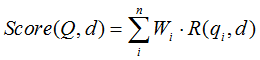

In [ ]:
#Wi用idf代替（0.5用来防止分母为0和均衡）

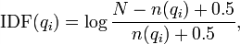

In [ ]:
#k1, k2, b为调节因子
#fi为qi在d中的出现频率，qfi为qi在Query中的出现频率
#dl为文档d的长度，avgdl为所有文档的平均长度

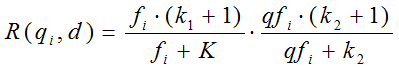

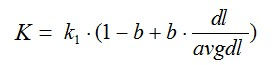

In [ ]:
#上式右半部分qfi(k2+1)/(qfi+k2)对每一个文档相同
#因此语素与当前文档的相关性可简化为：

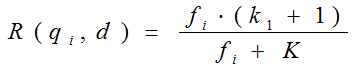

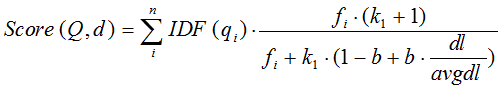

In [10]:
class MySearcherC11V2(MySearcherC11V1): 
    """
    改善文档频和文档长度加权的影响
    改善IDF权值
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.lower_preprocess()
        self.df = {} 
        self.avgdl = 0
        self.build_cache()
        jieba.load_userdict('dict.txt') 
    
    def build_cache(self): 
        doc_id = 0
        doc_length_sum = 0
        for doc in self.docs:
            doc_length_sum += len(doc[3])
            doc_word_set = set() 
            for word in jieba.cut_for_search(doc[3]): 
                if word not in doc_word_set:
                    result_item = doc_id 
                    if word not in self.cache:
                        self.cache[word] = set([result_item]) 
                    else:
                        self.cache[word].add(result_item)
                    self.vocab.add(word) 
                    doc_word_set.add(word)
                    self.df[word] = self.df.get(word, 0) + 1 
            doc_id += 1
        self.avgdl = doc_length_sum / len(self.docs)
        
    def score(self, item, query, k1=2, b=0.75): #BM25
        score = 0
        for keyword in jieba.cut(query):
            f = item[2].lower().count(keyword.lower()) #实际上正文中也有“原标题”的字眼
            dl = len(item[2]) #为了简便，这里取字数，而不是词数
            tf = f * (k1 + 1) / (f + k1 * (1 - b + b * (dl / self.avgdl))) #词出现次数/文档总词数
            idf = math.log10((len(self.docs) - self.df[keyword] + 0.5) / (self.df[keyword] + 0.5)) #文档个数/包含词的文档数
            score += tf * idf                                                              
        return score

In [11]:
searcher_v2 = MySearcherC11V2()

In [12]:
searcher_v2.render_search_result('中国华为手机')

In [ ]:
#布尔查询有三类用户：
#1、从来不用
#2、熟练使用
#3、病态表达式

In [ ]:
#将带标签和嵌套的布尔表达式解析成一棵树，从叶节点层层网上计算

#法1：从头实现树的解析→匹配括号的提取、布尔操作符的识别、布尔二元运算值的提取
#法2：找现成的树解析器→先将布尔表达式转为算术表达式，再用算术解析器解析

In [43]:
q = '(华为 or 苹果) and 手机'

In [25]:
({1, 2, 3} | {2, 3, 4}) & {2} #大括号表示集合

{2}

In [28]:
#代码中得到的很可能是字符串
"({1, 2, 3} | {2, 3, 4}) & {2}"

'({1, 2, 3} | {2, 3, 4}) & {2}'

In [26]:
eval("1 + 1") #eval将字符串看作表达式（即看作敲在程序中的一行代码）

2

In [27]:
eval("({1, 2, 3} | {2, 3, 4}) & {2}")

{2}

In [44]:
q_cut_parts = list(jieba.cut(q))

In [45]:
result_l = []
for part in q_cut_parts:
    if part == '(' or part == ')':
        result_l.append(part)
    elif part == 'and':
        result_l.append('&')
    elif part == 'or':
        result_l.append('|')
    elif part == 'not':
        result_l.append('-')
    else:
        result_l.append(part)
result = ''.join(result_l)
print(result)

(华为 | 苹果) & 手机


In [31]:
str('{1, 2, 4}')

'{1, 2, 4}'

In [46]:
result_l = []
for part in q_cut_parts:
    if part == '(' or part == ')':
        result_l.append(part)
    elif part == 'and':
        result_l.append('&')
    elif part == 'or':
        result_l.append('|')
    elif part == 'not':
        result_l.append('-')
    else:
        result_l.append(str(searcher_v2.cache[part]))
result = ''.join(result_l)
print(result)
#bug版本：有连起来的集合，中间却没有与或运算

({2, 3, 134, 7, 136, 137, 138, 146, 19, 150, 25, 26, 153, 155, 30, 159, 32, 36, 37, 38, 40, 169, 44, 176, 55, 57, 58, 66, 69, 70, 215, 92, 99, 109, 237, 238, 241, 114, 248, 251, 124, 125, 126}{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [34]:
q_cut_parts #空格也在posting中

['(', '华为', ' ', 'or', ' ', '苹果', ')', ' ', 'and', ' ', '手机']

In [35]:
result_l = []
for part in q_cut_parts:
    if part == '(' or part == ')':
        result_l.append(part)
    elif part == 'and':
        result_l.append('&')
    elif part == 'or':
        result_l.append('|')
    elif part == 'not':
        result_l.append('-')
    elif part == ' ':
        pass
    else:
        result_l.append(str(searcher_v2.cache[part]))
result = ''.join(result_l)
print(result)

({2, 3, 134, 7, 136, 137, 138, 146, 19, 150, 25, 26, 153, 155, 30, 159, 32, 36, 37, 38, 40, 169, 44, 176, 55, 57, 58, 66, 69, 70, 215, 92, 99, 109, 237, 238, 241, 114, 248, 251, 124, 125, 126}|{130, 255, 136, 9, 10, 137, 265, 141, 273, 147, 149, 22, 25, 282, 29, 30, 285, 32, 160, 288, 163, 38, 295, 168, 297, 44, 45, 46, 49, 50, 179, 52, 182, 55, 57, 59, 61, 63, 64, 66, 201, 76, 77, 78, 79, 81, 86, 87, 90, 219, 96, 248, 100, 229, 102, 105, 106, 107, 108, 109, 238, 111, 115, 120, 251, 127})&{2, 8, 19, 25, 30, 32, 38, 40, 42, 44, 45, 46, 49, 50, 55, 57, 58, 61, 63, 64, 65, 66, 70, 77, 78, 79, 86, 90, 92, 94, 96, 100, 102, 104, 105, 106, 107, 109, 111, 114, 118, 120, 122, 125, 126, 127, 130, 134, 136, 137, 138, 141, 147, 153, 155, 157, 160, 163, 166, 167, 179, 182, 201, 205, 206, 213, 219, 222, 229, 232, 238, 244, 245, 248, 249, 251, 253, 255, 256, 265, 267, 268, 280, 284, 288, 295}


In [39]:
q = '(华为 or 苹果) and 5g手机'

In [40]:
q_cut_parts = list(jieba.cut(q))

In [41]:
result_l = []
for part in q_cut_parts:
    if part == '(' or part == ')':
        result_l.append(part)
    elif part == 'and':
        result_l.append('&')
    elif part == 'or':
        result_l.append('|')
    elif part == 'not':
        result_l.append('-')
    elif part == ' ':
        pass
    else:
        result_l.append(str(searcher_v2.cache[part]))
result = ''.join(result_l)
print(result)
#bug版本：'5g'和'手机'没有连起来取交集

({2, 3, 134, 7, 136, 137, 138, 146, 19, 150, 25, 26, 153, 155, 30, 159, 32, 36, 37, 38, 40, 169, 44, 176, 55, 57, 58, 66, 69, 70, 215, 92, 99, 109, 237, 238, 241, 114, 248, 251, 124, 125, 126}|{130, 255, 136, 9, 10, 137, 265, 141, 273, 147, 149, 22, 25, 282, 29, 30, 285, 32, 160, 288, 163, 38, 295, 168, 297, 44, 45, 46, 49, 50, 179, 52, 182, 55, 57, 59, 61, 63, 64, 66, 201, 76, 77, 78, 79, 81, 86, 87, 90, 219, 96, 248, 100, 229, 102, 105, 106, 107, 108, 109, 238, 111, 115, 120, 251, 127})&{2, 3, 134, 137, 10, 13, 141, 146, 147, 25, 282, 155, 157, 30, 32, 288, 290, 163, 38, 168, 45, 49, 50, 54, 57, 58, 64, 69, 72, 200, 201, 77, 81, 210, 83, 86, 214, 90, 219, 100, 102, 233, 107, 109, 111, 113, 118, 119, 120, 251, 125, 126}{2, 8, 19, 25, 30, 32, 38, 40, 42, 44, 45, 46, 49, 50, 55, 57, 58, 61, 63, 64, 65, 66, 70, 77, 78, 79, 86, 90, 92, 94, 96, 100, 102, 104, 105, 106, 107, 109, 111, 114, 118, 120, 122, 125, 126, 127, 130, 134, 136, 137, 138, 141, 147, 153, 155, 157, 160, 163, 166, 167, 17

In [42]:
q_cut_parts

['(', '华为', ' ', 'or', ' ', '苹果', ')', ' ', 'and', ' ', '5g', '手机']

# 第12讲：复杂布尔查询的处理

In [3]:
import requests  
from lxml import etree 
import pickle
import os
from IPython.core.display import display, HTML
import timeit
import jieba
import math

class MySearcherC12V0(): 
    """
    第十一次课升级的搜索类版本：
    改善文档频和文档长度加权的影响
    改善IDF权值
    采用BM25打分函数
    """
    def __init__(self, scale = 1):
        self.docs = []
        self.load_data()
        if scale > 1:
            self.docs *= scale
        self.cache = {}
        self.vocab = set() 
        self.lower_preprocess()
        self.df = {} 
        self.avgdl = 0
        self.build_cache()
        jieba.load_userdict('dict.txt') 
    
    def build_cache(self): 
        doc_id = 0
        doc_length_sum = 0
        for doc in self.docs:
            doc_length_sum += len(doc[3])
            doc_word_set = set() 
            for word in jieba.cut_for_search(doc[3]): 
                if word not in doc_word_set:
                    result_item = doc_id 
                    if word not in self.cache:
                        self.cache[word] = set([result_item]) 
                    else:
                        self.cache[word].add(result_item)
                    self.vocab.add(word) 
                    doc_word_set.add(word)
                    self.df[word] = self.df.get(word, 0) + 1 
            doc_id += 1
        self.avgdl = doc_length_sum / len(self.docs)
    
    def lower_preprocess(self):
        for doc_id in range(len(self.docs)):
            self.docs[doc_id].append(
                (self.docs[doc_id][1] 
                 + ' ' 
                 + self.docs[doc_id][2]).lower()
            )
            
    def search(self, query): 
        result = None
        for keyword in jieba.cut(query.lower()): 
            if keyword in self.cache: 
                if result is None:
                    result = self.cache[keyword]
                else:
                    result = result & self.cache[keyword]
            else:
                result = set([]) 
                break
        if result is None:
            result = set([])
        
        sorted_result = self.rank(query, result)
        return sorted_result
    
    def load_data(self):
        data_filename = 'news_list.dat'
        if os.path.exists(data_filename): 
            with open(data_filename, 'rb') as f:
                self.docs += pickle.load(f) 
        else:
            url = 'http://news.163.com/special/0001386F/rank_tech.html'
            headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
            r = requests.get(url, headers = headers)
            sel = etree.HTML(r.text)  
            link_set = set() 
            count = 0

            for item in sel.xpath('//td/a'):  
                title = item.text
                link = item.attrib['href']

                if link not in link_set:
                    r = requests.get(link, headers = headers)
                    sel = etree.HTML(r.text)  
                    text_block = sel.xpath('//div[@id="endText"]')

                    if text_block: 
                        content = ''.join(text_block[0].xpath('./p/text()'))       
                        title = sel.xpath('//h1/text()')[0] 
                        self.docs.append([link, title, content])

                    link_set.add(link)

                count += 1
                if count % 15 == 0:
                    print(count, 'processed.')
                
                with open(data_filename, 'wb') as f:
                    pickle.dump(self.docs, f)
    
    def highlight(self, item, query, sidelen = 12):
        result = ''
        positions = [] 
        content_lower = item[2].lower()
        word_start_map = [] 
        word_end_map = [] 
        last_word_end = -1
        query_words = list(jieba.cut(query)) 
        for keyword in query_words:
            idx = content_lower.find(keyword.lower()) 
            positions.append(idx)

        for keyword in jieba.cut(content_lower):
            cur_word_start = last_word_end + 1
            cur_word_end = cur_word_start + len(keyword) - 1
            for i in range(cur_word_start, cur_word_end + 1):
                word_start_map.append(cur_word_start)
                word_end_map.append(cur_word_end)
            last_word_end = cur_word_end
        positions.sort()
        segments = [] 

        i = 0
        while i < len(positions): 
            start_pos = max(positions[i] - sidelen, 0)
            end_pos = min(positions[i] + sidelen, len(content_lower) - 1) 
            while i < len(positions) - 1 and positions[i + 1] - positions[i] <= 2 * sidelen:
                end_pos = min(positions[i + 1] + sidelen, len(content_lower) - 1)
                i += 1
            start_ddd = '...' if start_pos > 0 else ''
            end_ddd = '...' if end_pos < len(content_lower) - 1 else ''
            segments.append(start_ddd 
                            + item[2][word_start_map[start_pos]:word_end_map[end_pos] + 1] 
                            + end_ddd) 
            i += 1

        result = text = item[1] + '<br/>' + ''.join(segments) 
        text_lower = text.lower()
        for keyword in query_words:
            idx = text_lower.find(keyword.lower())
            if idx >= 0:
                ori_word = text[idx: idx + len(keyword)]
                result = result.replace(ori_word, '<span style = "color: red";>{}</span>'.format(ori_word)) 
        return result
    
    def score(self, item, query, k1=2, b=0.75): 
        score = 0
        for keyword in jieba.cut(query):
            f = item[2].lower().count(keyword.lower())
            dl = len(item[2]) 
            tf = f * (k1 + 1) / (f + k1 * (1 - b + b * (dl / self.avgdl))) 
            idf = math.log10((len(self.docs) - self.df[keyword] + 0.5) / (self.df[keyword] + 0.5)) 
            score += tf * idf                                                              
        return score
    
    def rank(self, query, result_set): 
        result = []
        for doc_id in result_set:
            result.append([doc_id, self.score(self.docs[doc_id], query)])
        result.sort(key = lambda x: x[1], reverse = True)
        return result
    
    def render_search_result(self, query): 
        count = 0
        for item in self.search(query):
            count += 1
            display(HTML('{} [{}] {}'.format(count, item[1], 
                                            self.highlight(self.docs[item[0]], query))))

In [4]:
searcher_v0 = MySearcherC12V0()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\80925\AppData\Local\Temp\jieba.cache
Loading model cost 1.499 seconds.
Prefix dict has been built successfully.


In [3]:
searcher_v0.render_search_result('华为5g手机')

In [5]:
q = '(华为 or 苹果) and 5g手机'

q_cut_parts = list(jieba.cut(q))

result_l = []
for part in q_cut_parts:
    if part == '(' or part == ')':
        result_l.append(part)
    elif part == 'and':
        result_l.append('&')
    elif part == 'or':
        result_l.append('|')
    elif part == 'not':
        result_l.append('-')
    elif part == ' ':
        pass
    else:
        result_l.append(str(searcher_v0.cache[part]))
result = ''.join(result_l)
print(result)

({2, 3, 134, 7, 136, 137, 138, 146, 19, 150, 25, 26, 153, 155, 30, 159, 32, 36, 37, 38, 40, 169, 44, 176, 55, 57, 58, 66, 69, 70, 215, 92, 99, 109, 237, 238, 241, 114, 248, 251, 124, 125, 126}|{130, 255, 136, 9, 10, 137, 265, 141, 273, 147, 149, 22, 25, 282, 29, 30, 285, 32, 160, 288, 163, 38, 295, 168, 297, 44, 45, 46, 49, 50, 179, 52, 182, 55, 57, 59, 61, 63, 64, 66, 201, 76, 77, 78, 79, 81, 86, 87, 90, 219, 96, 248, 100, 229, 102, 105, 106, 107, 108, 109, 238, 111, 115, 120, 251, 127})&{2, 3, 134, 137, 10, 13, 141, 146, 147, 25, 282, 155, 157, 30, 32, 288, 290, 163, 38, 168, 45, 49, 50, 54, 57, 58, 64, 69, 72, 200, 201, 77, 81, 210, 83, 86, 214, 90, 219, 100, 102, 233, 107, 109, 111, 113, 118, 119, 120, 251, 125, 126}{2, 8, 19, 25, 30, 32, 38, 40, 42, 44, 45, 46, 49, 50, 55, 57, 58, 61, 63, 64, 65, 66, 70, 77, 78, 79, 86, 90, 92, 94, 96, 100, 102, 104, 105, 106, 107, 109, 111, 114, 118, 120, 122, 125, 126, 127, 130, 134, 136, 137, 138, 141, 147, 153, 155, 157, 160, 163, 166, 167, 17

In [ ]:
#解决“5g手机”被分词的问题
#如果直接在“5g”和“手机”之间添加“&”，则会影响优先级，变成((华为 or 苹果) and 5g) and 手机
#法1：沿用上节课的方法，分词后将5g和手机再连起来，在外面再加个括号
#法2：不分词，将布尔查询当作字符串从头处理，每一部分压入列表——本节课所用
#法3：递归调用（递归指函数重复调用自己本身，即将问题分解，分解后的小部分再用函数本身去处理，直至分解成一个能处理的问题）
#查询中的递归：将括号内的交给递归来处理，返回一个候选文档集

#用空格作split：可能操作符两端没空格，或者只有一端有空格
#若给操作符两端加空格：(-C)   (和-之间会有两个空格
#用户查询引号内的作整体处理：先将引号内内容分词，查询取交集找候选文档集，在候选文档集中找包含引号内整体内容的文档

In [ ]:
#调试工具：pysnooper
#在百度中搜索“pip 国内源”搜索清华源网址

In [4]:
!pip install pysnooper -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [ ]:
import pysnooper

In [11]:
@pysnooper.snoop()

def conv_query(query):
    """
    将布尔查询转化成集合运算表达式
    """
    qlen = len(query)
    idx = 0
    result_parts = []
    cache = ''
    while idx < qlen:
        if query[idx] in ('(', ')', ' '):
            if cache != '':
                result_parts.append(cache)
                cache = ''
            result_parts.append(query[idx])
        else:
            cache += query[idx] 
        idx += 1
    return ''.join(result_parts)

print(conv_query(q))
#bug版本：5g手机没有出现在结果中
#原因：“5g手机”后没有空格和括号，这时idx=qlen-1，再加1后idx越界跳出循环，没有机会将“5g手机”加入列表中

(华为 or 苹果) and 


Source path:... <ipython-input-11-9cf5583a22b8>
Starting var:.. query = '(华为 or 苹果) and 5g手机'
16:47:38.984740 call         3 def conv_query(query):
16:47:38.985736 line         7     qlen = len(query)
New var:....... qlen = 19
16:47:38.985736 line         8     idx = 0
New var:....... idx = 0
16:47:38.985736 line         9     result_parts = []
New var:....... result_parts = []
16:47:38.986734 line        10     cache = ''
New var:....... cache = ''
16:47:38.986734 line        11     while idx < qlen:
16:47:38.986734 line        12         if query[idx] in ('(', ')', ' '):
16:47:38.986734 line        13             if cache != '':
16:47:38.986734 line        16             result_parts.append(query[idx])
Modified var:.. result_parts = ['(']
16:47:38.987731 line        19         idx += 1
Modified var:.. idx = 1
16:47:38.987731 line        11     while idx < qlen:
16:47:38.987731 line        12         if query[idx] in ('(', ')', ' '):
16:47:38.987731 line        18             cache +=

In [10]:
#法1：在循环外将cache添加到列表中
def conv_query(query):
    """
    将布尔查询转化成集合运算表达式
    """
    qlen = len(query)
    idx = 0
    result_parts = []
    cache = ''
    while idx < qlen:
        if query[idx] in ('(', ')', ' '):
            if cache != '':
                result_parts.append(cache)
                cache = ''
            result_parts.append(query[idx])
        else:
            cache += query[idx] 
        idx += 1
    if cache != '':
        result_parts.append(cache)
    return ''.join(result_parts)

print(conv_query(q))

(华为 or 苹果) and 5g手机


In [26]:
#q = '(华为 or 苹果) and 5g手机'

q = '(华为 or 苹果) and (5g手机 or 笔记本)'

def conv_query(query):
    """
    将布尔查询转化成集合运算表达式
    """
    qlen = len(query)
    idx = 0
    result_parts = []
    cache = ''
    while idx < qlen:
        if query[idx] in ('(', ')', ' ') or idx + 1 == qlen:
            if cache != '':
                result_parts.append(cache)
                cache = ''
            result_parts.append(query[idx])
        else:
            cache += query[idx] 
        idx += 1
    return ''.join(result_parts)

print(conv_query(q))

(华为 or 苹果) and (5g手机 or 笔记本)


In [15]:
#法2：在循环中判断是否指向最后一个下标索引
def conv_query(query):
    """
    将布尔查询转化成集合运算表达式
    """
    qlen = len(query)
    idx = 0
    result_parts = []
    cache = ''
    while idx < qlen:
        if query[idx] in ('(', ')', ' ') or idx + 1 == qlen: #bug版本：逻辑混乱→放弃这一版
            if cache != '' and query[idx] not in ('(', ')', ' '):
                result_parts.append(cache)
                cache = ''
            if idx + 1 < qlen or (idx + 1 == qlen and query[idx] == ')'):
                result_parts.append(query[idx])
        else:
            cache += query[idx] 
        idx += 1
    return ''.join(result_parts)

print(conv_query(q))

(  )  华为or苹果and5g手


In [16]:
#法3：在查询的最后增加一个空格
def conv_query(query):
    """
    将布尔查询转化成集合运算表达式
    """
    query += " "
    qlen = len(query)
    idx = 0
    result_parts = []
    cache = ''
    while idx < qlen:
        if query[idx] in ('(', ')', ' '):
            if cache != '':
                result_parts.append(cache)
                cache = ''
            result_parts.append(query[idx])
        else:
            cache += query[idx] 
        idx += 1
    return ''.join(result_parts)

print(conv_query(q))
#结果最后也多一个空格，但这不影响

(华为 or 苹果) and 5g手机 


In [17]:
#对"and"和"or"作标准化，即还原
def conv_query(query):
    """
    将布尔查询转化成集合运算表达式
    """
    query += " "
    qlen = len(query)
    idx = 0
    result_parts = []
    cache = ''
    while idx < qlen:
        if query[idx] in ('(', ')', ' '):
            if cache != '':
                if cache == 'and' or cache == 'AND': #不取lower()是为了减少开销
                    result_parts.append('&')
                elif cache == 'or' or cache == 'OR':
                    result_parts.append('|')
                elif cache == 'not' or cache == 'NOT':
                    result_parts.append('-') #如果not出现在句首，-{}，没有被减的集合
                else:
                    result_parts.append(cache)
                cache = ''
            result_parts.append(query[idx])
        else:
            cache += query[idx] 
        idx += 1
    return ''.join(result_parts)

print(conv_query(q))

(华为 | 苹果) & 5g手机 


In [ ]:
#引号在搜索里的用处：

#一个词加引号：①就是想搜这个词本身，而不是作为一个操作符（例如：想查“and”而不是使用与操作符时，可对and加引号）
#②引号内的词必须出现在搜索结果中

#一句话加引号：完整的句子出现在结果中

In [12]:
#转为集合运算式
def conv_query(query):
    """
    将布尔查询转化成集合运算表达式
    """
    query += " "
    qlen = len(query)
    idx = 0
    result_parts = []
    cache = ''
    while idx < qlen:
        if query[idx] in ('(', ')', ' '):
            if cache != '':
                if cache == 'and' or cache == 'AND': 
                    result_parts.append('&')
                elif cache == 'or' or cache == 'OR':
                    result_parts.append('|')
                elif cache == 'not' or cache == 'NOT':
                    result_parts.append('-') 
                else:
                    result_parts.append('get_phrase_match("{}")'.format(cache))
                cache = ''
            result_parts.append(query[idx])
        else:
            cache += query[idx] 
        idx += 1
    return ''.join(result_parts)

print(conv_query(q))

(get_phrase_match("华为") | get_phrase_match("苹果")) & get_phrase_match("5g手机") 


In [10]:
def get_phrase_match(phrase):
    wid = 0
    for word in jieba.cut(phrase):
        """
        if word not in searcher_v0.cache: #这段和后面的.get(word, {})是等效的
            result = {}
            pass
        """
        if wid == 0: #这里改成if len(result) == 0:  是不对的！因为result有可能在后面取交集的时候变成空
            #result =  searcher_v0.cache[word]
            result =  searcher_v0.cache.get(word, {}) #解决词不存在时异常退出的问题 .get(word, {})表示如果cache[word]存在则返回这个存在的值
                                                                                                    #如果cache[word]不存在则返回空集
        else:
            if len(result) == 0:
                break
            #result =  result & searcher_v0.cache[word]
            result = result & searcher_v0.cache.get(word, {})
        wid += 1
    return result

print(get_phrase_match('5g手机'))

{2, 134, 137, 141, 147, 25, 155, 157, 30, 32, 288, 163, 38, 45, 49, 50, 57, 58, 64, 201, 77, 86, 90, 219, 100, 102, 107, 109, 111, 118, 120, 251, 125, 126}


In [11]:
#转为集合运算式
def conv_query(query):
    """
    将布尔查询转化成集合运算表达式
    """
    query += " "
    qlen = len(query)
    idx = 0
    result_parts = []
    cache = ''
    while idx < qlen:
        if query[idx] in ('(', ')', ' '):
            if cache != '':
                if cache == 'and' or cache == 'AND': 
                    result_parts.append('&')
                elif cache == 'or' or cache == 'OR':
                    result_parts.append('|')
                elif cache == 'not' or cache == 'NOT':
                    result_parts.append('-') 
                else:
                    #result_parts.append('get_phrase_match("{}")'.format(cache))
                    result_parts.append(get_phrase_match(cache))
                cache = ''
            result_parts.append(query[idx])
        else:
            cache += query[idx] 
        idx += 1
    return ''.join('%s' %id for id in result_parts) #列表中包含数字，则不能直接转化成字符串

print(conv_query(q))

({2, 3, 134, 7, 136, 137, 138, 146, 19, 150, 25, 26, 153, 155, 30, 159, 32, 36, 37, 38, 40, 169, 44, 176, 55, 57, 58, 66, 69, 70, 215, 92, 99, 109, 237, 238, 241, 114, 248, 251, 124, 125, 126} | {130, 255, 136, 9, 10, 137, 265, 141, 273, 147, 149, 22, 25, 282, 29, 30, 285, 32, 160, 288, 163, 38, 295, 168, 297, 44, 45, 46, 49, 50, 179, 52, 182, 55, 57, 59, 61, 63, 64, 66, 201, 76, 77, 78, 79, 81, 86, 87, 90, 219, 96, 248, 100, 229, 102, 105, 106, 107, 108, 109, 238, 111, 115, 120, 251, 127}) & {2, 134, 137, 141, 147, 25, 155, 157, 30, 32, 288, 163, 38, 45, 49, 50, 57, 58, 64, 201, 77, 86, 90, 219, 100, 102, 107, 109, 111, 118, 120, 251, 125, 126} 


# 第13讲：拼写校正建议的实现

In [ ]:
#拼写校正：
#键盘问题，连击 loove
#拼写错误 retrival

#有很多相同的子片段
#拆成3gram：lov ove
#           loo oov ove  则有一个共同的子片段
#拆成2gram：lo ov ve
#           lo oo ov ve  则有三个共同的子片段
#因此要尽量拆得更小一些

#用错误查询查找正确查询→非常类似于通过倒排查询找文档

#轮换索引：对2gram进行文档搜索，再取并集（？）

#问题：4个2gram可能不连着；不太可能包括拼写错误词的所有2gram；也可能这些2gram出现在一个很长的词中，因此应约束词长度差不多

In [ ]:
#通用搜索 vs 垂直搜索
#通用搜索的排序算法更好 例如：English word list site:github.com

In [46]:
from collections import defaultdict

class WordCorrector():
    def __init__(self):
        self.docs = []
        self.cache = defaultdict(list) #默认字典：每个key对应的value会被默认设为空
        self.build_cache()
    
    def build_cache(self):
        """
        构建索引
        """
        doc_id = 0
        with open('words.txt', 'r') as f:
            for word in f.readlines():
                self.docs.append(word)
                word = word.lower()
                for i in range(len(word) - 1):
                    term = word[i:i+2] #word指单词，term指词条（可以是短语、短句，即用于构建索引的key），token指切分索引的段
                    self.cache[term].append(doc_id)
                doc_id += 1
    
    def correct(self, word):
        """
        在倒排索引里检索单词原型
        """
        word = word.lower()
        result_list = []
        for i in range(len(word) - 1):
            term = word[i:i+2]
            result_list += self.cache.get(term, [])
        return result_list

In [47]:
word_corrector = WordCorrector()

In [48]:
len(word_corrector.docs)

466550

In [49]:
len(word_corrector.cache)

989

In [50]:
word_corrector.correct('loove')

[209,
 210,
 387,
 506,
 654,
 673,
 674,
 675,
 815,
 816,
 817,
 1174,
 1215,
 1458,
 1498,
 1499,
 1619,
 1633,
 1634,
 1700,
 1701,
 1702,
 1705,
 1706,
 1736,
 1737,
 1964,
 2291,
 2292,
 2304,
 2305,
 2380,
 2446,
 2480,
 2505,
 2569,
 2622,
 2626,
 2679,
 2680,
 2681,
 2682,
 2706,
 2707,
 2708,
 2708,
 2709,
 2717,
 2718,
 2739,
 2786,
 2808,
 2809,
 2868,
 2874,
 2891,
 2892,
 2893,
 2924,
 2925,
 2926,
 2927,
 2928,
 2967,
 2968,
 3021,
 3022,
 3059,
 3060,
 3061,
 3062,
 3063,
 3064,
 3083,
 3084,
 3085,
 3093,
 3094,
 3312,
 3368,
 3412,
 3413,
 3414,
 3415,
 3416,
 3417,
 3480,
 3611,
 3612,
 3645,
 3646,
 3647,
 3835,
 3899,
 3921,
 3985,
 4179,
 4267,
 4268,
 4269,
 4270,
 4271,
 4272,
 4273,
 4362,
 4363,
 4364,
 4384,
 4592,
 5123,
 5563,
 5595,
 5613,
 5630,
 5631,
 5669,
 5670,
 5671,
 5672,
 5672,
 5673,
 5673,
 5674,
 5675,
 5676,
 5752,
 5753,
 5754,
 5755,
 5772,
 5773,
 5774,
 5775,
 5776,
 5822,
 5835,
 5836,
 5861,
 5865,
 5866,
 5867,
 5868,
 5869,
 5870,
 59

In [41]:
from collections import Counter

In [44]:
Counter([1, 2, 3, 3])

Counter({1: 1, 2: 1, 3: 2})

In [45]:
Counter([1, 2, 3, 3]).most_common()

[(3, 2), (1, 1), (2, 1)]

In [51]:
Counter(word_corrector.correct('loove')).most_common() #most_common()用于高频计数，将出现次数最多的往前排

[(222554, 5),
 (277963, 5),
 (277964, 5),
 (277965, 5),
 (277966, 5),
 (45086, 4),
 (47386, 4),
 (75569, 4),
 (75572, 4),
 (75573, 4),
 (75574, 4),
 (75583, 4),
 (75585, 4),
 (75587, 4),
 (130650, 4),
 (143495, 4),
 (184657, 4),
 (208079, 4),
 (221822, 4),
 (221873, 4),
 (221938, 4),
 (221954, 4),
 (222549, 4),
 (222552, 4),
 (222586, 4),
 (222587, 4),
 (222588, 4),
 (222589, 4),
 (222590, 4),
 (222603, 4),
 (222608, 4),
 (222628, 4),
 (245114, 4),
 (276070, 4),
 (276695, 4),
 (276696, 4),
 (276697, 4),
 (276698, 4),
 (276699, 4),
 (276700, 4),
 (277187, 4),
 (277344, 4),
 (277345, 4),
 (277346, 4),
 (277347, 4),
 (277946, 4),
 (277947, 4),
 (277948, 4),
 (277949, 4),
 (277950, 4),
 (277951, 4),
 (277952, 4),
 (277953, 4),
 (277967, 4),
 (301380, 4),
 (371196, 4),
 (428173, 4),
 (436146, 4),
 (276507, 4),
 (276508, 4),
 (276509, 4),
 (276510, 4),
 (276855, 4),
 (277366, 4),
 (277367, 4),
 (277541, 4),
 (278207, 4),
 (278558, 4),
 (278559, 4),
 (278560, 4),
 (279316, 4),
 (279810, 4),
 

In [5]:
word = 'loove'
for i in range(len(word) - 1):
    print(word[i:i+2])

lo
oo
ov
ve


In [31]:
[1, 2, 3] + [3, 4, 5] #列表相加：将两个列表中的元素合并在一个列表中

[1, 2, 3, 3, 4, 5]

In [73]:
from collections import defaultdict, Counter

class WordCorrector():
    def __init__(self):
        self.docs = []
        self.cache = defaultdict(list)
        self.build_cache()
    
    def build_cache(self):
        """
        构建索引
        """
        doc_id = 0
        with open('words.txt', 'r') as f:
            for word in f.readlines(): #bug：readlines读取的每行字符串包括最后的换行符
                self.docs.append(word)
                word = word.lower()
                for i in range(len(word) - 1):
                    term = word[i:i+2]
                    self.cache[term].append(doc_id)
                doc_id += 1
    
    def correct(self, word, limit=5): #limit控制最多输出的次数
        """
        在倒排索引里检索单词原型
        """
        word = word.lower()
        result_list = []
        for i in range(len(word) - 1):
            term = word[i:i+2]
            result_list += self.cache.get(term, [])
        counter = 0
        for item in Counter(result_list).most_common(): #Counter对可哈希对象提供计数
            sim_word = self.docs[item[0]]            
            if len(sim_word) >= len(word) - 1 and len(sim_word) <= len(word) + 1: #长度约束
                print(len(sim_word), len(word))
                print(sim_word)
                counter += 1
                if counter > limit:
                    break

In [74]:
word_corrector = WordCorrector()

In [75]:
word_corrector.correct('loove')

6 5
clove

6 5
glove

5 5
Love

6 5
loved

6 5
lovee

6 5
lovey



In [65]:
with open('words.txt', 'r') as f:
    count = 0
    for word in f.readlines():
        count += 1
        if count < 3:
            for i in range(len(word)):
                print('no.', i, 'word[i]', word[i])

no. 0 word[i] 2
no. 1 word[i] 

no. 0 word[i] 1
no. 1 word[i] 0
no. 2 word[i] 8
no. 3 word[i] 0
no. 4 word[i] 



In [76]:
from collections import defaultdict, Counter

class WordCorrector():
    def __init__(self):
        self.docs = []
        self.cache = defaultdict(list)
        self.build_cache()
    
    def build_cache(self):
        """
        构建索引
        """
        doc_id = 0
        with open('words.txt', 'r') as f:
            for line in f.readlines(): 
                word = line.strip() #删除字符串首尾的空白符
                self.docs.append(word)
                word = word.lower()
                for i in range(len(word) - 1):
                    term = word[i:i+2]
                    self.cache[term].append(doc_id)
                doc_id += 1
    
    def correct(self, word, limit=5): #limit控制最多输出的次数
        """
        在倒排索引里检索单词原型
        """
        word = word.lower()
        result_list = []
        for i in range(len(word) - 1):
            term = word[i:i+2]
            result_list += self.cache.get(term, [])
        counter = 0
        for item in Counter(result_list).most_common():
            sim_word = self.docs[item[0]]            
            if len(sim_word) >= len(word) - 1 and len(sim_word) <= len(word) + 1:
                print(len(sim_word), len(word))
                print(sim_word)
                counter += 1
                if counter > limit:
                    break

In [77]:
word_corrector = WordCorrector()

In [78]:
word_corrector.correct('loove')

6 5
loover
6 5
belove
5 5
clove
6 5
cloven
6 5
Clover
6 5
cloves


# 第14讲：搜索排序之向量空间模型

In [1]:
#搜索排序算法的其他思路：

#启发式：不是通过数学推导得出的公式    查询和文档间的匹配度→意义相近程度→语义匹配→很难定义、用公式表达
#类比式

#语义相似性评价：把两个查询或文档放在高维空间（压缩到高维度上）上，度量两点间的距离——直觉映射（视觉）
#各个维度的含义：把文档拆成词，以词为维度
#每个文档在空间中都占一个点，点与点间的距离与语义相关性有关联，再在空间上作聚类或对相邻点作匹配
#词太多→维度太多（维数灾难）
#担心各个维度的相关性，在高维空间中如果词与词之间不正交，即存在相关性（同义词、近义词、上下文相关词），该怎么做？

#向量空间模型：
#1、向量表示
#维度词的选择：第一轮扫描→词表→维度→给各个维度排序，哪个重要哪个不重要，去掉不重要的维度
#坐标值：第二轮扫描→针对每篇文档，统计该篇文档中每个词的tf-idf→每个词在文档中的重要性（如tf-idf）作为坐标值

#2、相似性度量：
#法1：两点间连线长度（欧氏距离）
#法2：两向量间夹角大小（余弦相似度：余弦越大，相似度越高）
#未做归一化时，当某一维度变化很大时，欧氏距离变化大，而夹角变化小→角度比欧氏距离在单维度上更稳定
#计算每一个候选文档矢量与查询矢量间的相似度，排序
#精度：维度相关性；若都不把停用词放到维度上，则会影响精度
#速度：两个几千维的向量间作距离，运算开销很大

#问题：
#①维度相关性：
#法1：找到同义词，将相同的维度合并成同一维→但没办法合并相关词
#法2：每个维度表示一些词的线性组合（浅变量），希望找到一个向量空间，其各个维度正交且空间中向量分布分散
#法3：基于学习，词向量→得到一个坐标体系
#因为每个维度正交且不再是词，因此每个词在这个体系中有对应方向，文档自然也有对应表示（可以是文档中每个词对应向量的和，也可以学习出一个文档向量）
#语义关系→空间上的位置关系，希望语义相近的词在该坐标体系下距离更近
#嵌入：把向量放到对应的空间中，作了向量化也就相当于在向量对应空间作了嵌入
#例如腾讯词向量：每个词表示为200维向量，每一维的含义很模糊，相似性可以从上下文相似性中得来

#②计算复杂度：
#查找最近邻的方法：
#法1：遍历所有点，计算距离并排序
#法2：用空间换时间→approximate nearest neighbors 近似最近邻
#画格子预处理，格子中的所有点现在看作一组，评估格子与格子间的相关性而不是点与点间的距离
#均匀画格子——空间占用大；非均匀画格子——根据密度（希望每个格子里的点差不多多，相邻格子间有相关性→点越密的地方格子越小→格子的数量也下降了）

#先前是在候选文档集中进行精排
#现在如果ANN足够高效，可以将所有的文档放到ANN中预训练，输入查询后将查询映射到空间中可以直接得到与它相关的所有文档和最近文档

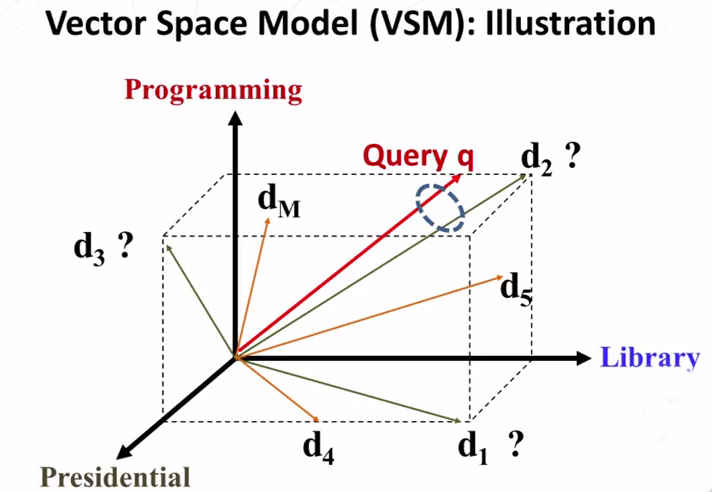

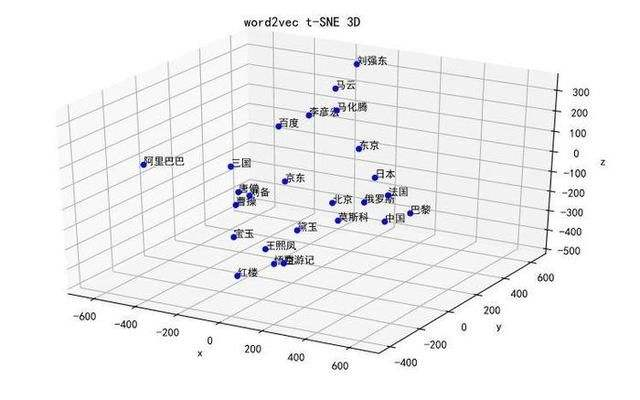

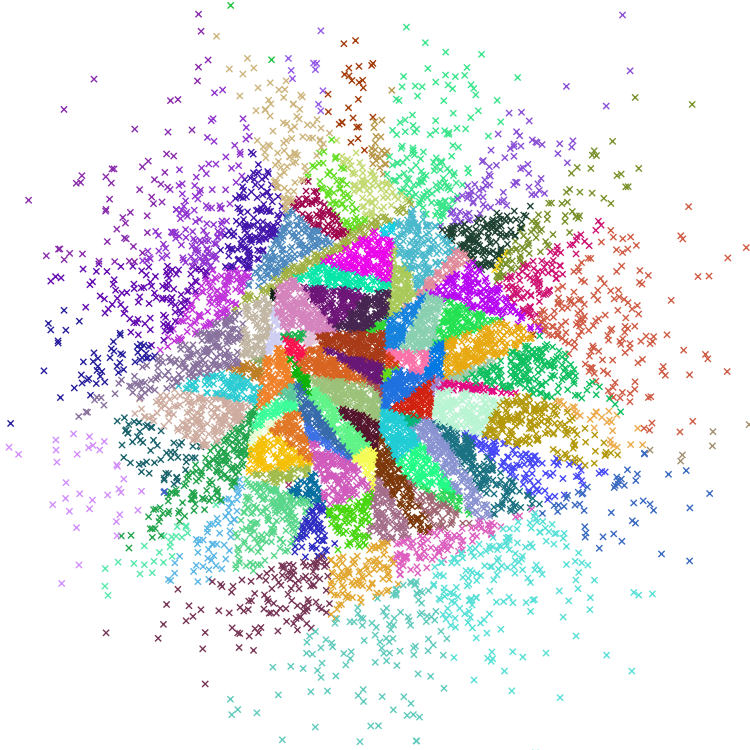